In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl

from scipy.spatial.distance import cdist, pdist, squareform
from scipy.stats import pearsonr
from scipy.stats import mode
from scipy.stats import normaltest
from scipy.stats import skew, kurtosis

import matplotlib.pyplot as plt
import seaborn as sns

## For the 'abortion' data set

In [29]:
# load the indexes corresponding to the non-zero entries
with open("../pickle/abortion_daily_nonzero_indexes.pkl", "rb") as f:
    nonzero_idx = pkl.load(f)

In [30]:
# get dates mapping
pickle_folder_path = "../pickle/abortion_daily_largest_aligned_norm2/"

pickle_files_aligned = [f for f in os.listdir(pickle_folder_path) if os.path.isfile(os.path.join(pickle_folder_path, f))]

pickle_idx = []
for pickle_ in pickle_files_aligned:
    pickle_idx.append((pickle_.split(".")[0].split("_")[1]))

ordered_pickle_files_ = []
for i, j in sorted(zip(pickle_idx, pickle_files_aligned)):
    ordered_pickle_files_.append(j)
    
# get the polarity scores
polarities = pd.read_csv("../keras/abortion_daily/ordered_predictions.csv")

cls0 = polarities[polarities["Class"] == 0]
cls1 = polarities[polarities["Class"] == 1]

pickle_idx.sort()

In [238]:
# get circles around the point of interest
perc_neighbours = [0.01, 0.02, 0.03, 0.05, 0.1, 0.15, 0.20]

corr_agg   = []
perc_d_agg = []
perc_r_agg = []
for _n in perc_neighbours:
    print("At {} neighbours".format(_n))
    
    corr   = []
    perc_d = []
    perc_r = []
    for j in range(980, len(ordered_pickle_files_)):

        print("Running for embedding {}/{}".format(j, len(ordered_pickle_files_)))

        # read the embeddings
        with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j]), "rb") as pickle_file:
            _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)    

        # compute the distance matrix
        distance = squareform(pdist(xy_pairs[nonzero_idx[j]]))
        distance = distance + distance.max() * 100 * np.identity(len(distance))

        # determine the mode polarity of the closest k nodes
        polarity_daily = []
        polarity_d     = []
        polarity_r     = []
        
        # get k
        k = int(np.round(_n * len(nonzero_idx[j])))
        if k == 0:
            k = 1
        for i in range(0, len(distance)):
            p = mode(polarities.loc[nonzero_idx[j][distance[i].argsort()[0:k]], 'Class'])[0][0]
            polarity_daily.append(p)

            if polarities.loc[nonzero_idx[j][i], 'Class'] == 0.0:
                polarity_d.append(p)

            else:
                polarity_r.append(p)

        # compute the correlation for the active users; 
        _corr, _ = pearsonr(polarities.loc[nonzero_idx[j], 'Class'], polarity_daily)
        corr.append(_corr)

        # get the percentage of nodes that are mostly surrounded by same-minded nodes
        perc_d.append(1 - np.sum(polarity_d) / len(polarity_d))
        perc_r.append(np.sum(polarity_r) / len(polarity_r))
        
    corr_agg.append(corr)
    perc_d_agg.append(perc_d)
    perc_r_agg.append(perc_r)

At 0.01 neighbours
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Running for embedding 994/2785
Running for embedding 995/2785
Running for embedding 996/2785
Running for embedding 997/2785
Running for embedding 998/2785
Running for embedding 999/2785
Running for embedding 1000/2785
Running for embedding 1001/2785
Running for embedding 1002/2785
Running for embedding 1003/2785
Running for embedding 1004/2785
Running for embedding 1005/2785
Running for embedding 1006/2785
Running for embedding 1007/2785
Running for embedding 1008/2785
Running for embedding 1009/2785
Running for embedding 1010/2785
Running f

Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running for embedding 1251/2785
Running for embedding 1252/2785
Running for embedding 1253/2785
Running for embedding 1254/2785
Running for embedding 1255/2785
Running for embedding 1256/2785
Running for embedding 1257/2785
Running for embedding 1258/2785
Running for embedding 1259/2785
Running for embedding 1260/2785
Running for embedding 1261/2785
Running for embedding 1262/2785
Running for embedding 1263/2785
Running for embedding 1264/2785
Running for embedding 1265/2785
Running for embedding 1266/2785
Running for embedding 1267/2785
Running for embedding 1268/2785
Running for embedding 1269/2785
Running 

Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running for embedding 1509/2785
Running for embedding 1510/2785
Running for embedding 1511/2785
Running for embedding 1512/2785
Running for embedding 1513/2785
Running for embedding 1514/2785
Running for embedding 1515/2785
Running for embedding 1516/2785
Running for embedding 1517/2785
Running for embedding 1518/2785
Running for embedding 1519/2785
Running for embedding 1520/2785
Running for embedding 1521/2785
Running for embedding 1522/2785
Running for embedding 1523/2785
Running for embedding 1524/2785
Running for embedding 1525/2785
Running for embedding 1526/2785
Running 

Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running for embedding 1766/2785
Running for embedding 1767/2785
Running for embedding 1768/2785
Running for embedding 1769/2785
Running for embedding 1770/2785
Running for embedding 1771/2785
Running for embedding 1772/2785
Running for embedding 1773/2785
Running for embedding 1774/2785
Running for embedding 1775/2785
Running for embedding 1776/2785
Running for embedding 1777/2785
Running for embedding 1778/2785
Running for embedding 1779/2785
Running for embedding 1780/2785
Running for embedding 1781/2785
Running for embedding 1782/2785
Running for embedding 1783/2785
Running 

Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running for embedding 2023/2785
Running for embedding 2024/2785
Running for embedding 2025/2785
Running for embedding 2026/2785
Running for embedding 2027/2785
Running for embedding 2028/2785
Running for embedding 2029/2785
Running for embedding 2030/2785
Running for embedding 2031/2785
Running for embedding 2032/2785
Running for embedding 2033/2785
Running for embedding 2034/2785
Running for embedding 2035/2785
Running for embedding 2036/2785
Running for embedding 2037/2785
Running for embedding 2038/2785
Running for embedding 2039/2785
Running for embedding 2040/2785
Running 

Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running for embedding 2280/2785
Running for embedding 2281/2785
Running for embedding 2282/2785
Running for embedding 2283/2785
Running for embedding 2284/2785
Running for embedding 2285/2785
Running for embedding 2286/2785
Running for embedding 2287/2785
Running for embedding 2288/2785
Running for embedding 2289/2785
Running for embedding 2290/2785
Running for embedding 2291/2785
Running for embedding 2292/2785
Running for embedding 2293/2785
Running for embedding 2294/2785
Running for embedding 2295/2785
Running for embedding 2296/2785
Running for embedding 2297/2785
Running 

Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running for embedding 2537/2785
Running for embedding 2538/2785
Running for embedding 2539/2785
Running for embedding 2540/2785
Running for embedding 2541/2785
Running for embedding 2542/2785
Running for embedding 2543/2785
Running for embedding 2544/2785
Running for embedding 2545/2785
Running for embedding 2546/2785
Running for embedding 2547/2785
Running for embedding 2548/2785
Running for embedding 2549/2785
Running for embedding 2550/2785
Running for embedding 2551/2785
Running for embedding 2552/2785
Running for embedding 2553/2785
Running for embedding 2554/2785
Running 

Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At 0.02 neighbours
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Running for embedding 994/2785
Running for embedding 995/2785
Running for embedding 996/2785
Running for embedding 997/2785
Running for embedding 998/2785
Running for embedding 999/2785
Running for embedding 1000/2785
Running for embedding 1001/2785
Running for embedding 1002/2785
Running for embedding 1003/2785
Running for embedding 1004/2785
Running for embedding 1005/2785
Running for embedding 1006/2785
Running f

Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running for embedding 1251/2785
Running for embedding 1252/2785
Running for embedding 1253/2785
Running for embedding 1254/2785
Running for embedding 1255/2785
Running for embedding 1256/2785
Running for embedding 1257/2785
Running for embedding 1258/2785
Running for embedding 1259/2785
Running for embedding 1260/2785
Running for embedding 1261/2785
Running for embedding 1262/2785
Running for embedding 1263/2785
Running for embedding 1264/2785
Running 

Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running for embedding 1509/2785
Running for embedding 1510/2785
Running for embedding 1511/2785
Running for embedding 1512/2785
Running for embedding 1513/2785
Running for embedding 1514/2785
Running for embedding 1515/2785
Running for embedding 1516/2785
Running for embedding 1517/2785
Running for embedding 1518/2785
Running for embedding 1519/2785
Running for embedding 1520/2785
Running for embedding 1521/2785
Running 

Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running for embedding 1766/2785
Running for embedding 1767/2785
Running for embedding 1768/2785
Running for embedding 1769/2785
Running for embedding 1770/2785
Running for embedding 1771/2785
Running for embedding 1772/2785
Running for embedding 1773/2785
Running for embedding 1774/2785
Running for embedding 1775/2785
Running for embedding 1776/2785
Running for embedding 1777/2785
Running for embedding 1778/2785
Running for embedding 1779/2785
Running 

Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running for embedding 2023/2785
Running for embedding 2024/2785
Running for embedding 2025/2785
Running for embedding 2026/2785
Running for embedding 2027/2785
Running for embedding 2028/2785
Running for embedding 2029/2785
Running for embedding 2030/2785
Running for embedding 2031/2785
Running for embedding 2032/2785
Running for embedding 2033/2785
Running for embedding 2034/2785
Running for embedding 2035/2785
Running for embedding 2036/2785
Running 

Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running for embedding 2280/2785
Running for embedding 2281/2785
Running for embedding 2282/2785
Running for embedding 2283/2785
Running for embedding 2284/2785
Running for embedding 2285/2785
Running for embedding 2286/2785
Running for embedding 2287/2785
Running for embedding 2288/2785
Running for embedding 2289/2785
Running for embedding 2290/2785
Running for embedding 2291/2785
Running for embedding 2292/2785
Running for embedding 2293/2785
Running 

Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running for embedding 2537/2785
Running for embedding 2538/2785
Running for embedding 2539/2785
Running for embedding 2540/2785
Running for embedding 2541/2785
Running for embedding 2542/2785
Running for embedding 2543/2785
Running for embedding 2544/2785
Running for embedding 2545/2785
Running for embedding 2546/2785
Running for embedding 2547/2785
Running for embedding 2548/2785
Running for embedding 2549/2785
Running for embedding 2550/2785
Running 

Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At 0.03 neighbours
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Running for embedding 994/2785
Running for embedding 995/2785
Running for embedding 996/2785
Running for embedding 997/2785
Running for embedding 998/2785
Running for embedding 999/2785
Running for embedding 1000/2785
Running for embedding 1001/2785
Running for embedding 1002/2785
Running f

Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running for embedding 1251/2785
Running for embedding 1252/2785
Running for embedding 1253/2785
Running for embedding 1254/2785
Running for embedding 1255/2785
Running for embedding 1256/2785
Running for embedding 1257/2785
Running for embedding 1258/2785
Running for embedding 1259/2785
Running 

Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running for embedding 1509/2785
Running for embedding 1510/2785
Running for embedding 1511/2785
Running for embedding 1512/2785
Running for embedding 1513/2785
Running for embedding 1514/2785
Running for embedding 1515/2785
Running for embedding 1516/2785
Running 

Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running for embedding 1766/2785
Running for embedding 1767/2785
Running for embedding 1768/2785
Running for embedding 1769/2785
Running for embedding 1770/2785
Running for embedding 1771/2785
Running for embedding 1772/2785
Running for embedding 1773/2785
Running 

Running for embedding 2000/2785
Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running for embedding 2023/2785
Running for embedding 2024/2785
Running for embedding 2025/2785
Running for embedding 2026/2785
Running for embedding 2027/2785
Running for embedding 2028/2785
Running for embedding 2029/2785
Running for embedding 2030/2785
Running 

Running for embedding 2257/2785
Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running for embedding 2280/2785
Running for embedding 2281/2785
Running for embedding 2282/2785
Running for embedding 2283/2785
Running for embedding 2284/2785
Running for embedding 2285/2785
Running for embedding 2286/2785
Running for embedding 2287/2785
Running 

Running for embedding 2514/2785
Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running for embedding 2537/2785
Running for embedding 2538/2785
Running for embedding 2539/2785
Running for embedding 2540/2785
Running for embedding 2541/2785
Running for embedding 2542/2785
Running for embedding 2543/2785
Running for embedding 2544/2785
Running 

Running for embedding 2771/2785
Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At 0.05 neighbours
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Running for embedding 994/2785
Running for embedding 995/2785
Running for embedding 996/2785
Runnin

Running for embedding 1225/2785
Running for embedding 1226/2785
Running for embedding 1227/2785
Running for embedding 1228/2785
Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running for embedding 1251/2785
Running for embedding 1252/2785
Running for embedding 1253/2785
Running for embedding 1254/2785
Running for embedding 1255/2785
Running 

Running for embedding 1482/2785
Running for embedding 1483/2785
Running for embedding 1484/2785
Running for embedding 1485/2785
Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running for embedding 1509/2785
Running for embedding 1510/2785
Running for embedding 1511/2785
Running for embedding 1512/2785
Running 

Running for embedding 1740/2785
Running for embedding 1741/2785
Running for embedding 1742/2785
Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running for embedding 1766/2785
Running for embedding 1767/2785
Running for embedding 1768/2785
Running for embedding 1769/2785
Running for embedding 1770/2785
Running 

Running for embedding 1997/2785
Running for embedding 1998/2785
Running for embedding 1999/2785
Running for embedding 2000/2785
Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running for embedding 2023/2785
Running for embedding 2024/2785
Running for embedding 2025/2785
Running for embedding 2026/2785
Running for embedding 2027/2785
Running 

Running for embedding 2254/2785
Running for embedding 2255/2785
Running for embedding 2256/2785
Running for embedding 2257/2785
Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running for embedding 2280/2785
Running for embedding 2281/2785
Running for embedding 2282/2785
Running for embedding 2283/2785
Running for embedding 2284/2785
Running 

Running for embedding 2511/2785
Running for embedding 2512/2785
Running for embedding 2513/2785
Running for embedding 2514/2785
Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running for embedding 2537/2785
Running for embedding 2538/2785
Running for embedding 2539/2785
Running for embedding 2540/2785
Running for embedding 2541/2785
Running 

Running for embedding 2768/2785
Running for embedding 2769/2785
Running for embedding 2770/2785
Running for embedding 2771/2785
Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At 0.1 neighbours
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Runn

Running for embedding 1220/2785
Running for embedding 1221/2785
Running for embedding 1222/2785
Running for embedding 1223/2785
Running for embedding 1224/2785
Running for embedding 1225/2785
Running for embedding 1226/2785
Running for embedding 1227/2785
Running for embedding 1228/2785
Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running 

Running for embedding 1478/2785
Running for embedding 1479/2785
Running for embedding 1480/2785
Running for embedding 1481/2785
Running for embedding 1482/2785
Running for embedding 1483/2785
Running for embedding 1484/2785
Running for embedding 1485/2785
Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running 

Running for embedding 1735/2785
Running for embedding 1736/2785
Running for embedding 1737/2785
Running for embedding 1738/2785
Running for embedding 1739/2785
Running for embedding 1740/2785
Running for embedding 1741/2785
Running for embedding 1742/2785
Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running 

Running for embedding 1992/2785
Running for embedding 1993/2785
Running for embedding 1994/2785
Running for embedding 1995/2785
Running for embedding 1996/2785
Running for embedding 1997/2785
Running for embedding 1998/2785
Running for embedding 1999/2785
Running for embedding 2000/2785
Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running 

Running for embedding 2249/2785
Running for embedding 2250/2785
Running for embedding 2251/2785
Running for embedding 2252/2785
Running for embedding 2253/2785
Running for embedding 2254/2785
Running for embedding 2255/2785
Running for embedding 2256/2785
Running for embedding 2257/2785
Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running 

Running for embedding 2506/2785
Running for embedding 2507/2785
Running for embedding 2508/2785
Running for embedding 2509/2785
Running for embedding 2510/2785
Running for embedding 2511/2785
Running for embedding 2512/2785
Running for embedding 2513/2785
Running for embedding 2514/2785
Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running 

Running for embedding 2763/2785
Running for embedding 2764/2785
Running for embedding 2765/2785
Running for embedding 2766/2785
Running for embedding 2767/2785
Running for embedding 2768/2785
Running for embedding 2769/2785
Running for embedding 2770/2785
Running for embedding 2771/2785
Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At 0.15 neighbours
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/278

Running for embedding 1215/2785
Running for embedding 1216/2785
Running for embedding 1217/2785
Running for embedding 1218/2785
Running for embedding 1219/2785
Running for embedding 1220/2785
Running for embedding 1221/2785
Running for embedding 1222/2785
Running for embedding 1223/2785
Running for embedding 1224/2785
Running for embedding 1225/2785
Running for embedding 1226/2785
Running for embedding 1227/2785
Running for embedding 1228/2785
Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running 

Running for embedding 1472/2785
Running for embedding 1473/2785
Running for embedding 1474/2785
Running for embedding 1475/2785
Running for embedding 1476/2785
Running for embedding 1477/2785
Running for embedding 1478/2785
Running for embedding 1479/2785
Running for embedding 1480/2785
Running for embedding 1481/2785
Running for embedding 1482/2785
Running for embedding 1483/2785
Running for embedding 1484/2785
Running for embedding 1485/2785
Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running 

Running for embedding 1729/2785
Running for embedding 1730/2785
Running for embedding 1731/2785
Running for embedding 1732/2785
Running for embedding 1733/2785
Running for embedding 1734/2785
Running for embedding 1735/2785
Running for embedding 1736/2785
Running for embedding 1737/2785
Running for embedding 1738/2785
Running for embedding 1739/2785
Running for embedding 1740/2785
Running for embedding 1741/2785
Running for embedding 1742/2785
Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running 

Running for embedding 1986/2785
Running for embedding 1987/2785
Running for embedding 1988/2785
Running for embedding 1989/2785
Running for embedding 1990/2785
Running for embedding 1991/2785
Running for embedding 1992/2785
Running for embedding 1993/2785
Running for embedding 1994/2785
Running for embedding 1995/2785
Running for embedding 1996/2785
Running for embedding 1997/2785
Running for embedding 1998/2785
Running for embedding 1999/2785
Running for embedding 2000/2785
Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running 

Running for embedding 2243/2785
Running for embedding 2244/2785
Running for embedding 2245/2785
Running for embedding 2246/2785
Running for embedding 2247/2785
Running for embedding 2248/2785
Running for embedding 2249/2785
Running for embedding 2250/2785
Running for embedding 2251/2785
Running for embedding 2252/2785
Running for embedding 2253/2785
Running for embedding 2254/2785
Running for embedding 2255/2785
Running for embedding 2256/2785
Running for embedding 2257/2785
Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running 

Running for embedding 2500/2785
Running for embedding 2501/2785
Running for embedding 2502/2785
Running for embedding 2503/2785
Running for embedding 2504/2785
Running for embedding 2505/2785
Running for embedding 2506/2785
Running for embedding 2507/2785
Running for embedding 2508/2785
Running for embedding 2509/2785
Running for embedding 2510/2785
Running for embedding 2511/2785
Running for embedding 2512/2785
Running for embedding 2513/2785
Running for embedding 2514/2785
Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running 

Running for embedding 2757/2785
Running for embedding 2758/2785
Running for embedding 2759/2785
Running for embedding 2760/2785
Running for embedding 2761/2785
Running for embedding 2762/2785
Running for embedding 2763/2785
Running for embedding 2764/2785
Running for embedding 2765/2785
Running for embedding 2766/2785
Running for embedding 2767/2785
Running for embedding 2768/2785
Running for embedding 2769/2785
Running for embedding 2770/2785
Running for embedding 2771/2785
Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At 0.2 neighbours
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 98

Running for embedding 1211/2785
Running for embedding 1212/2785
Running for embedding 1213/2785
Running for embedding 1214/2785
Running for embedding 1215/2785
Running for embedding 1216/2785
Running for embedding 1217/2785
Running for embedding 1218/2785
Running for embedding 1219/2785
Running for embedding 1220/2785
Running for embedding 1221/2785
Running for embedding 1222/2785
Running for embedding 1223/2785
Running for embedding 1224/2785
Running for embedding 1225/2785
Running for embedding 1226/2785
Running for embedding 1227/2785
Running for embedding 1228/2785
Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running 

Running for embedding 1468/2785
Running for embedding 1469/2785
Running for embedding 1470/2785
Running for embedding 1471/2785
Running for embedding 1472/2785
Running for embedding 1473/2785
Running for embedding 1474/2785
Running for embedding 1475/2785
Running for embedding 1476/2785
Running for embedding 1477/2785
Running for embedding 1478/2785
Running for embedding 1479/2785
Running for embedding 1480/2785
Running for embedding 1481/2785
Running for embedding 1482/2785
Running for embedding 1483/2785
Running for embedding 1484/2785
Running for embedding 1485/2785
Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running 

Running for embedding 1725/2785
Running for embedding 1726/2785
Running for embedding 1727/2785
Running for embedding 1728/2785
Running for embedding 1729/2785
Running for embedding 1730/2785
Running for embedding 1731/2785
Running for embedding 1732/2785
Running for embedding 1733/2785
Running for embedding 1734/2785
Running for embedding 1735/2785
Running for embedding 1736/2785
Running for embedding 1737/2785
Running for embedding 1738/2785
Running for embedding 1739/2785
Running for embedding 1740/2785
Running for embedding 1741/2785
Running for embedding 1742/2785
Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running 

Running for embedding 1982/2785
Running for embedding 1983/2785
Running for embedding 1984/2785
Running for embedding 1985/2785
Running for embedding 1986/2785
Running for embedding 1987/2785
Running for embedding 1988/2785
Running for embedding 1989/2785
Running for embedding 1990/2785
Running for embedding 1991/2785
Running for embedding 1992/2785
Running for embedding 1993/2785
Running for embedding 1994/2785
Running for embedding 1995/2785
Running for embedding 1996/2785
Running for embedding 1997/2785
Running for embedding 1998/2785
Running for embedding 1999/2785
Running for embedding 2000/2785
Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running 

Running for embedding 2239/2785
Running for embedding 2240/2785
Running for embedding 2241/2785
Running for embedding 2242/2785
Running for embedding 2243/2785
Running for embedding 2244/2785
Running for embedding 2245/2785
Running for embedding 2246/2785
Running for embedding 2247/2785
Running for embedding 2248/2785
Running for embedding 2249/2785
Running for embedding 2250/2785
Running for embedding 2251/2785
Running for embedding 2252/2785
Running for embedding 2253/2785
Running for embedding 2254/2785
Running for embedding 2255/2785
Running for embedding 2256/2785
Running for embedding 2257/2785
Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running 

Running for embedding 2497/2785
Running for embedding 2498/2785
Running for embedding 2499/2785
Running for embedding 2500/2785
Running for embedding 2501/2785
Running for embedding 2502/2785
Running for embedding 2503/2785
Running for embedding 2504/2785
Running for embedding 2505/2785
Running for embedding 2506/2785
Running for embedding 2507/2785
Running for embedding 2508/2785
Running for embedding 2509/2785
Running for embedding 2510/2785
Running for embedding 2511/2785
Running for embedding 2512/2785
Running for embedding 2513/2785
Running for embedding 2514/2785
Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running 

Running for embedding 2754/2785
Running for embedding 2755/2785
Running for embedding 2756/2785
Running for embedding 2757/2785
Running for embedding 2758/2785
Running for embedding 2759/2785
Running for embedding 2760/2785
Running for embedding 2761/2785
Running for embedding 2762/2785
Running for embedding 2763/2785
Running for embedding 2764/2785
Running for embedding 2765/2785
Running for embedding 2766/2785
Running for embedding 2767/2785
Running for embedding 2768/2785
Running for embedding 2769/2785
Running for embedding 2770/2785
Running for embedding 2771/2785
Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785


In [310]:
### Pickle the correlations and the percentages
with open("../pickle/abortion_daily_active_users_corr.pkl", "wb") as f:
    pkl.dump([corr_agg, perc_d_agg, perc_r_agg], f)

In [31]:
### load the correlations and the percentages
with open("../pickle/abortion_daily_active_users_corr.pkl", "rb") as f:
    corr_agg, perc_d_agg, perc_r_agg = pkl.load(f)

### Some plots and data observations

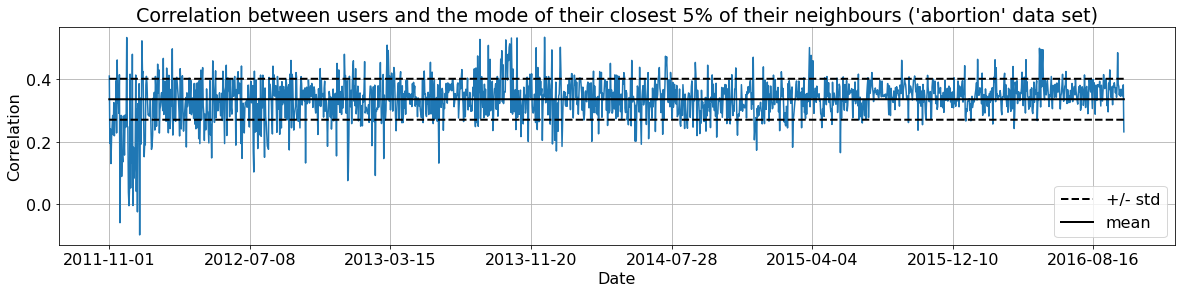

In [32]:
idx  = []
pidx = []
for i in range(0, 1751, 250): 
    idx.append(i)
    pidx.append(i + 980)

plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 16})
plt.plot(corr_agg[3])
plt.plot((np.array(corr_agg[3]).mean() + np.array(corr_agg[3]).std()) * np.ones(len(corr_agg[3])), color = 'k', linewidth = 2, linestyle = '--', label = "+/- std")
plt.plot((np.array(corr_agg[3]).mean() - np.array(corr_agg[3]).std()) * np.ones(len(corr_agg[3])), color = 'k', linewidth = 2, linestyle = '--')
plt.plot(np.array(corr_agg[3]).mean() * np.ones(len(corr_agg[3])), color = 'k', linewidth = 2, label = 'mean')

plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.title("Correlation between users and the mode of their closest 5% of their neighbours ('abortion' data set)")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_ab_corr_top5.png", bbox_inches = 'tight')

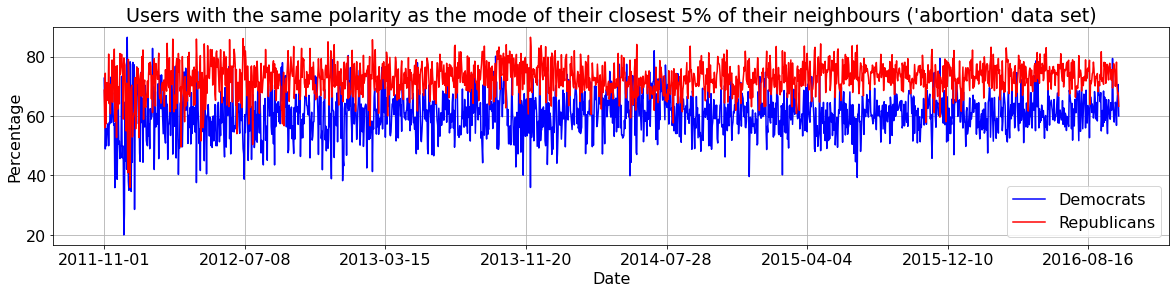

In [33]:
idx  = []
pidx = []
for i in range(0, 1751, 250): 
    idx.append(i)
    pidx.append(i + 980)

plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 16})
plt.plot(100 * np.array(perc_d_agg[3]), label = 'Democrats', color = 'b')
plt.plot(100 * np.array(perc_r_agg[3]), label = 'Republicans', color = 'r')
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Users with the same polarity as the mode of their closest 5% of their neighbours ('abortion' data set)")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_ad_perc_top5.png", bbox_inches = 'tight')

In [278]:
corr_agg   = np.array(corr_agg)
perc_d_agg = np.array(perc_d_agg)
perc_r_agg = np.array(perc_r_agg)

print("=" * 50)
print("For correlations:")
for i, j in zip(corr_agg, perc_neighbours):
    print("k = {}:".format(j))
    print("mean: {}".format(i.mean()))
    print("std:  {}".format(i.std()))
    print("mean +/- std:  {}".format(1 - (len(i[i > i.mean() + i.std()]) + len(i[i < i.mean() - i.std()])) / len(i)))
    print("mean +/- 2std: {}".format(1 - (len(i[i > i.mean() + 2 * i.std()]) + len(i[i < i.mean() - 2 * i.std()])) / len(i)))
    print("mean +/- 3std: {}".format(1 - (len(i[i > i.mean() + 3 * i.std()]) + len(i[i < i.mean() - 3 * i.std()])) / len(i)))   
    
print("=" * 50)
print("For Democratic neighbourhood percentages:")
for i, j in zip(perc_d_agg, perc_neighbours):
    print("k = {}:".format(j))
    print("mean: {}".format(i.mean()))
    print("std:  {}".format(i.std()))
    print("mean +/- std:  {}".format(1 - (len(i[i > i.mean() + i.std()]) + len(i[i < i.mean() - i.std()])) / len(i)))
    print("mean +/- 2std: {}".format(1 - (len(i[i > i.mean() + 2 * i.std()]) + len(i[i < i.mean() - 2 * i.std()])) / len(i)))
    print("mean +/- 3std: {}".format(1 - (len(i[i > i.mean() + 3 * i.std()]) + len(i[i < i.mean() - 3 * i.std()])) / len(i)))
    
print("=" * 50)
print("For Republican neighbourhood percentages:")
for i, j in zip(perc_r_agg, perc_neighbours):
    print("k = {}:".format(j))
    print("mean: {}".format(i.mean()))
    print("std:  {}".format(i.std()))
    print("mean +/- std:  {}".format(1 - (len(i[i > i.mean() + i.std()]) + len(i[i < i.mean() - i.std()])) / len(i)))
    print("mean +/- 2std: {}".format(1 - (len(i[i > i.mean() + 2 * i.std()]) + len(i[i < i.mean() - 2 * i.std()])) / len(i)))
    print("mean +/- 3std: {}".format(1 - (len(i[i > i.mean() + 3 * i.std()]) + len(i[i < i.mean() - 3 * i.std()])) / len(i)))

For correlations:
k = 0.01:
mean: 0.3092985026902146
std:  0.07555242984398472
mean +/- std:  0.7484764542936289
mean +/- 2std: 0.9512465373961219
mean +/- 3std: 0.9861495844875346
k = 0.02:
mean: 0.3223659650636141
std:  0.0701772131914839
mean +/- std:  0.7739612188365651
mean +/- 2std: 0.9518005540166204
mean +/- 3std: 0.9872576177285318
k = 0.03:
mean: 0.3293054555685719
std:  0.06701565157753796
mean +/- std:  0.7645429362880887
mean +/- 2std: 0.9529085872576177
mean +/- 3std: 0.990027700831025
k = 0.05:
mean: 0.33620968948493896
std:  0.06566157530572686
mean +/- std:  0.7678670360110803
mean +/- 2std: 0.9462603878116344
mean +/- 3std: 0.9872576177285318
k = 0.1:
mean: 0.33761520868798933
std:  0.05961696242031794
mean +/- std:  0.749584487534626
mean +/- 2std: 0.9462603878116344
mean +/- 3std: 0.9861495844875346
k = 0.15:
mean: 0.3368678250113393
std:  0.056554015240899286
mean +/- std:  0.7767313019390581
mean +/- 2std: 0.9451523545706371
mean +/- 3std: 0.9850415512465374
k = 0

In [182]:
# heatmaps for correlations between various k values
plt.figure(figsize = (6, 5))
sns.heatmap(pd.DataFrame(corr_agg).T.rename(columns = {0: "1%", 1: "2%", 2: "3%", 3: "5%", 4: "10%", 5: "15%", 6: "20%"}).corr())

plt.savefig("../plots/abortion_daily/corr_heatmap.png")
plt.close()

plt.figure(figsize = (6, 5))
sns.heatmap(pd.DataFrame(perc_d_agg).T.rename(columns = {0: "1%", 1: "2%", 2: "3%", 3: "5%", 4: "10%", 5: "15%", 6: "20%"}).corr())

plt.savefig("../plots/abortion_daily/perc_d_heatmap.png")
plt.close()

plt.figure(figsize = (6, 5))
sns.heatmap(pd.DataFrame(perc_r_agg).T.rename(columns = {0: "1%", 1: "2%", 2: "3%", 3: "5%", 4: "10%", 5: "15%", 6: "20%"}).corr())

plt.savefig("../plots/abortion_daily/perc_r_heatmap.png")
plt.close()

#### Correlation / Percentages rings

In [504]:
# get rings around the point of interest
perc_inner_ring = [0.01, 0.02, 0.03, 0.05, 0.10, 0.15, 0.20]
perc_outer_ring = [0.02, 0.03, 0.05, 0.10, 0.15, 0.20, 0.25]
corr_rings   = []
perc_d_rings = []
perc_r_rings = []
for inner, outer in zip(perc_inner_ring, perc_outer_ring):
    print("At ring {} - {}".format(inner, outer))
    
    corr   = []
    perc_d = []
    perc_r = []
    for j in range(980, len(ordered_pickle_files_)):

        print("Running for embedding {}/{}".format(j, len(ordered_pickle_files_)))

        # read the embeddings
        with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j]), "rb") as pickle_file:
            _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)    

        # compute the distance matrix
        distance = squareform(pdist(xy_pairs[nonzero_idx[j]]))
        distance = distance + distance.max() * 100 * np.identity(len(distance))

        # determine the mode polarity of the closest k nodes
        polarity_daily = []
        polarity_d     = []
        polarity_r     = []
        
        # get k
        k_inner = int(np.round(inner * len(nonzero_idx[j])))
        k_outer = int(np.round(outer * len(nonzero_idx[j])))
        if k_inner == 0:
            k_inner = 1
        if k_outer == 0:
            k_outer = k_inner + 1
        if k_outer == k_inner:
            k_outer = k_inner + 1
        for i in range(0, len(distance)):
            p = mode(polarities.loc[nonzero_idx[j][distance[i].argsort()[k_inner:k_outer]], 'Class'])[0][0]
            polarity_daily.append(p)

            if polarities.loc[nonzero_idx[j][i], 'Class'] == 0.0:
                polarity_d.append(p)

            else:
                polarity_r.append(p)

        # compute the correlation for the active users; 
        _corr, _ = pearsonr(polarities.loc[nonzero_idx[j], 'Class'], polarity_daily)
        corr.append(_corr)

        # get the percentage of nodes that are mostly surrounded by same-minded nodes
        perc_d.append(1 - np.sum(polarity_d) / len(polarity_d))
        perc_r.append(np.sum(polarity_r) / len(polarity_r))
        
    corr_rings.append(corr)
    perc_d_rings.append(perc_d)
    perc_r_rings.append(perc_r)

At ring 0.01 - 0.02
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Running for embedding 994/2785
Running for embedding 995/2785
Running for embedding 996/2785
Running for embedding 997/2785
Running for embedding 998/2785
Running for embedding 999/2785
Running for embedding 1000/2785
Running for embedding 1001/2785
Running for embedding 1002/2785
Running for embedding 1003/2785
Running for embedding 1004/2785
Running for embedding 1005/2785
Running for embedding 1006/2785
Running for embedding 1007/2785
Running for embedding 1008/2785
Running for embedding 1009/2785
Running for embedding 1010/2785
Running 

Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running for embedding 1251/2785
Running for embedding 1252/2785
Running for embedding 1253/2785
Running for embedding 1254/2785
Running for embedding 1255/2785
Running for embedding 1256/2785
Running for embedding 1257/2785
Running for embedding 1258/2785
Running for embedding 1259/2785
Running for embedding 1260/2785
Running for embedding 1261/2785
Running for embedding 1262/2785
Running for embedding 1263/2785
Running for embedding 1264/2785
Running for embedding 1265/2785
Running for embedding 1266/2785
Running for embedding 1267/2785
Running for embedding 1268/2785
Running for embedding 1269/2785
Running 

Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running for embedding 1509/2785
Running for embedding 1510/2785
Running for embedding 1511/2785
Running for embedding 1512/2785
Running for embedding 1513/2785
Running for embedding 1514/2785
Running for embedding 1515/2785
Running for embedding 1516/2785
Running for embedding 1517/2785
Running for embedding 1518/2785
Running for embedding 1519/2785
Running for embedding 1520/2785
Running for embedding 1521/2785
Running for embedding 1522/2785
Running for embedding 1523/2785
Running for embedding 1524/2785
Running for embedding 1525/2785
Running for embedding 1526/2785
Running 

Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running for embedding 1766/2785
Running for embedding 1767/2785
Running for embedding 1768/2785
Running for embedding 1769/2785
Running for embedding 1770/2785
Running for embedding 1771/2785
Running for embedding 1772/2785
Running for embedding 1773/2785
Running for embedding 1774/2785
Running for embedding 1775/2785
Running for embedding 1776/2785
Running for embedding 1777/2785
Running for embedding 1778/2785
Running for embedding 1779/2785
Running for embedding 1780/2785
Running for embedding 1781/2785
Running for embedding 1782/2785
Running for embedding 1783/2785
Running 

Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running for embedding 2023/2785
Running for embedding 2024/2785
Running for embedding 2025/2785
Running for embedding 2026/2785
Running for embedding 2027/2785
Running for embedding 2028/2785
Running for embedding 2029/2785
Running for embedding 2030/2785
Running for embedding 2031/2785
Running for embedding 2032/2785
Running for embedding 2033/2785
Running for embedding 2034/2785
Running for embedding 2035/2785
Running for embedding 2036/2785
Running for embedding 2037/2785
Running for embedding 2038/2785
Running for embedding 2039/2785
Running for embedding 2040/2785
Running 

Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running for embedding 2280/2785
Running for embedding 2281/2785
Running for embedding 2282/2785
Running for embedding 2283/2785
Running for embedding 2284/2785
Running for embedding 2285/2785
Running for embedding 2286/2785
Running for embedding 2287/2785
Running for embedding 2288/2785
Running for embedding 2289/2785
Running for embedding 2290/2785
Running for embedding 2291/2785
Running for embedding 2292/2785
Running for embedding 2293/2785
Running for embedding 2294/2785
Running for embedding 2295/2785
Running for embedding 2296/2785
Running for embedding 2297/2785
Running 

Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running for embedding 2537/2785
Running for embedding 2538/2785
Running for embedding 2539/2785
Running for embedding 2540/2785
Running for embedding 2541/2785
Running for embedding 2542/2785
Running for embedding 2543/2785
Running for embedding 2544/2785
Running for embedding 2545/2785
Running for embedding 2546/2785
Running for embedding 2547/2785
Running for embedding 2548/2785
Running for embedding 2549/2785
Running for embedding 2550/2785
Running for embedding 2551/2785
Running for embedding 2552/2785
Running for embedding 2553/2785
Running for embedding 2554/2785
Running 

Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At ring 0.02 - 0.03
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Running for embedding 994/2785
Running for embedding 995/2785
Running for embedding 996/2785
Running for embedding 997/2785
Running for embedding 998/2785
Running for embedding 999/2785
Running for embedding 1000/2785
Running for embedding 1001/2785
Running for embedding 1002/2785
Running for embedding 1003/2785
Running for embedding 1004/2785
Running for embedding 1005/2785
Running for embedding 1006/2785
Running 

Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running for embedding 1251/2785
Running for embedding 1252/2785
Running for embedding 1253/2785
Running for embedding 1254/2785
Running for embedding 1255/2785
Running for embedding 1256/2785
Running for embedding 1257/2785
Running for embedding 1258/2785
Running for embedding 1259/2785
Running for embedding 1260/2785
Running for embedding 1261/2785
Running for embedding 1262/2785
Running for embedding 1263/2785
Running for embedding 1264/2785
Running 

Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running for embedding 1509/2785
Running for embedding 1510/2785
Running for embedding 1511/2785
Running for embedding 1512/2785
Running for embedding 1513/2785
Running for embedding 1514/2785
Running for embedding 1515/2785
Running for embedding 1516/2785
Running for embedding 1517/2785
Running for embedding 1518/2785
Running for embedding 1519/2785
Running for embedding 1520/2785
Running for embedding 1521/2785
Running 

Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running for embedding 1766/2785
Running for embedding 1767/2785
Running for embedding 1768/2785
Running for embedding 1769/2785
Running for embedding 1770/2785
Running for embedding 1771/2785
Running for embedding 1772/2785
Running for embedding 1773/2785
Running for embedding 1774/2785
Running for embedding 1775/2785
Running for embedding 1776/2785
Running for embedding 1777/2785
Running for embedding 1778/2785
Running for embedding 1779/2785
Running 

Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running for embedding 2023/2785
Running for embedding 2024/2785
Running for embedding 2025/2785
Running for embedding 2026/2785
Running for embedding 2027/2785
Running for embedding 2028/2785
Running for embedding 2029/2785
Running for embedding 2030/2785
Running for embedding 2031/2785
Running for embedding 2032/2785
Running for embedding 2033/2785
Running for embedding 2034/2785
Running for embedding 2035/2785
Running for embedding 2036/2785
Running 

Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running for embedding 2280/2785
Running for embedding 2281/2785
Running for embedding 2282/2785
Running for embedding 2283/2785
Running for embedding 2284/2785
Running for embedding 2285/2785
Running for embedding 2286/2785
Running for embedding 2287/2785
Running for embedding 2288/2785
Running for embedding 2289/2785
Running for embedding 2290/2785
Running for embedding 2291/2785
Running for embedding 2292/2785
Running for embedding 2293/2785
Running 

Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running for embedding 2537/2785
Running for embedding 2538/2785
Running for embedding 2539/2785
Running for embedding 2540/2785
Running for embedding 2541/2785
Running for embedding 2542/2785
Running for embedding 2543/2785
Running for embedding 2544/2785
Running for embedding 2545/2785
Running for embedding 2546/2785
Running for embedding 2547/2785
Running for embedding 2548/2785
Running for embedding 2549/2785
Running for embedding 2550/2785
Running 

Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At ring 0.03 - 0.05
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Running for embedding 994/2785
Running for embedding 995/2785
Running for embedding 996/2785
Running for embedding 997/2785
Running for embedding 998/2785
Running for embedding 999/2785
Running for embedding 1000/2785
Running for embedding 1001/2785
Running for embedding 1002/2785
Running 

Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running for embedding 1251/2785
Running for embedding 1252/2785
Running for embedding 1253/2785
Running for embedding 1254/2785
Running for embedding 1255/2785
Running for embedding 1256/2785
Running for embedding 1257/2785
Running for embedding 1258/2785
Running for embedding 1259/2785
Running 

Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running for embedding 1509/2785
Running for embedding 1510/2785
Running for embedding 1511/2785
Running for embedding 1512/2785
Running for embedding 1513/2785
Running for embedding 1514/2785
Running for embedding 1515/2785
Running for embedding 1516/2785
Running 

Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running for embedding 1766/2785
Running for embedding 1767/2785
Running for embedding 1768/2785
Running for embedding 1769/2785
Running for embedding 1770/2785
Running for embedding 1771/2785
Running for embedding 1772/2785
Running for embedding 1773/2785
Running 

Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running for embedding 2023/2785
Running for embedding 2024/2785
Running for embedding 2025/2785
Running for embedding 2026/2785
Running for embedding 2027/2785
Running for embedding 2028/2785
Running for embedding 2029/2785
Running for embedding 2030/2785
Running for embedding 2031/2785
Running 

Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running for embedding 2280/2785
Running for embedding 2281/2785
Running for embedding 2282/2785
Running for embedding 2283/2785
Running for embedding 2284/2785
Running for embedding 2285/2785
Running for embedding 2286/2785
Running for embedding 2287/2785
Running for embedding 2288/2785
Running 

Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running for embedding 2537/2785
Running for embedding 2538/2785
Running for embedding 2539/2785
Running for embedding 2540/2785
Running for embedding 2541/2785
Running for embedding 2542/2785
Running for embedding 2543/2785
Running for embedding 2544/2785
Running for embedding 2545/2785
Running 

Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At ring 0.05 - 0.1
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Running for embedding 994/2785
Running for embedding 995/2785
Running for embedding 996/2785
Running for embedding 997/2785
Running

Running for embedding 1224/2785
Running for embedding 1225/2785
Running for embedding 1226/2785
Running for embedding 1227/2785
Running for embedding 1228/2785
Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running for embedding 1251/2785
Running for embedding 1252/2785
Running for embedding 1253/2785
Running for embedding 1254/2785
Running 

Running for embedding 1481/2785
Running for embedding 1482/2785
Running for embedding 1483/2785
Running for embedding 1484/2785
Running for embedding 1485/2785
Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running for embedding 1509/2785
Running for embedding 1510/2785
Running for embedding 1511/2785
Running 

Running for embedding 1738/2785
Running for embedding 1739/2785
Running for embedding 1740/2785
Running for embedding 1741/2785
Running for embedding 1742/2785
Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running for embedding 1766/2785
Running for embedding 1767/2785
Running for embedding 1768/2785
Running 

Running for embedding 1995/2785
Running for embedding 1996/2785
Running for embedding 1997/2785
Running for embedding 1998/2785
Running for embedding 1999/2785
Running for embedding 2000/2785
Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running for embedding 2023/2785
Running for embedding 2024/2785
Running for embedding 2025/2785
Running 

Running for embedding 2253/2785
Running for embedding 2254/2785
Running for embedding 2255/2785
Running for embedding 2256/2785
Running for embedding 2257/2785
Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running for embedding 2280/2785
Running for embedding 2281/2785
Running for embedding 2282/2785
Running for embedding 2283/2785
Running 

Running for embedding 2510/2785
Running for embedding 2511/2785
Running for embedding 2512/2785
Running for embedding 2513/2785
Running for embedding 2514/2785
Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running for embedding 2537/2785
Running for embedding 2538/2785
Running for embedding 2539/2785
Running for embedding 2540/2785
Running 

Running for embedding 2767/2785
Running for embedding 2768/2785
Running for embedding 2769/2785
Running for embedding 2770/2785
Running for embedding 2771/2785
Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At ring 0.1 - 0.15
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Ru

Running for embedding 1219/2785
Running for embedding 1220/2785
Running for embedding 1221/2785
Running for embedding 1222/2785
Running for embedding 1223/2785
Running for embedding 1224/2785
Running for embedding 1225/2785
Running for embedding 1226/2785
Running for embedding 1227/2785
Running for embedding 1228/2785
Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running 

Running for embedding 1476/2785
Running for embedding 1477/2785
Running for embedding 1478/2785
Running for embedding 1479/2785
Running for embedding 1480/2785
Running for embedding 1481/2785
Running for embedding 1482/2785
Running for embedding 1483/2785
Running for embedding 1484/2785
Running for embedding 1485/2785
Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running 

Running for embedding 1733/2785
Running for embedding 1734/2785
Running for embedding 1735/2785
Running for embedding 1736/2785
Running for embedding 1737/2785
Running for embedding 1738/2785
Running for embedding 1739/2785
Running for embedding 1740/2785
Running for embedding 1741/2785
Running for embedding 1742/2785
Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running 

Running for embedding 1990/2785
Running for embedding 1991/2785
Running for embedding 1992/2785
Running for embedding 1993/2785
Running for embedding 1994/2785
Running for embedding 1995/2785
Running for embedding 1996/2785
Running for embedding 1997/2785
Running for embedding 1998/2785
Running for embedding 1999/2785
Running for embedding 2000/2785
Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running 

Running for embedding 2247/2785
Running for embedding 2248/2785
Running for embedding 2249/2785
Running for embedding 2250/2785
Running for embedding 2251/2785
Running for embedding 2252/2785
Running for embedding 2253/2785
Running for embedding 2254/2785
Running for embedding 2255/2785
Running for embedding 2256/2785
Running for embedding 2257/2785
Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running 

Running for embedding 2504/2785
Running for embedding 2505/2785
Running for embedding 2506/2785
Running for embedding 2507/2785
Running for embedding 2508/2785
Running for embedding 2509/2785
Running for embedding 2510/2785
Running for embedding 2511/2785
Running for embedding 2512/2785
Running for embedding 2513/2785
Running for embedding 2514/2785
Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running 

Running for embedding 2761/2785
Running for embedding 2762/2785
Running for embedding 2763/2785
Running for embedding 2764/2785
Running for embedding 2765/2785
Running for embedding 2766/2785
Running for embedding 2767/2785
Running for embedding 2768/2785
Running for embedding 2769/2785
Running for embedding 2770/2785
Running for embedding 2771/2785
Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At ring 0.15 - 0.2
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2

Running for embedding 1214/2785
Running for embedding 1215/2785
Running for embedding 1216/2785
Running for embedding 1217/2785
Running for embedding 1218/2785
Running for embedding 1219/2785
Running for embedding 1220/2785
Running for embedding 1221/2785
Running for embedding 1222/2785
Running for embedding 1223/2785
Running for embedding 1224/2785
Running for embedding 1225/2785
Running for embedding 1226/2785
Running for embedding 1227/2785
Running for embedding 1228/2785
Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running 

Running for embedding 1471/2785
Running for embedding 1472/2785
Running for embedding 1473/2785
Running for embedding 1474/2785
Running for embedding 1475/2785
Running for embedding 1476/2785
Running for embedding 1477/2785
Running for embedding 1478/2785
Running for embedding 1479/2785
Running for embedding 1480/2785
Running for embedding 1481/2785
Running for embedding 1482/2785
Running for embedding 1483/2785
Running for embedding 1484/2785
Running for embedding 1485/2785
Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running 

Running for embedding 1729/2785
Running for embedding 1730/2785
Running for embedding 1731/2785
Running for embedding 1732/2785
Running for embedding 1733/2785
Running for embedding 1734/2785
Running for embedding 1735/2785
Running for embedding 1736/2785
Running for embedding 1737/2785
Running for embedding 1738/2785
Running for embedding 1739/2785
Running for embedding 1740/2785
Running for embedding 1741/2785
Running for embedding 1742/2785
Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running for embedding 1755/2785
Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running 

Running for embedding 1987/2785
Running for embedding 1988/2785
Running for embedding 1989/2785
Running for embedding 1990/2785
Running for embedding 1991/2785
Running for embedding 1992/2785
Running for embedding 1993/2785
Running for embedding 1994/2785
Running for embedding 1995/2785
Running for embedding 1996/2785
Running for embedding 1997/2785
Running for embedding 1998/2785
Running for embedding 1999/2785
Running for embedding 2000/2785
Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running for embedding 2012/2785
Running for embedding 2013/2785
Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running 

Running for embedding 2244/2785
Running for embedding 2245/2785
Running for embedding 2246/2785
Running for embedding 2247/2785
Running for embedding 2248/2785
Running for embedding 2249/2785
Running for embedding 2250/2785
Running for embedding 2251/2785
Running for embedding 2252/2785
Running for embedding 2253/2785
Running for embedding 2254/2785
Running for embedding 2255/2785
Running for embedding 2256/2785
Running for embedding 2257/2785
Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running for embedding 2269/2785
Running for embedding 2270/2785
Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running 

Running for embedding 2501/2785
Running for embedding 2502/2785
Running for embedding 2503/2785
Running for embedding 2504/2785
Running for embedding 2505/2785
Running for embedding 2506/2785
Running for embedding 2507/2785
Running for embedding 2508/2785
Running for embedding 2509/2785
Running for embedding 2510/2785
Running for embedding 2511/2785
Running for embedding 2512/2785
Running for embedding 2513/2785
Running for embedding 2514/2785
Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running for embedding 2526/2785
Running for embedding 2527/2785
Running for embedding 2528/2785
Running for embedding 2529/2785
Running for embedding 2530/2785
Running for embedding 2531/2785
Running 

Running for embedding 2758/2785
Running for embedding 2759/2785
Running for embedding 2760/2785
Running for embedding 2761/2785
Running for embedding 2762/2785
Running for embedding 2763/2785
Running for embedding 2764/2785
Running for embedding 2765/2785
Running for embedding 2766/2785
Running for embedding 2767/2785
Running for embedding 2768/2785
Running for embedding 2769/2785
Running for embedding 2770/2785
Running for embedding 2771/2785
Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running for embedding 2783/2785
Running for embedding 2784/2785
At ring 0.2 - 0.25
Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 98

Running for embedding 1210/2785
Running for embedding 1211/2785
Running for embedding 1212/2785
Running for embedding 1213/2785
Running for embedding 1214/2785
Running for embedding 1215/2785
Running for embedding 1216/2785
Running for embedding 1217/2785
Running for embedding 1218/2785
Running for embedding 1219/2785
Running for embedding 1220/2785
Running for embedding 1221/2785
Running for embedding 1222/2785
Running for embedding 1223/2785
Running for embedding 1224/2785
Running for embedding 1225/2785
Running for embedding 1226/2785
Running for embedding 1227/2785
Running for embedding 1228/2785
Running for embedding 1229/2785
Running for embedding 1230/2785
Running for embedding 1231/2785
Running for embedding 1232/2785
Running for embedding 1233/2785
Running for embedding 1234/2785
Running for embedding 1235/2785
Running for embedding 1236/2785
Running for embedding 1237/2785
Running for embedding 1238/2785
Running for embedding 1239/2785
Running for embedding 1240/2785
Running 

Running for embedding 1467/2785
Running for embedding 1468/2785
Running for embedding 1469/2785
Running for embedding 1470/2785
Running for embedding 1471/2785
Running for embedding 1472/2785
Running for embedding 1473/2785
Running for embedding 1474/2785
Running for embedding 1475/2785
Running for embedding 1476/2785
Running for embedding 1477/2785
Running for embedding 1478/2785
Running for embedding 1479/2785
Running for embedding 1480/2785
Running for embedding 1481/2785
Running for embedding 1482/2785
Running for embedding 1483/2785
Running for embedding 1484/2785
Running for embedding 1485/2785
Running for embedding 1486/2785
Running for embedding 1487/2785
Running for embedding 1488/2785
Running for embedding 1489/2785
Running for embedding 1490/2785
Running for embedding 1491/2785
Running for embedding 1492/2785
Running for embedding 1493/2785
Running for embedding 1494/2785
Running for embedding 1495/2785
Running for embedding 1496/2785
Running for embedding 1497/2785
Running 

Running for embedding 1724/2785
Running for embedding 1725/2785
Running for embedding 1726/2785
Running for embedding 1727/2785
Running for embedding 1728/2785
Running for embedding 1729/2785
Running for embedding 1730/2785
Running for embedding 1731/2785
Running for embedding 1732/2785
Running for embedding 1733/2785
Running for embedding 1734/2785
Running for embedding 1735/2785
Running for embedding 1736/2785
Running for embedding 1737/2785
Running for embedding 1738/2785
Running for embedding 1739/2785
Running for embedding 1740/2785
Running for embedding 1741/2785
Running for embedding 1742/2785
Running for embedding 1743/2785
Running for embedding 1744/2785
Running for embedding 1745/2785
Running for embedding 1746/2785
Running for embedding 1747/2785
Running for embedding 1748/2785
Running for embedding 1749/2785
Running for embedding 1750/2785
Running for embedding 1751/2785
Running for embedding 1752/2785
Running for embedding 1753/2785
Running for embedding 1754/2785
Running 

Running for embedding 1981/2785
Running for embedding 1982/2785
Running for embedding 1983/2785
Running for embedding 1984/2785
Running for embedding 1985/2785
Running for embedding 1986/2785
Running for embedding 1987/2785
Running for embedding 1988/2785
Running for embedding 1989/2785
Running for embedding 1990/2785
Running for embedding 1991/2785
Running for embedding 1992/2785
Running for embedding 1993/2785
Running for embedding 1994/2785
Running for embedding 1995/2785
Running for embedding 1996/2785
Running for embedding 1997/2785
Running for embedding 1998/2785
Running for embedding 1999/2785
Running for embedding 2000/2785
Running for embedding 2001/2785
Running for embedding 2002/2785
Running for embedding 2003/2785
Running for embedding 2004/2785
Running for embedding 2005/2785
Running for embedding 2006/2785
Running for embedding 2007/2785
Running for embedding 2008/2785
Running for embedding 2009/2785
Running for embedding 2010/2785
Running for embedding 2011/2785
Running 

Running for embedding 2238/2785
Running for embedding 2239/2785
Running for embedding 2240/2785
Running for embedding 2241/2785
Running for embedding 2242/2785
Running for embedding 2243/2785
Running for embedding 2244/2785
Running for embedding 2245/2785
Running for embedding 2246/2785
Running for embedding 2247/2785
Running for embedding 2248/2785
Running for embedding 2249/2785
Running for embedding 2250/2785
Running for embedding 2251/2785
Running for embedding 2252/2785
Running for embedding 2253/2785
Running for embedding 2254/2785
Running for embedding 2255/2785
Running for embedding 2256/2785
Running for embedding 2257/2785
Running for embedding 2258/2785
Running for embedding 2259/2785
Running for embedding 2260/2785
Running for embedding 2261/2785
Running for embedding 2262/2785
Running for embedding 2263/2785
Running for embedding 2264/2785
Running for embedding 2265/2785
Running for embedding 2266/2785
Running for embedding 2267/2785
Running for embedding 2268/2785
Running 

Running for embedding 2495/2785
Running for embedding 2496/2785
Running for embedding 2497/2785
Running for embedding 2498/2785
Running for embedding 2499/2785
Running for embedding 2500/2785
Running for embedding 2501/2785
Running for embedding 2502/2785
Running for embedding 2503/2785
Running for embedding 2504/2785
Running for embedding 2505/2785
Running for embedding 2506/2785
Running for embedding 2507/2785
Running for embedding 2508/2785
Running for embedding 2509/2785
Running for embedding 2510/2785
Running for embedding 2511/2785
Running for embedding 2512/2785
Running for embedding 2513/2785
Running for embedding 2514/2785
Running for embedding 2515/2785
Running for embedding 2516/2785
Running for embedding 2517/2785
Running for embedding 2518/2785
Running for embedding 2519/2785
Running for embedding 2520/2785
Running for embedding 2521/2785
Running for embedding 2522/2785
Running for embedding 2523/2785
Running for embedding 2524/2785
Running for embedding 2525/2785
Running 

Running for embedding 2752/2785
Running for embedding 2753/2785
Running for embedding 2754/2785
Running for embedding 2755/2785
Running for embedding 2756/2785
Running for embedding 2757/2785
Running for embedding 2758/2785
Running for embedding 2759/2785
Running for embedding 2760/2785
Running for embedding 2761/2785
Running for embedding 2762/2785
Running for embedding 2763/2785
Running for embedding 2764/2785
Running for embedding 2765/2785
Running for embedding 2766/2785
Running for embedding 2767/2785
Running for embedding 2768/2785
Running for embedding 2769/2785
Running for embedding 2770/2785
Running for embedding 2771/2785
Running for embedding 2772/2785
Running for embedding 2773/2785
Running for embedding 2774/2785
Running for embedding 2775/2785
Running for embedding 2776/2785
Running for embedding 2777/2785
Running for embedding 2778/2785
Running for embedding 2779/2785
Running for embedding 2780/2785
Running for embedding 2781/2785
Running for embedding 2782/2785
Running 

In [505]:
### Pickle the correlations and the percentages
with open("../pickle/abortion_daily_active_users_corr_rings.pkl", "wb") as f:
    pkl.dump([corr_rings, perc_d_rings, perc_r_rings], f)

In [7]:
### load the correlations and the percentages
with open("../pickle/abortion_daily_active_users_corr_rings.pkl", "rb") as f:
    corr_rings, perc_d_rings, perc_r_rings = pkl.load(f)

### Plot some values

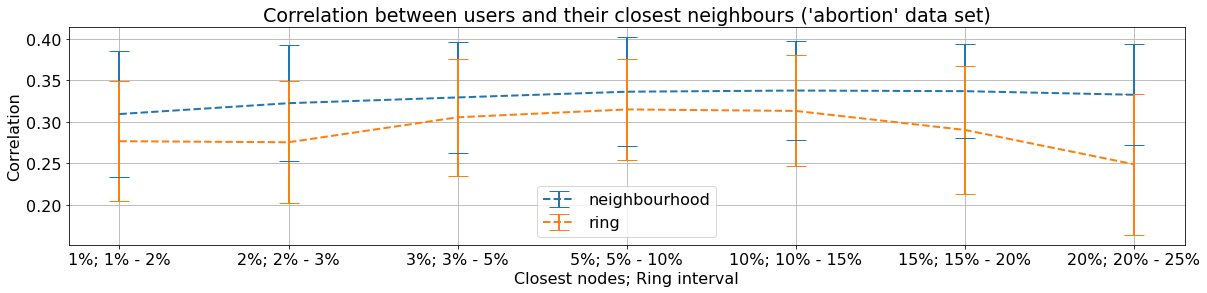

In [17]:
idx  = range(0, 7)
pidx = ["1%; 1% - 2%", "2%; 2% - 3%", "3%; 3% - 5%", "5%; 5% - 10%", "10%; 10% - 15%", "15%; 15% - 20%", "20%; 20% - 25%"]

plt.figure(figsize = (20, 4))
plt.errorbar(range(0, 7), np.array(corr_agg).mean(axis = 1), np.array(corr_agg).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'neighbourhood')
plt.errorbar(range(0, 7), np.array(corr_rings).mean(axis = 1), np.array(corr_rings).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'ring')
plt.xticks(ticks = idx, labels = pidx)
plt.title("Correlation between users and their closest neighbours ('abortion' data set)")
plt.xlabel("Closest nodes; Ring interval")
plt.ylabel("Correlation")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_ab_corr_rings.png", bbox_inches = 'tight')

In [274]:
print(np.array(corr_agg).mean(axis = 1))
print(np.array(corr_rings).mean(axis = 1))

print(np.array(corr_agg).std(axis = 1))
print(np.array(corr_rings).std(axis = 1))

[0.3092985  0.32236597 0.32930546 0.33620969 0.33761521 0.33686783
 0.3325273 ]
[0.27655105 0.27527562 0.30537317 0.31483547 0.31304641 0.29013337
 0.24875767]
[0.07555243 0.07017721 0.06701565 0.06566158 0.05961696 0.05655402
 0.06086913]
[0.07244925 0.07332673 0.07048883 0.06111442 0.06691879 0.07706293
 0.08517691]


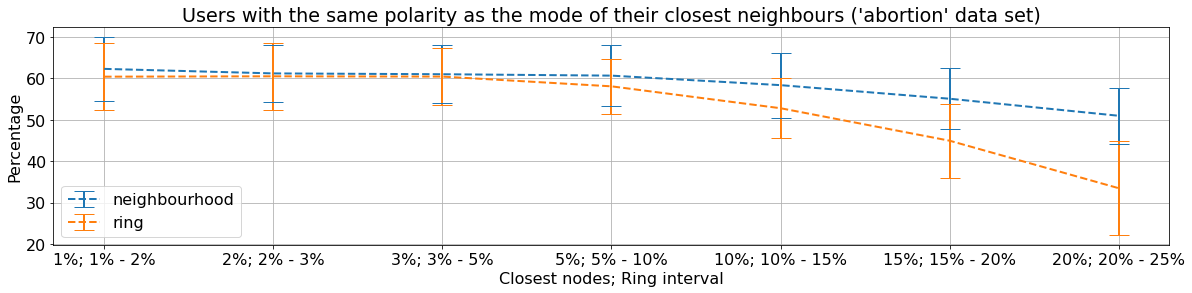

In [20]:
idx  = range(0, 7)
pidx = ["1%; 1% - 2%", "2%; 2% - 3%", "3%; 3% - 5%", "5%; 5% - 10%", "10%; 10% - 15%", "15%; 15% - 20%", "20%; 20% - 25%"]

plt.figure(figsize = (20, 4))
plt.errorbar(range(0, 7), 100 * np.array(perc_d_agg).mean(axis = 1), 100 * np.array(perc_d_agg).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'neighbourhood')
plt.errorbar(range(0, 7), 100 * np.array(perc_d_rings).mean(axis = 1), 100 * np.array(perc_d_rings).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'ring')
plt.xticks(ticks = idx, labels = pidx)
plt.title("Users with the same polarity as the mode of their closest neighbours ('abortion' data set)")
plt.xlabel("Closest nodes; Ring interval")
plt.ylabel("Percentage")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_ab_perc_rings_d.png", bbox_inches = 'tight')

In [370]:
print(np.array(perc_d_agg).mean(axis = 1))
print(np.array(perc_d_rings).mean(axis = 1))

print(np.array(perc_d_agg).std(axis = 1))
print(np.array(perc_d_rings).std(axis = 1))

[0.62293014 0.61197674 0.60998282 0.60661173 0.58361691 0.55079742
 0.50966052]
[0.60409789 0.60496138 0.6042858  0.58075541 0.52788481 0.44940051
 0.33468257]
[0.07639852 0.06787502 0.06991676 0.07325267 0.07836124 0.07320636
 0.06759173]
[0.08149985 0.08098212 0.06809201 0.06669645 0.07288005 0.0891272
 0.11282981]


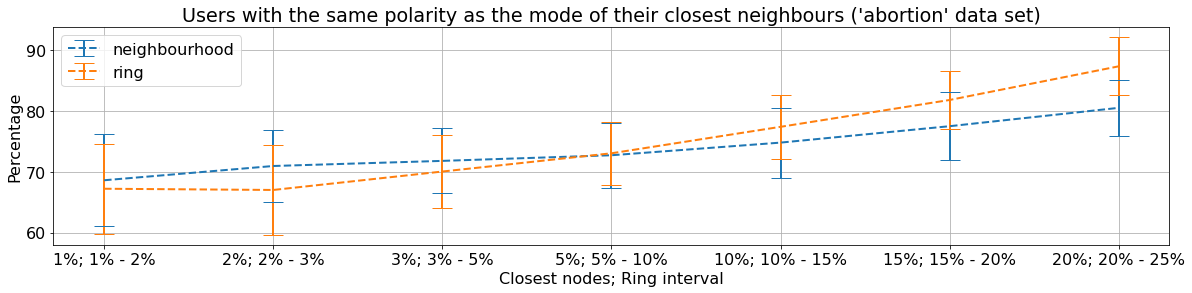

In [21]:
idx  = range(0, 7)
pidx = ["1%; 1% - 2%", "2%; 2% - 3%", "3%; 3% - 5%", "5%; 5% - 10%", "10%; 10% - 15%", "15%; 15% - 20%", "20%; 20% - 25%"]

plt.figure(figsize = (20, 4))
plt.errorbar(range(0, 7), 100 * np.array(perc_r_agg).mean(axis = 1), 100 * np.array(perc_r_agg).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'neighbourhood')
plt.errorbar(range(0, 7), 100 * np.array(perc_r_rings).mean(axis = 1), 100 * np.array(perc_r_rings).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'ring')
plt.xticks(ticks = idx, labels = pidx)
plt.title("Users with the same polarity as the mode of their closest neighbours ('abortion' data set)")
plt.xlabel("Closest nodes; Ring interval")
plt.ylabel("Percentage")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_ab_perc_rings_r.png", bbox_inches = 'tight')

In [268]:
print(np.array(perc_r_agg).mean(axis = 1))
print(np.array(perc_r_rings).mean(axis = 1))

print(np.array(perc_r_agg).std(axis = 1))
print(np.array(perc_r_rings).std(axis = 1))

[0.68589233 0.70933324 0.71775214 0.72700605 0.74779044 0.77477107
 0.80493796]
[0.67194062 0.66994162 0.70024196 0.73023909 0.77375008 0.8178941
 0.87322389]
[0.0758847  0.05871655 0.05350051 0.05310353 0.05758758 0.05573286
 0.046472  ]
[0.07430022 0.07391307 0.05950602 0.05197938 0.0525202  0.0481281
 0.047793  ]


### In-between days correlations

In [50]:
# get correlation between consecutive days / vs aggregated graph

with open("../pickle/abortion_daily_eig_aligned_norm2.pkl", "rb") as pickle_file:
     _, _, base, _, _, _, _, _, _, _ = pkl.load(pickle_file)    

corr_change   = []
corr_change_d = []
corr_change_r = []

corr_change_base   = []
corr_change_base_d = []
corr_change_base_r = []
for j in range(980, len(ordered_pickle_files_)):

    print("Running for embedding {}/{}".format(j, len(ordered_pickle_files_)))

    # read the embeddings
    # for the day
    with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j]), "rb") as pickle_file:
        _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)    
    # the previous day
    with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j - 1]), "rb") as pickle_file:
        _, _, xy_pairs_previous, _, _, _, _, _, _, _ = pkl.load(pickle_file) 
        
    # get the correlations for consecutive days
    _corr, _ = pearsonr(xy_pairs.flatten(), xy_pairs_previous.flatten())
    corr_change.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls0.index].flatten(), xy_pairs_previous[cls0.index].flatten())
    corr_change_d.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls1.index].flatten(), xy_pairs_previous[cls1.index].flatten())
    corr_change_r.append(_corr)
    
    # get the correlation between the averaged graph and specific days
    _corr, _ = pearsonr(xy_pairs.flatten(), base.flatten())
    corr_change_base.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls0.index].flatten(), base[cls0.index].flatten())
    corr_change_base_d.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls1.index].flatten(), base[cls1.index].flatten())
    corr_change_base_r.append(_corr)

Running for embedding 980/2785
Running for embedding 981/2785
Running for embedding 982/2785
Running for embedding 983/2785
Running for embedding 984/2785
Running for embedding 985/2785
Running for embedding 986/2785
Running for embedding 987/2785
Running for embedding 988/2785
Running for embedding 989/2785
Running for embedding 990/2785
Running for embedding 991/2785
Running for embedding 992/2785
Running for embedding 993/2785
Running for embedding 994/2785
Running for embedding 995/2785
Running for embedding 996/2785
Running for embedding 997/2785
Running for embedding 998/2785
Running for embedding 999/2785
Running for embedding 1000/2785
Running for embedding 1001/2785
Running for embedding 1002/2785
Running for embedding 1003/2785
Running for embedding 1004/2785
Running for embedding 1005/2785
Running for embedding 1006/2785
Running for embedding 1007/2785
Running for embedding 1008/2785
Running for embedding 1009/2785
Running for embedding 1010/2785
Running for embedding 1011/2

Running for embedding 1239/2785
Running for embedding 1240/2785
Running for embedding 1241/2785
Running for embedding 1242/2785
Running for embedding 1243/2785
Running for embedding 1244/2785
Running for embedding 1245/2785
Running for embedding 1246/2785
Running for embedding 1247/2785
Running for embedding 1248/2785
Running for embedding 1249/2785
Running for embedding 1250/2785
Running for embedding 1251/2785
Running for embedding 1252/2785
Running for embedding 1253/2785
Running for embedding 1254/2785
Running for embedding 1255/2785
Running for embedding 1256/2785
Running for embedding 1257/2785
Running for embedding 1258/2785
Running for embedding 1259/2785
Running for embedding 1260/2785
Running for embedding 1261/2785
Running for embedding 1262/2785
Running for embedding 1263/2785
Running for embedding 1264/2785
Running for embedding 1265/2785
Running for embedding 1266/2785
Running for embedding 1267/2785
Running for embedding 1268/2785
Running for embedding 1269/2785
Running 

Running for embedding 1498/2785
Running for embedding 1499/2785
Running for embedding 1500/2785
Running for embedding 1501/2785
Running for embedding 1502/2785
Running for embedding 1503/2785
Running for embedding 1504/2785
Running for embedding 1505/2785
Running for embedding 1506/2785
Running for embedding 1507/2785
Running for embedding 1508/2785
Running for embedding 1509/2785
Running for embedding 1510/2785
Running for embedding 1511/2785
Running for embedding 1512/2785
Running for embedding 1513/2785
Running for embedding 1514/2785
Running for embedding 1515/2785
Running for embedding 1516/2785
Running for embedding 1517/2785
Running for embedding 1518/2785
Running for embedding 1519/2785
Running for embedding 1520/2785
Running for embedding 1521/2785
Running for embedding 1522/2785
Running for embedding 1523/2785
Running for embedding 1524/2785
Running for embedding 1525/2785
Running for embedding 1526/2785
Running for embedding 1527/2785
Running for embedding 1528/2785
Running 

Running for embedding 1756/2785
Running for embedding 1757/2785
Running for embedding 1758/2785
Running for embedding 1759/2785
Running for embedding 1760/2785
Running for embedding 1761/2785
Running for embedding 1762/2785
Running for embedding 1763/2785
Running for embedding 1764/2785
Running for embedding 1765/2785
Running for embedding 1766/2785
Running for embedding 1767/2785
Running for embedding 1768/2785
Running for embedding 1769/2785
Running for embedding 1770/2785
Running for embedding 1771/2785
Running for embedding 1772/2785
Running for embedding 1773/2785
Running for embedding 1774/2785
Running for embedding 1775/2785
Running for embedding 1776/2785
Running for embedding 1777/2785
Running for embedding 1778/2785
Running for embedding 1779/2785
Running for embedding 1780/2785
Running for embedding 1781/2785
Running for embedding 1782/2785
Running for embedding 1783/2785
Running for embedding 1784/2785
Running for embedding 1785/2785
Running for embedding 1786/2785
Running 

Running for embedding 2014/2785
Running for embedding 2015/2785
Running for embedding 2016/2785
Running for embedding 2017/2785
Running for embedding 2018/2785
Running for embedding 2019/2785
Running for embedding 2020/2785
Running for embedding 2021/2785
Running for embedding 2022/2785
Running for embedding 2023/2785
Running for embedding 2024/2785
Running for embedding 2025/2785
Running for embedding 2026/2785
Running for embedding 2027/2785
Running for embedding 2028/2785
Running for embedding 2029/2785
Running for embedding 2030/2785
Running for embedding 2031/2785
Running for embedding 2032/2785
Running for embedding 2033/2785
Running for embedding 2034/2785
Running for embedding 2035/2785
Running for embedding 2036/2785
Running for embedding 2037/2785
Running for embedding 2038/2785
Running for embedding 2039/2785
Running for embedding 2040/2785
Running for embedding 2041/2785
Running for embedding 2042/2785
Running for embedding 2043/2785
Running for embedding 2044/2785
Running 

Running for embedding 2271/2785
Running for embedding 2272/2785
Running for embedding 2273/2785
Running for embedding 2274/2785
Running for embedding 2275/2785
Running for embedding 2276/2785
Running for embedding 2277/2785
Running for embedding 2278/2785
Running for embedding 2279/2785
Running for embedding 2280/2785
Running for embedding 2281/2785
Running for embedding 2282/2785
Running for embedding 2283/2785
Running for embedding 2284/2785
Running for embedding 2285/2785
Running for embedding 2286/2785
Running for embedding 2287/2785
Running for embedding 2288/2785
Running for embedding 2289/2785
Running for embedding 2290/2785
Running for embedding 2291/2785
Running for embedding 2292/2785
Running for embedding 2293/2785
Running for embedding 2294/2785
Running for embedding 2295/2785
Running for embedding 2296/2785
Running for embedding 2297/2785
Running for embedding 2298/2785
Running for embedding 2299/2785
Running for embedding 2300/2785
Running for embedding 2301/2785
Running 

Running for embedding 2531/2785
Running for embedding 2532/2785
Running for embedding 2533/2785
Running for embedding 2534/2785
Running for embedding 2535/2785
Running for embedding 2536/2785
Running for embedding 2537/2785
Running for embedding 2538/2785
Running for embedding 2539/2785
Running for embedding 2540/2785
Running for embedding 2541/2785
Running for embedding 2542/2785
Running for embedding 2543/2785
Running for embedding 2544/2785
Running for embedding 2545/2785
Running for embedding 2546/2785
Running for embedding 2547/2785
Running for embedding 2548/2785
Running for embedding 2549/2785
Running for embedding 2550/2785
Running for embedding 2551/2785
Running for embedding 2552/2785
Running for embedding 2553/2785
Running for embedding 2554/2785
Running for embedding 2555/2785
Running for embedding 2556/2785
Running for embedding 2557/2785
Running for embedding 2558/2785
Running for embedding 2559/2785
Running for embedding 2560/2785
Running for embedding 2561/2785
Running 

In [65]:
### Pickle the correlations 
with open("../pickle/abortion_daily_corr_change.pkl", "wb") as f:
    pkl.dump([corr_change, corr_change_d, corr_change_r, corr_change_base, corr_change_base_d, corr_change_base_r], f)

## For the 'guncontrol' data set

In [22]:
# load the indexes corresponding to the non-zero entries
with open("../pickle/guncontrol_daily_nonzero_indexes.pkl", "rb") as f:
    nonzero_idx = pkl.load(f)
    
# get dates mapping
pickle_folder_path = "../pickle/guncontrol_daily_largest_aligned_norm2/"

pickle_files_aligned = [f for f in os.listdir(pickle_folder_path) if os.path.isfile(os.path.join(pickle_folder_path, f))]

pickle_idx = []
for pickle_ in pickle_files_aligned:
    pickle_idx.append((pickle_.split(".")[0].split("_")[1]))

ordered_pickle_files_ = []
for i, j in sorted(zip(pickle_idx, pickle_files_aligned)):
    ordered_pickle_files_.append(j)
    
# get the polarity scores
polarities = pd.read_csv("../keras/guncontrol_daily/ordered_predictions.csv")

cls0 = polarities[polarities["Class"] == 0]
cls1 = polarities[polarities["Class"] == 1]

pickle_idx.sort()

In [313]:
perc_neighbours = [0.01, 0.02, 0.03, 0.05, 0.1, 0.15, 0.20]

corr_agg   = []
perc_d_agg = []
perc_r_agg = []
for _n in perc_neighbours:
    print("At {} neighbours".format(_n))
    
    corr   = []
    perc_d = []
    perc_r = []
    for j in range(606, len(ordered_pickle_files_)):

        print("Running for embedding {}/{}".format(j, len(ordered_pickle_files_)))

        # read the embeddings
        with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j]), "rb") as pickle_file:
            _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)    

        # compute the distance matrix
        distance = squareform(pdist(xy_pairs[nonzero_idx[j]]))
        distance = distance + distance.max() * 100 * np.identity(len(distance))

        # determine the mode polarity of the closest k nodes
        polarity_daily = []
        polarity_d     = []
        polarity_r     = []
        
        # get k
        k = int(np.round(_n * len(nonzero_idx[j])))
        if k == 0:
            k = 1
        for i in range(0, len(distance)):
            p = mode(polarities.loc[nonzero_idx[j][distance[i].argsort()[0:k]], 'Class'])[0][0]
            polarity_daily.append(p)

            if polarities.loc[nonzero_idx[j][i], 'Class'] == 0.0:
                polarity_d.append(p)

            else:
                polarity_r.append(p)

        # compute the correlation for the active users; 
        _corr, _ = pearsonr(polarities.loc[nonzero_idx[j], 'Class'], polarity_daily)
        corr.append(_corr)

        # get the percentage of nodes that are mostly surrounded by same-minded nodes
        perc_d.append(1 - np.sum(polarity_d) / len(polarity_d))
        perc_r.append(np.sum(polarity_r) / len(polarity_r))
        
    corr_agg.append(corr)
    perc_d_agg.append(perc_d)
    perc_r_agg.append(perc_r)

At 0.01 neighbours
Running for embedding 606/2411
Running for embedding 607/2411
Running for embedding 608/2411
Running for embedding 609/2411
Running for embedding 610/2411
Running for embedding 611/2411
Running for embedding 612/2411
Running for embedding 613/2411
Running for embedding 614/2411
Running for embedding 615/2411
Running for embedding 616/2411
Running for embedding 617/2411
Running for embedding 618/2411
Running for embedding 619/2411
Running for embedding 620/2411
Running for embedding 621/2411
Running for embedding 622/2411
Running for embedding 623/2411
Running for embedding 624/2411
Running for embedding 625/2411
Running for embedding 626/2411
Running for embedding 627/2411
Running for embedding 628/2411
Running for embedding 629/2411
Running for embedding 630/2411
Running for embedding 631/2411
Running for embedding 632/2411
Running for embedding 633/2411
Running for embedding 634/2411
Running for embedding 635/2411
Running for embedding 636/2411
Running for embeddin

Running for embedding 870/2411
Running for embedding 871/2411
Running for embedding 872/2411
Running for embedding 873/2411
Running for embedding 874/2411
Running for embedding 875/2411
Running for embedding 876/2411
Running for embedding 877/2411
Running for embedding 878/2411
Running for embedding 879/2411
Running for embedding 880/2411
Running for embedding 881/2411
Running for embedding 882/2411
Running for embedding 883/2411
Running for embedding 884/2411
Running for embedding 885/2411
Running for embedding 886/2411
Running for embedding 887/2411
Running for embedding 888/2411
Running for embedding 889/2411
Running for embedding 890/2411
Running for embedding 891/2411
Running for embedding 892/2411
Running for embedding 893/2411
Running for embedding 894/2411
Running for embedding 895/2411
Running for embedding 896/2411
Running for embedding 897/2411
Running for embedding 898/2411
Running for embedding 899/2411
Running for embedding 900/2411
Running for embedding 901/2411
Running 

Running for embedding 1131/2411
Running for embedding 1132/2411
Running for embedding 1133/2411
Running for embedding 1134/2411
Running for embedding 1135/2411
Running for embedding 1136/2411
Running for embedding 1137/2411
Running for embedding 1138/2411
Running for embedding 1139/2411
Running for embedding 1140/2411
Running for embedding 1141/2411
Running for embedding 1142/2411
Running for embedding 1143/2411
Running for embedding 1144/2411
Running for embedding 1145/2411
Running for embedding 1146/2411
Running for embedding 1147/2411
Running for embedding 1148/2411
Running for embedding 1149/2411
Running for embedding 1150/2411
Running for embedding 1151/2411
Running for embedding 1152/2411
Running for embedding 1153/2411
Running for embedding 1154/2411
Running for embedding 1155/2411
Running for embedding 1156/2411
Running for embedding 1157/2411
Running for embedding 1158/2411
Running for embedding 1159/2411
Running for embedding 1160/2411
Running for embedding 1161/2411
Running 

Running for embedding 1389/2411
Running for embedding 1390/2411
Running for embedding 1391/2411
Running for embedding 1392/2411
Running for embedding 1393/2411
Running for embedding 1394/2411
Running for embedding 1395/2411
Running for embedding 1396/2411
Running for embedding 1397/2411
Running for embedding 1398/2411
Running for embedding 1399/2411
Running for embedding 1400/2411
Running for embedding 1401/2411
Running for embedding 1402/2411
Running for embedding 1403/2411
Running for embedding 1404/2411
Running for embedding 1405/2411
Running for embedding 1406/2411
Running for embedding 1407/2411
Running for embedding 1408/2411
Running for embedding 1409/2411
Running for embedding 1410/2411
Running for embedding 1411/2411
Running for embedding 1412/2411
Running for embedding 1413/2411
Running for embedding 1414/2411
Running for embedding 1415/2411
Running for embedding 1416/2411
Running for embedding 1417/2411
Running for embedding 1418/2411
Running for embedding 1419/2411
Running 

Running for embedding 1647/2411
Running for embedding 1648/2411
Running for embedding 1649/2411
Running for embedding 1650/2411
Running for embedding 1651/2411
Running for embedding 1652/2411
Running for embedding 1653/2411
Running for embedding 1654/2411
Running for embedding 1655/2411
Running for embedding 1656/2411
Running for embedding 1657/2411
Running for embedding 1658/2411
Running for embedding 1659/2411
Running for embedding 1660/2411
Running for embedding 1661/2411
Running for embedding 1662/2411
Running for embedding 1663/2411
Running for embedding 1664/2411
Running for embedding 1665/2411
Running for embedding 1666/2411
Running for embedding 1667/2411
Running for embedding 1668/2411
Running for embedding 1669/2411
Running for embedding 1670/2411
Running for embedding 1671/2411
Running for embedding 1672/2411
Running for embedding 1673/2411
Running for embedding 1674/2411
Running for embedding 1675/2411
Running for embedding 1676/2411
Running for embedding 1677/2411
Running 

Running for embedding 1904/2411
Running for embedding 1905/2411
Running for embedding 1906/2411
Running for embedding 1907/2411
Running for embedding 1908/2411
Running for embedding 1909/2411
Running for embedding 1910/2411
Running for embedding 1911/2411
Running for embedding 1912/2411
Running for embedding 1913/2411
Running for embedding 1914/2411
Running for embedding 1915/2411
Running for embedding 1916/2411
Running for embedding 1917/2411
Running for embedding 1918/2411
Running for embedding 1919/2411
Running for embedding 1920/2411
Running for embedding 1921/2411
Running for embedding 1922/2411
Running for embedding 1923/2411
Running for embedding 1924/2411
Running for embedding 1925/2411
Running for embedding 1926/2411
Running for embedding 1927/2411
Running for embedding 1928/2411
Running for embedding 1929/2411
Running for embedding 1930/2411
Running for embedding 1931/2411
Running for embedding 1932/2411
Running for embedding 1933/2411
Running for embedding 1934/2411
Running 

Running for embedding 2161/2411
Running for embedding 2162/2411
Running for embedding 2163/2411
Running for embedding 2164/2411
Running for embedding 2165/2411
Running for embedding 2166/2411
Running for embedding 2167/2411
Running for embedding 2168/2411
Running for embedding 2169/2411
Running for embedding 2170/2411
Running for embedding 2171/2411
Running for embedding 2172/2411
Running for embedding 2173/2411
Running for embedding 2174/2411
Running for embedding 2175/2411
Running for embedding 2176/2411
Running for embedding 2177/2411
Running for embedding 2178/2411
Running for embedding 2179/2411
Running for embedding 2180/2411
Running for embedding 2181/2411
Running for embedding 2182/2411
Running for embedding 2183/2411
Running for embedding 2184/2411
Running for embedding 2185/2411
Running for embedding 2186/2411
Running for embedding 2187/2411
Running for embedding 2188/2411
Running for embedding 2189/2411
Running for embedding 2190/2411
Running for embedding 2191/2411
Running 

Running for embedding 614/2411
Running for embedding 615/2411
Running for embedding 616/2411
Running for embedding 617/2411
Running for embedding 618/2411
Running for embedding 619/2411
Running for embedding 620/2411
Running for embedding 621/2411
Running for embedding 622/2411
Running for embedding 623/2411
Running for embedding 624/2411
Running for embedding 625/2411
Running for embedding 626/2411
Running for embedding 627/2411
Running for embedding 628/2411
Running for embedding 629/2411
Running for embedding 630/2411
Running for embedding 631/2411
Running for embedding 632/2411
Running for embedding 633/2411
Running for embedding 634/2411
Running for embedding 635/2411
Running for embedding 636/2411
Running for embedding 637/2411
Running for embedding 638/2411
Running for embedding 639/2411
Running for embedding 640/2411
Running for embedding 641/2411
Running for embedding 642/2411
Running for embedding 643/2411
Running for embedding 644/2411
Running for embedding 645/2411
Running 

Running for embedding 881/2411
Running for embedding 882/2411
Running for embedding 883/2411
Running for embedding 884/2411
Running for embedding 885/2411
Running for embedding 886/2411
Running for embedding 887/2411
Running for embedding 888/2411
Running for embedding 889/2411
Running for embedding 890/2411
Running for embedding 891/2411
Running for embedding 892/2411
Running for embedding 893/2411
Running for embedding 894/2411
Running for embedding 895/2411
Running for embedding 896/2411
Running for embedding 897/2411
Running for embedding 898/2411
Running for embedding 899/2411
Running for embedding 900/2411
Running for embedding 901/2411
Running for embedding 902/2411
Running for embedding 903/2411
Running for embedding 904/2411
Running for embedding 905/2411
Running for embedding 906/2411
Running for embedding 907/2411
Running for embedding 908/2411
Running for embedding 909/2411
Running for embedding 910/2411
Running for embedding 911/2411
Running for embedding 912/2411
Running 

Running for embedding 1141/2411
Running for embedding 1142/2411
Running for embedding 1143/2411
Running for embedding 1144/2411
Running for embedding 1145/2411
Running for embedding 1146/2411
Running for embedding 1147/2411
Running for embedding 1148/2411
Running for embedding 1149/2411
Running for embedding 1150/2411
Running for embedding 1151/2411
Running for embedding 1152/2411
Running for embedding 1153/2411
Running for embedding 1154/2411
Running for embedding 1155/2411
Running for embedding 1156/2411
Running for embedding 1157/2411
Running for embedding 1158/2411
Running for embedding 1159/2411
Running for embedding 1160/2411
Running for embedding 1161/2411
Running for embedding 1162/2411
Running for embedding 1163/2411
Running for embedding 1164/2411
Running for embedding 1165/2411
Running for embedding 1166/2411
Running for embedding 1167/2411
Running for embedding 1168/2411
Running for embedding 1169/2411
Running for embedding 1170/2411
Running for embedding 1171/2411
Running 

Running for embedding 1398/2411
Running for embedding 1399/2411
Running for embedding 1400/2411
Running for embedding 1401/2411
Running for embedding 1402/2411
Running for embedding 1403/2411
Running for embedding 1404/2411
Running for embedding 1405/2411
Running for embedding 1406/2411
Running for embedding 1407/2411
Running for embedding 1408/2411
Running for embedding 1409/2411
Running for embedding 1410/2411
Running for embedding 1411/2411
Running for embedding 1412/2411
Running for embedding 1413/2411
Running for embedding 1414/2411
Running for embedding 1415/2411
Running for embedding 1416/2411
Running for embedding 1417/2411
Running for embedding 1418/2411
Running for embedding 1419/2411
Running for embedding 1420/2411
Running for embedding 1421/2411
Running for embedding 1422/2411
Running for embedding 1423/2411
Running for embedding 1424/2411
Running for embedding 1425/2411
Running for embedding 1426/2411
Running for embedding 1427/2411
Running for embedding 1428/2411
Running 

Running for embedding 1656/2411
Running for embedding 1657/2411
Running for embedding 1658/2411
Running for embedding 1659/2411
Running for embedding 1660/2411
Running for embedding 1661/2411
Running for embedding 1662/2411
Running for embedding 1663/2411
Running for embedding 1664/2411
Running for embedding 1665/2411
Running for embedding 1666/2411
Running for embedding 1667/2411
Running for embedding 1668/2411
Running for embedding 1669/2411
Running for embedding 1670/2411
Running for embedding 1671/2411
Running for embedding 1672/2411
Running for embedding 1673/2411
Running for embedding 1674/2411
Running for embedding 1675/2411
Running for embedding 1676/2411
Running for embedding 1677/2411
Running for embedding 1678/2411
Running for embedding 1679/2411
Running for embedding 1680/2411
Running for embedding 1681/2411
Running for embedding 1682/2411
Running for embedding 1683/2411
Running for embedding 1684/2411
Running for embedding 1685/2411
Running for embedding 1686/2411
Running 

Running for embedding 1913/2411
Running for embedding 1914/2411
Running for embedding 1915/2411
Running for embedding 1916/2411
Running for embedding 1917/2411
Running for embedding 1918/2411
Running for embedding 1919/2411
Running for embedding 1920/2411
Running for embedding 1921/2411
Running for embedding 1922/2411
Running for embedding 1923/2411
Running for embedding 1924/2411
Running for embedding 1925/2411
Running for embedding 1926/2411
Running for embedding 1927/2411
Running for embedding 1928/2411
Running for embedding 1929/2411
Running for embedding 1930/2411
Running for embedding 1931/2411
Running for embedding 1932/2411
Running for embedding 1933/2411
Running for embedding 1934/2411
Running for embedding 1935/2411
Running for embedding 1936/2411
Running for embedding 1937/2411
Running for embedding 1938/2411
Running for embedding 1939/2411
Running for embedding 1940/2411
Running for embedding 1941/2411
Running for embedding 1942/2411
Running for embedding 1943/2411
Running 

Running for embedding 2170/2411
Running for embedding 2171/2411
Running for embedding 2172/2411
Running for embedding 2173/2411
Running for embedding 2174/2411
Running for embedding 2175/2411
Running for embedding 2176/2411
Running for embedding 2177/2411
Running for embedding 2178/2411
Running for embedding 2179/2411
Running for embedding 2180/2411
Running for embedding 2181/2411
Running for embedding 2182/2411
Running for embedding 2183/2411
Running for embedding 2184/2411
Running for embedding 2185/2411
Running for embedding 2186/2411
Running for embedding 2187/2411
Running for embedding 2188/2411
Running for embedding 2189/2411
Running for embedding 2190/2411
Running for embedding 2191/2411
Running for embedding 2192/2411
Running for embedding 2193/2411
Running for embedding 2194/2411
Running for embedding 2195/2411
Running for embedding 2196/2411
Running for embedding 2197/2411
Running for embedding 2198/2411
Running for embedding 2199/2411
Running for embedding 2200/2411
Running 

Running for embedding 621/2411
Running for embedding 622/2411
Running for embedding 623/2411
Running for embedding 624/2411
Running for embedding 625/2411
Running for embedding 626/2411
Running for embedding 627/2411
Running for embedding 628/2411
Running for embedding 629/2411
Running for embedding 630/2411
Running for embedding 631/2411
Running for embedding 632/2411
Running for embedding 633/2411
Running for embedding 634/2411
Running for embedding 635/2411
Running for embedding 636/2411
Running for embedding 637/2411
Running for embedding 638/2411
Running for embedding 639/2411
Running for embedding 640/2411
Running for embedding 641/2411
Running for embedding 642/2411
Running for embedding 643/2411
Running for embedding 644/2411
Running for embedding 645/2411
Running for embedding 646/2411
Running for embedding 647/2411
Running for embedding 648/2411
Running for embedding 649/2411
Running for embedding 650/2411
Running for embedding 651/2411
Running for embedding 652/2411
Running 

Running for embedding 887/2411
Running for embedding 888/2411
Running for embedding 889/2411
Running for embedding 890/2411
Running for embedding 891/2411
Running for embedding 892/2411
Running for embedding 893/2411
Running for embedding 894/2411
Running for embedding 895/2411
Running for embedding 896/2411
Running for embedding 897/2411
Running for embedding 898/2411
Running for embedding 899/2411
Running for embedding 900/2411
Running for embedding 901/2411
Running for embedding 902/2411
Running for embedding 903/2411
Running for embedding 904/2411
Running for embedding 905/2411
Running for embedding 906/2411
Running for embedding 907/2411
Running for embedding 908/2411
Running for embedding 909/2411
Running for embedding 910/2411
Running for embedding 911/2411
Running for embedding 912/2411
Running for embedding 913/2411
Running for embedding 914/2411
Running for embedding 915/2411
Running for embedding 916/2411
Running for embedding 917/2411
Running for embedding 918/2411
Running 

Running for embedding 1147/2411
Running for embedding 1148/2411
Running for embedding 1149/2411
Running for embedding 1150/2411
Running for embedding 1151/2411
Running for embedding 1152/2411
Running for embedding 1153/2411
Running for embedding 1154/2411
Running for embedding 1155/2411
Running for embedding 1156/2411
Running for embedding 1157/2411
Running for embedding 1158/2411
Running for embedding 1159/2411
Running for embedding 1160/2411
Running for embedding 1161/2411
Running for embedding 1162/2411
Running for embedding 1163/2411
Running for embedding 1164/2411
Running for embedding 1165/2411
Running for embedding 1166/2411
Running for embedding 1167/2411
Running for embedding 1168/2411
Running for embedding 1169/2411
Running for embedding 1170/2411
Running for embedding 1171/2411
Running for embedding 1172/2411
Running for embedding 1173/2411
Running for embedding 1174/2411
Running for embedding 1175/2411
Running for embedding 1176/2411
Running for embedding 1177/2411
Running 

Running for embedding 1404/2411
Running for embedding 1405/2411
Running for embedding 1406/2411
Running for embedding 1407/2411
Running for embedding 1408/2411
Running for embedding 1409/2411
Running for embedding 1410/2411
Running for embedding 1411/2411
Running for embedding 1412/2411
Running for embedding 1413/2411
Running for embedding 1414/2411
Running for embedding 1415/2411
Running for embedding 1416/2411
Running for embedding 1417/2411
Running for embedding 1418/2411
Running for embedding 1419/2411
Running for embedding 1420/2411
Running for embedding 1421/2411
Running for embedding 1422/2411
Running for embedding 1423/2411
Running for embedding 1424/2411
Running for embedding 1425/2411
Running for embedding 1426/2411
Running for embedding 1427/2411
Running for embedding 1428/2411
Running for embedding 1429/2411
Running for embedding 1430/2411
Running for embedding 1431/2411
Running for embedding 1432/2411
Running for embedding 1433/2411
Running for embedding 1434/2411
Running 

Running for embedding 1663/2411
Running for embedding 1664/2411
Running for embedding 1665/2411
Running for embedding 1666/2411
Running for embedding 1667/2411
Running for embedding 1668/2411
Running for embedding 1669/2411
Running for embedding 1670/2411
Running for embedding 1671/2411
Running for embedding 1672/2411
Running for embedding 1673/2411
Running for embedding 1674/2411
Running for embedding 1675/2411
Running for embedding 1676/2411
Running for embedding 1677/2411
Running for embedding 1678/2411
Running for embedding 1679/2411
Running for embedding 1680/2411
Running for embedding 1681/2411
Running for embedding 1682/2411
Running for embedding 1683/2411
Running for embedding 1684/2411
Running for embedding 1685/2411
Running for embedding 1686/2411
Running for embedding 1687/2411
Running for embedding 1688/2411
Running for embedding 1689/2411
Running for embedding 1690/2411
Running for embedding 1691/2411
Running for embedding 1692/2411
Running for embedding 1693/2411
Running 

Running for embedding 1921/2411
Running for embedding 1922/2411
Running for embedding 1923/2411
Running for embedding 1924/2411
Running for embedding 1925/2411
Running for embedding 1926/2411
Running for embedding 1927/2411
Running for embedding 1928/2411
Running for embedding 1929/2411
Running for embedding 1930/2411
Running for embedding 1931/2411
Running for embedding 1932/2411
Running for embedding 1933/2411
Running for embedding 1934/2411
Running for embedding 1935/2411
Running for embedding 1936/2411
Running for embedding 1937/2411
Running for embedding 1938/2411
Running for embedding 1939/2411
Running for embedding 1940/2411
Running for embedding 1941/2411
Running for embedding 1942/2411
Running for embedding 1943/2411
Running for embedding 1944/2411
Running for embedding 1945/2411
Running for embedding 1946/2411
Running for embedding 1947/2411
Running for embedding 1948/2411
Running for embedding 1949/2411
Running for embedding 1950/2411
Running for embedding 1951/2411
Running 

Running for embedding 2178/2411
Running for embedding 2179/2411
Running for embedding 2180/2411
Running for embedding 2181/2411
Running for embedding 2182/2411
Running for embedding 2183/2411
Running for embedding 2184/2411
Running for embedding 2185/2411
Running for embedding 2186/2411
Running for embedding 2187/2411
Running for embedding 2188/2411
Running for embedding 2189/2411
Running for embedding 2190/2411
Running for embedding 2191/2411
Running for embedding 2192/2411
Running for embedding 2193/2411
Running for embedding 2194/2411
Running for embedding 2195/2411
Running for embedding 2196/2411
Running for embedding 2197/2411
Running for embedding 2198/2411
Running for embedding 2199/2411
Running for embedding 2200/2411
Running for embedding 2201/2411
Running for embedding 2202/2411
Running for embedding 2203/2411
Running for embedding 2204/2411
Running for embedding 2205/2411
Running for embedding 2206/2411
Running for embedding 2207/2411
Running for embedding 2208/2411
Running 

Running for embedding 639/2411
Running for embedding 640/2411
Running for embedding 641/2411
Running for embedding 642/2411
Running for embedding 643/2411
Running for embedding 644/2411
Running for embedding 645/2411
Running for embedding 646/2411
Running for embedding 647/2411
Running for embedding 648/2411
Running for embedding 649/2411
Running for embedding 650/2411
Running for embedding 651/2411
Running for embedding 652/2411
Running for embedding 653/2411
Running for embedding 654/2411
Running for embedding 655/2411
Running for embedding 656/2411
Running for embedding 657/2411
Running for embedding 658/2411
Running for embedding 659/2411
Running for embedding 660/2411
Running for embedding 661/2411
Running for embedding 662/2411
Running for embedding 663/2411
Running for embedding 664/2411
Running for embedding 665/2411
Running for embedding 666/2411
Running for embedding 667/2411
Running for embedding 668/2411
Running for embedding 669/2411
Running for embedding 670/2411
Running 

Running for embedding 904/2411
Running for embedding 905/2411
Running for embedding 906/2411
Running for embedding 907/2411
Running for embedding 908/2411
Running for embedding 909/2411
Running for embedding 910/2411
Running for embedding 911/2411
Running for embedding 912/2411
Running for embedding 913/2411
Running for embedding 914/2411
Running for embedding 915/2411
Running for embedding 916/2411
Running for embedding 917/2411
Running for embedding 918/2411
Running for embedding 919/2411
Running for embedding 920/2411
Running for embedding 921/2411
Running for embedding 922/2411
Running for embedding 923/2411
Running for embedding 924/2411
Running for embedding 925/2411
Running for embedding 926/2411
Running for embedding 927/2411
Running for embedding 928/2411
Running for embedding 929/2411
Running for embedding 930/2411
Running for embedding 931/2411
Running for embedding 932/2411
Running for embedding 933/2411
Running for embedding 934/2411
Running for embedding 935/2411
Running 

Running for embedding 1165/2411
Running for embedding 1166/2411
Running for embedding 1167/2411
Running for embedding 1168/2411
Running for embedding 1169/2411
Running for embedding 1170/2411
Running for embedding 1171/2411
Running for embedding 1172/2411
Running for embedding 1173/2411
Running for embedding 1174/2411
Running for embedding 1175/2411
Running for embedding 1176/2411
Running for embedding 1177/2411
Running for embedding 1178/2411
Running for embedding 1179/2411
Running for embedding 1180/2411
Running for embedding 1181/2411
Running for embedding 1182/2411
Running for embedding 1183/2411
Running for embedding 1184/2411
Running for embedding 1185/2411
Running for embedding 1186/2411
Running for embedding 1187/2411
Running for embedding 1188/2411
Running for embedding 1189/2411
Running for embedding 1190/2411
Running for embedding 1191/2411
Running for embedding 1192/2411
Running for embedding 1193/2411
Running for embedding 1194/2411
Running for embedding 1195/2411
Running 

Running for embedding 1423/2411
Running for embedding 1424/2411
Running for embedding 1425/2411
Running for embedding 1426/2411
Running for embedding 1427/2411
Running for embedding 1428/2411
Running for embedding 1429/2411
Running for embedding 1430/2411
Running for embedding 1431/2411
Running for embedding 1432/2411
Running for embedding 1433/2411
Running for embedding 1434/2411
Running for embedding 1435/2411
Running for embedding 1436/2411
Running for embedding 1437/2411
Running for embedding 1438/2411
Running for embedding 1439/2411
Running for embedding 1440/2411
Running for embedding 1441/2411
Running for embedding 1442/2411
Running for embedding 1443/2411
Running for embedding 1444/2411
Running for embedding 1445/2411
Running for embedding 1446/2411
Running for embedding 1447/2411
Running for embedding 1448/2411
Running for embedding 1449/2411
Running for embedding 1450/2411
Running for embedding 1451/2411
Running for embedding 1452/2411
Running for embedding 1453/2411
Running 

Running for embedding 1681/2411
Running for embedding 1682/2411
Running for embedding 1683/2411
Running for embedding 1684/2411
Running for embedding 1685/2411
Running for embedding 1686/2411
Running for embedding 1687/2411
Running for embedding 1688/2411
Running for embedding 1689/2411
Running for embedding 1690/2411
Running for embedding 1691/2411
Running for embedding 1692/2411
Running for embedding 1693/2411
Running for embedding 1694/2411
Running for embedding 1695/2411
Running for embedding 1696/2411
Running for embedding 1697/2411
Running for embedding 1698/2411
Running for embedding 1699/2411
Running for embedding 1700/2411
Running for embedding 1701/2411
Running for embedding 1702/2411
Running for embedding 1703/2411
Running for embedding 1704/2411
Running for embedding 1705/2411
Running for embedding 1706/2411
Running for embedding 1707/2411
Running for embedding 1708/2411
Running for embedding 1709/2411
Running for embedding 1710/2411
Running for embedding 1711/2411
Running 

Running for embedding 1938/2411
Running for embedding 1939/2411
Running for embedding 1940/2411
Running for embedding 1941/2411
Running for embedding 1942/2411
Running for embedding 1943/2411
Running for embedding 1944/2411
Running for embedding 1945/2411
Running for embedding 1946/2411
Running for embedding 1947/2411
Running for embedding 1948/2411
Running for embedding 1949/2411
Running for embedding 1950/2411
Running for embedding 1951/2411
Running for embedding 1952/2411
Running for embedding 1953/2411
Running for embedding 1954/2411
Running for embedding 1955/2411
Running for embedding 1956/2411
Running for embedding 1957/2411
Running for embedding 1958/2411
Running for embedding 1959/2411
Running for embedding 1960/2411
Running for embedding 1961/2411
Running for embedding 1962/2411
Running for embedding 1963/2411
Running for embedding 1964/2411
Running for embedding 1965/2411
Running for embedding 1966/2411
Running for embedding 1967/2411
Running for embedding 1968/2411
Running 

Running for embedding 2195/2411
Running for embedding 2196/2411
Running for embedding 2197/2411
Running for embedding 2198/2411
Running for embedding 2199/2411
Running for embedding 2200/2411
Running for embedding 2201/2411
Running for embedding 2202/2411
Running for embedding 2203/2411
Running for embedding 2204/2411
Running for embedding 2205/2411
Running for embedding 2206/2411
Running for embedding 2207/2411
Running for embedding 2208/2411
Running for embedding 2209/2411
Running for embedding 2210/2411
Running for embedding 2211/2411
Running for embedding 2212/2411
Running for embedding 2213/2411
Running for embedding 2214/2411
Running for embedding 2215/2411
Running for embedding 2216/2411
Running for embedding 2217/2411
Running for embedding 2218/2411
Running for embedding 2219/2411
Running for embedding 2220/2411
Running for embedding 2221/2411
Running for embedding 2222/2411
Running for embedding 2223/2411
Running for embedding 2224/2411
Running for embedding 2225/2411
Running 

Running for embedding 652/2411
Running for embedding 653/2411
Running for embedding 654/2411
Running for embedding 655/2411
Running for embedding 656/2411
Running for embedding 657/2411
Running for embedding 658/2411
Running for embedding 659/2411
Running for embedding 660/2411
Running for embedding 661/2411
Running for embedding 662/2411
Running for embedding 663/2411
Running for embedding 664/2411
Running for embedding 665/2411
Running for embedding 666/2411
Running for embedding 667/2411
Running for embedding 668/2411
Running for embedding 669/2411
Running for embedding 670/2411
Running for embedding 671/2411
Running for embedding 672/2411
Running for embedding 673/2411
Running for embedding 674/2411
Running for embedding 675/2411
Running for embedding 676/2411
Running for embedding 677/2411
Running for embedding 678/2411
Running for embedding 679/2411
Running for embedding 680/2411
Running for embedding 681/2411
Running for embedding 682/2411
Running for embedding 683/2411
Running 

Running for embedding 920/2411
Running for embedding 921/2411
Running for embedding 922/2411
Running for embedding 923/2411
Running for embedding 924/2411
Running for embedding 925/2411
Running for embedding 926/2411
Running for embedding 927/2411
Running for embedding 928/2411
Running for embedding 929/2411
Running for embedding 930/2411
Running for embedding 931/2411
Running for embedding 932/2411
Running for embedding 933/2411
Running for embedding 934/2411
Running for embedding 935/2411
Running for embedding 936/2411
Running for embedding 937/2411
Running for embedding 938/2411
Running for embedding 939/2411
Running for embedding 940/2411
Running for embedding 941/2411
Running for embedding 942/2411
Running for embedding 943/2411
Running for embedding 944/2411
Running for embedding 945/2411
Running for embedding 946/2411
Running for embedding 947/2411
Running for embedding 948/2411
Running for embedding 949/2411
Running for embedding 950/2411
Running for embedding 951/2411
Running 

Running for embedding 1180/2411
Running for embedding 1181/2411
Running for embedding 1182/2411
Running for embedding 1183/2411
Running for embedding 1184/2411
Running for embedding 1185/2411
Running for embedding 1186/2411
Running for embedding 1187/2411
Running for embedding 1188/2411
Running for embedding 1189/2411
Running for embedding 1190/2411
Running for embedding 1191/2411
Running for embedding 1192/2411
Running for embedding 1193/2411
Running for embedding 1194/2411
Running for embedding 1195/2411
Running for embedding 1196/2411
Running for embedding 1197/2411
Running for embedding 1198/2411
Running for embedding 1199/2411
Running for embedding 1200/2411
Running for embedding 1201/2411
Running for embedding 1202/2411
Running for embedding 1203/2411
Running for embedding 1204/2411
Running for embedding 1205/2411
Running for embedding 1206/2411
Running for embedding 1207/2411
Running for embedding 1208/2411
Running for embedding 1209/2411
Running for embedding 1210/2411
Running 

Running for embedding 1437/2411
Running for embedding 1438/2411
Running for embedding 1439/2411
Running for embedding 1440/2411
Running for embedding 1441/2411
Running for embedding 1442/2411
Running for embedding 1443/2411
Running for embedding 1444/2411
Running for embedding 1445/2411
Running for embedding 1446/2411
Running for embedding 1447/2411
Running for embedding 1448/2411
Running for embedding 1449/2411
Running for embedding 1450/2411
Running for embedding 1451/2411
Running for embedding 1452/2411
Running for embedding 1453/2411
Running for embedding 1454/2411
Running for embedding 1455/2411
Running for embedding 1456/2411
Running for embedding 1457/2411
Running for embedding 1458/2411
Running for embedding 1459/2411
Running for embedding 1460/2411
Running for embedding 1461/2411
Running for embedding 1462/2411
Running for embedding 1463/2411
Running for embedding 1464/2411
Running for embedding 1465/2411
Running for embedding 1466/2411
Running for embedding 1467/2411
Running 

Running for embedding 1694/2411
Running for embedding 1695/2411
Running for embedding 1696/2411
Running for embedding 1697/2411
Running for embedding 1698/2411
Running for embedding 1699/2411
Running for embedding 1700/2411
Running for embedding 1701/2411
Running for embedding 1702/2411
Running for embedding 1703/2411
Running for embedding 1704/2411
Running for embedding 1705/2411
Running for embedding 1706/2411
Running for embedding 1707/2411
Running for embedding 1708/2411
Running for embedding 1709/2411
Running for embedding 1710/2411
Running for embedding 1711/2411
Running for embedding 1712/2411
Running for embedding 1713/2411
Running for embedding 1714/2411
Running for embedding 1715/2411
Running for embedding 1716/2411
Running for embedding 1717/2411
Running for embedding 1718/2411
Running for embedding 1719/2411
Running for embedding 1720/2411
Running for embedding 1721/2411
Running for embedding 1722/2411
Running for embedding 1723/2411
Running for embedding 1724/2411
Running 

Running for embedding 1951/2411
Running for embedding 1952/2411
Running for embedding 1953/2411
Running for embedding 1954/2411
Running for embedding 1955/2411
Running for embedding 1956/2411
Running for embedding 1957/2411
Running for embedding 1958/2411
Running for embedding 1959/2411
Running for embedding 1960/2411
Running for embedding 1961/2411
Running for embedding 1962/2411
Running for embedding 1963/2411
Running for embedding 1964/2411
Running for embedding 1965/2411
Running for embedding 1966/2411
Running for embedding 1967/2411
Running for embedding 1968/2411
Running for embedding 1969/2411
Running for embedding 1970/2411
Running for embedding 1971/2411
Running for embedding 1972/2411
Running for embedding 1973/2411
Running for embedding 1974/2411
Running for embedding 1975/2411
Running for embedding 1976/2411
Running for embedding 1977/2411
Running for embedding 1978/2411
Running for embedding 1979/2411
Running for embedding 1980/2411
Running for embedding 1981/2411
Running 

Running for embedding 2208/2411
Running for embedding 2209/2411
Running for embedding 2210/2411
Running for embedding 2211/2411
Running for embedding 2212/2411
Running for embedding 2213/2411
Running for embedding 2214/2411
Running for embedding 2215/2411
Running for embedding 2216/2411
Running for embedding 2217/2411
Running for embedding 2218/2411
Running for embedding 2219/2411
Running for embedding 2220/2411
Running for embedding 2221/2411
Running for embedding 2222/2411
Running for embedding 2223/2411
Running for embedding 2224/2411
Running for embedding 2225/2411
Running for embedding 2226/2411
Running for embedding 2227/2411
Running for embedding 2228/2411
Running for embedding 2229/2411
Running for embedding 2230/2411
Running for embedding 2231/2411
Running for embedding 2232/2411
Running for embedding 2233/2411
Running for embedding 2234/2411
Running for embedding 2235/2411
Running for embedding 2236/2411
Running for embedding 2237/2411
Running for embedding 2238/2411
Running 

/home/adc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Running for embedding 629/2411
Running for embedding 630/2411
Running for embedding 631/2411
Running for embedding 632/2411
Running for embedding 633/2411
Running for embedding 634/2411
Running for embedding 635/2411
Running for embedding 636/2411
Running for embedding 637/2411
Running for embedding 638/2411
Running for embedding 639/2411
Running for embedding 640/2411
Running for embedding 641/2411
Running for embedding 642/2411
Running for embedding 643/2411
Running for embedding 644/2411
Running for embedding 645/2411
Running for embedding 646/2411
Running for embedding 647/2411
Running for embedding 648/2411
Running for embedding 649/2411
Running for embedding 650/2411
Running for embedding 651/2411
Running for embedding 652/2411
Running for embedding 653/2411
Running for embedding 654/2411
Running for embedding 655/2411
Running for embedding 656/2411
Running for embedding 657/2411
Running for embedding 658/2411
Running for embedding 659/2411
Running for embedding 660/2411
Running 

Running for embedding 895/2411
Running for embedding 896/2411
Running for embedding 897/2411
Running for embedding 898/2411
Running for embedding 899/2411
Running for embedding 900/2411
Running for embedding 901/2411
Running for embedding 902/2411
Running for embedding 903/2411
Running for embedding 904/2411
Running for embedding 905/2411
Running for embedding 906/2411
Running for embedding 907/2411
Running for embedding 908/2411
Running for embedding 909/2411
Running for embedding 910/2411
Running for embedding 911/2411
Running for embedding 912/2411
Running for embedding 913/2411
Running for embedding 914/2411
Running for embedding 915/2411
Running for embedding 916/2411
Running for embedding 917/2411
Running for embedding 918/2411
Running for embedding 919/2411
Running for embedding 920/2411
Running for embedding 921/2411
Running for embedding 922/2411
Running for embedding 923/2411
Running for embedding 924/2411
Running for embedding 925/2411
Running for embedding 926/2411
Running 

Running for embedding 1156/2411
Running for embedding 1157/2411
Running for embedding 1158/2411
Running for embedding 1159/2411
Running for embedding 1160/2411
Running for embedding 1161/2411
Running for embedding 1162/2411
Running for embedding 1163/2411
Running for embedding 1164/2411
Running for embedding 1165/2411
Running for embedding 1166/2411
Running for embedding 1167/2411
Running for embedding 1168/2411
Running for embedding 1169/2411
Running for embedding 1170/2411
Running for embedding 1171/2411
Running for embedding 1172/2411
Running for embedding 1173/2411
Running for embedding 1174/2411
Running for embedding 1175/2411
Running for embedding 1176/2411
Running for embedding 1177/2411
Running for embedding 1178/2411
Running for embedding 1179/2411
Running for embedding 1180/2411
Running for embedding 1181/2411
Running for embedding 1182/2411
Running for embedding 1183/2411
Running for embedding 1184/2411
Running for embedding 1185/2411
Running for embedding 1186/2411
Running 

Running for embedding 1413/2411
Running for embedding 1414/2411
Running for embedding 1415/2411
Running for embedding 1416/2411
Running for embedding 1417/2411
Running for embedding 1418/2411
Running for embedding 1419/2411
Running for embedding 1420/2411
Running for embedding 1421/2411
Running for embedding 1422/2411
Running for embedding 1423/2411
Running for embedding 1424/2411
Running for embedding 1425/2411
Running for embedding 1426/2411
Running for embedding 1427/2411
Running for embedding 1428/2411
Running for embedding 1429/2411
Running for embedding 1430/2411
Running for embedding 1431/2411
Running for embedding 1432/2411
Running for embedding 1433/2411
Running for embedding 1434/2411
Running for embedding 1435/2411
Running for embedding 1436/2411
Running for embedding 1437/2411
Running for embedding 1438/2411
Running for embedding 1439/2411
Running for embedding 1440/2411
Running for embedding 1441/2411
Running for embedding 1442/2411
Running for embedding 1443/2411
Running 

Running for embedding 1671/2411
Running for embedding 1672/2411
Running for embedding 1673/2411
Running for embedding 1674/2411
Running for embedding 1675/2411
Running for embedding 1676/2411
Running for embedding 1677/2411
Running for embedding 1678/2411
Running for embedding 1679/2411
Running for embedding 1680/2411
Running for embedding 1681/2411
Running for embedding 1682/2411
Running for embedding 1683/2411
Running for embedding 1684/2411
Running for embedding 1685/2411
Running for embedding 1686/2411
Running for embedding 1687/2411
Running for embedding 1688/2411
Running for embedding 1689/2411
Running for embedding 1690/2411
Running for embedding 1691/2411
Running for embedding 1692/2411
Running for embedding 1693/2411
Running for embedding 1694/2411
Running for embedding 1695/2411
Running for embedding 1696/2411
Running for embedding 1697/2411
Running for embedding 1698/2411
Running for embedding 1699/2411
Running for embedding 1700/2411
Running for embedding 1701/2411
Running 

Running for embedding 1929/2411
Running for embedding 1930/2411
Running for embedding 1931/2411
Running for embedding 1932/2411
Running for embedding 1933/2411
Running for embedding 1934/2411
Running for embedding 1935/2411
Running for embedding 1936/2411
Running for embedding 1937/2411
Running for embedding 1938/2411
Running for embedding 1939/2411
Running for embedding 1940/2411
Running for embedding 1941/2411
Running for embedding 1942/2411
Running for embedding 1943/2411
Running for embedding 1944/2411
Running for embedding 1945/2411
Running for embedding 1946/2411
Running for embedding 1947/2411
Running for embedding 1948/2411
Running for embedding 1949/2411
Running for embedding 1950/2411
Running for embedding 1951/2411
Running for embedding 1952/2411
Running for embedding 1953/2411
Running for embedding 1954/2411
Running for embedding 1955/2411
Running for embedding 1956/2411
Running for embedding 1957/2411
Running for embedding 1958/2411
Running for embedding 1959/2411
Running 

Running for embedding 2187/2411
Running for embedding 2188/2411
Running for embedding 2189/2411
Running for embedding 2190/2411
Running for embedding 2191/2411
Running for embedding 2192/2411
Running for embedding 2193/2411
Running for embedding 2194/2411
Running for embedding 2195/2411
Running for embedding 2196/2411
Running for embedding 2197/2411
Running for embedding 2198/2411
Running for embedding 2199/2411
Running for embedding 2200/2411
Running for embedding 2201/2411
Running for embedding 2202/2411
Running for embedding 2203/2411
Running for embedding 2204/2411
Running for embedding 2205/2411
Running for embedding 2206/2411
Running for embedding 2207/2411
Running for embedding 2208/2411
Running for embedding 2209/2411
Running for embedding 2210/2411
Running for embedding 2211/2411
Running for embedding 2212/2411
Running for embedding 2213/2411
Running for embedding 2214/2411
Running for embedding 2215/2411
Running for embedding 2216/2411
Running for embedding 2217/2411
Running 

Running for embedding 649/2411
Running for embedding 650/2411
Running for embedding 651/2411
Running for embedding 652/2411
Running for embedding 653/2411
Running for embedding 654/2411
Running for embedding 655/2411
Running for embedding 656/2411
Running for embedding 657/2411
Running for embedding 658/2411
Running for embedding 659/2411
Running for embedding 660/2411
Running for embedding 661/2411
Running for embedding 662/2411
Running for embedding 663/2411
Running for embedding 664/2411
Running for embedding 665/2411
Running for embedding 666/2411
Running for embedding 667/2411
Running for embedding 668/2411
Running for embedding 669/2411
Running for embedding 670/2411
Running for embedding 671/2411
Running for embedding 672/2411
Running for embedding 673/2411
Running for embedding 674/2411
Running for embedding 675/2411
Running for embedding 676/2411
Running for embedding 677/2411
Running for embedding 678/2411
Running for embedding 679/2411
Running for embedding 680/2411
Running 

Running for embedding 915/2411
Running for embedding 916/2411
Running for embedding 917/2411
Running for embedding 918/2411
Running for embedding 919/2411
Running for embedding 920/2411
Running for embedding 921/2411
Running for embedding 922/2411
Running for embedding 923/2411
Running for embedding 924/2411
Running for embedding 925/2411
Running for embedding 926/2411
Running for embedding 927/2411
Running for embedding 928/2411
Running for embedding 929/2411
Running for embedding 930/2411
Running for embedding 931/2411
Running for embedding 932/2411
Running for embedding 933/2411
Running for embedding 934/2411
Running for embedding 935/2411
Running for embedding 936/2411
Running for embedding 937/2411
Running for embedding 938/2411
Running for embedding 939/2411
Running for embedding 940/2411
Running for embedding 941/2411
Running for embedding 942/2411
Running for embedding 943/2411
Running for embedding 944/2411
Running for embedding 945/2411
Running for embedding 946/2411
Running 

Running for embedding 1175/2411
Running for embedding 1176/2411
Running for embedding 1177/2411
Running for embedding 1178/2411
Running for embedding 1179/2411
Running for embedding 1180/2411
Running for embedding 1181/2411
Running for embedding 1182/2411
Running for embedding 1183/2411
Running for embedding 1184/2411
Running for embedding 1185/2411
Running for embedding 1186/2411
Running for embedding 1187/2411
Running for embedding 1188/2411
Running for embedding 1189/2411
Running for embedding 1190/2411
Running for embedding 1191/2411
Running for embedding 1192/2411
Running for embedding 1193/2411
Running for embedding 1194/2411
Running for embedding 1195/2411
Running for embedding 1196/2411
Running for embedding 1197/2411
Running for embedding 1198/2411
Running for embedding 1199/2411
Running for embedding 1200/2411
Running for embedding 1201/2411
Running for embedding 1202/2411
Running for embedding 1203/2411
Running for embedding 1204/2411
Running for embedding 1205/2411
Running 

Running for embedding 1433/2411
Running for embedding 1434/2411
Running for embedding 1435/2411
Running for embedding 1436/2411
Running for embedding 1437/2411
Running for embedding 1438/2411
Running for embedding 1439/2411
Running for embedding 1440/2411
Running for embedding 1441/2411
Running for embedding 1442/2411
Running for embedding 1443/2411
Running for embedding 1444/2411
Running for embedding 1445/2411
Running for embedding 1446/2411
Running for embedding 1447/2411
Running for embedding 1448/2411
Running for embedding 1449/2411
Running for embedding 1450/2411
Running for embedding 1451/2411
Running for embedding 1452/2411
Running for embedding 1453/2411
Running for embedding 1454/2411
Running for embedding 1455/2411
Running for embedding 1456/2411
Running for embedding 1457/2411
Running for embedding 1458/2411
Running for embedding 1459/2411
Running for embedding 1460/2411
Running for embedding 1461/2411
Running for embedding 1462/2411
Running for embedding 1463/2411
Running 

Running for embedding 1690/2411
Running for embedding 1691/2411
Running for embedding 1692/2411
Running for embedding 1693/2411
Running for embedding 1694/2411
Running for embedding 1695/2411
Running for embedding 1696/2411
Running for embedding 1697/2411
Running for embedding 1698/2411
Running for embedding 1699/2411
Running for embedding 1700/2411
Running for embedding 1701/2411
Running for embedding 1702/2411
Running for embedding 1703/2411
Running for embedding 1704/2411
Running for embedding 1705/2411
Running for embedding 1706/2411
Running for embedding 1707/2411
Running for embedding 1708/2411
Running for embedding 1709/2411
Running for embedding 1710/2411
Running for embedding 1711/2411
Running for embedding 1712/2411
Running for embedding 1713/2411
Running for embedding 1714/2411
Running for embedding 1715/2411
Running for embedding 1716/2411
Running for embedding 1717/2411
Running for embedding 1718/2411
Running for embedding 1719/2411
Running for embedding 1720/2411
Running 

Running for embedding 1947/2411
Running for embedding 1948/2411
Running for embedding 1949/2411
Running for embedding 1950/2411
Running for embedding 1951/2411
Running for embedding 1952/2411
Running for embedding 1953/2411
Running for embedding 1954/2411
Running for embedding 1955/2411
Running for embedding 1956/2411
Running for embedding 1957/2411
Running for embedding 1958/2411
Running for embedding 1959/2411
Running for embedding 1960/2411
Running for embedding 1961/2411
Running for embedding 1962/2411
Running for embedding 1963/2411
Running for embedding 1964/2411
Running for embedding 1965/2411
Running for embedding 1966/2411
Running for embedding 1967/2411
Running for embedding 1968/2411
Running for embedding 1969/2411
Running for embedding 1970/2411
Running for embedding 1971/2411
Running for embedding 1972/2411
Running for embedding 1973/2411
Running for embedding 1974/2411
Running for embedding 1975/2411
Running for embedding 1976/2411
Running for embedding 1977/2411
Running 

Running for embedding 2204/2411
Running for embedding 2205/2411
Running for embedding 2206/2411
Running for embedding 2207/2411
Running for embedding 2208/2411
Running for embedding 2209/2411
Running for embedding 2210/2411
Running for embedding 2211/2411
Running for embedding 2212/2411
Running for embedding 2213/2411
Running for embedding 2214/2411
Running for embedding 2215/2411
Running for embedding 2216/2411
Running for embedding 2217/2411
Running for embedding 2218/2411
Running for embedding 2219/2411
Running for embedding 2220/2411
Running for embedding 2221/2411
Running for embedding 2222/2411
Running for embedding 2223/2411
Running for embedding 2224/2411
Running for embedding 2225/2411
Running for embedding 2226/2411
Running for embedding 2227/2411
Running for embedding 2228/2411
Running for embedding 2229/2411
Running for embedding 2230/2411
Running for embedding 2231/2411
Running for embedding 2232/2411
Running for embedding 2233/2411
Running for embedding 2234/2411
Running 

In [430]:
### Pickle the correlations and the percentages
with open("../pickle/guncontrol_daily_active_users_corr.pkl", "wb") as f:
    pkl.dump([corr_agg, perc_d_agg, perc_r_agg], f)

In [49]:
### load the correlations and the percentages
with open("../pickle/guncontrol_daily_active_users_corr.pkl", "rb") as f:
    corr_agg, perc_d_agg, perc_r_agg = pkl.load(f)

### Some plots

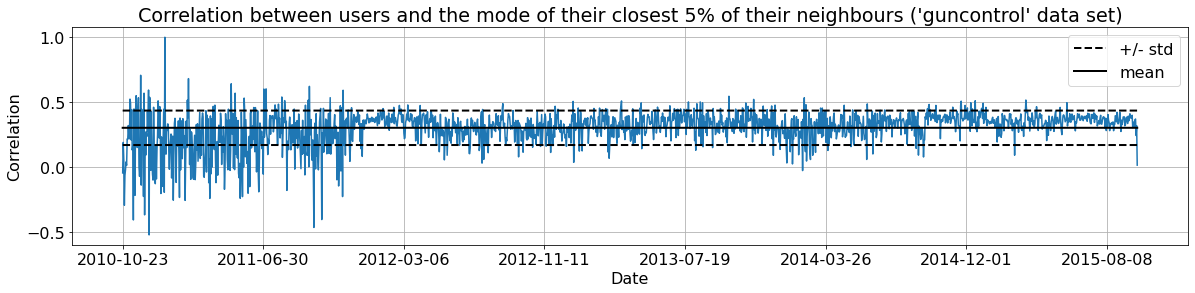

In [50]:
idx  = []
pidx = []
for i in range(0, 1805, 250): 
    idx.append(i)
    pidx.append(i + 606)

plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 16})
plt.plot(corr_agg[3])
plt.plot((np.array(corr_agg[3]).mean() + np.array(corr_agg[3]).std()) * np.ones(len(corr_agg[3])), color = 'k', linewidth = 2, linestyle = '--', label = "+/- std")
plt.plot((np.array(corr_agg[3]).mean() - np.array(corr_agg[3]).std()) * np.ones(len(corr_agg[3])), color = 'k', linewidth = 2, linestyle = '--')
plt.plot(np.array(corr_agg[3]).mean() * np.ones(len(corr_agg[3])), color = 'k', linewidth = 2, label = 'mean')

plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.title("Correlation between users and the mode of their closest 5% of their neighbours ('guncontrol' data set)")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_gc_corr_top5.png", bbox_inches = 'tight')

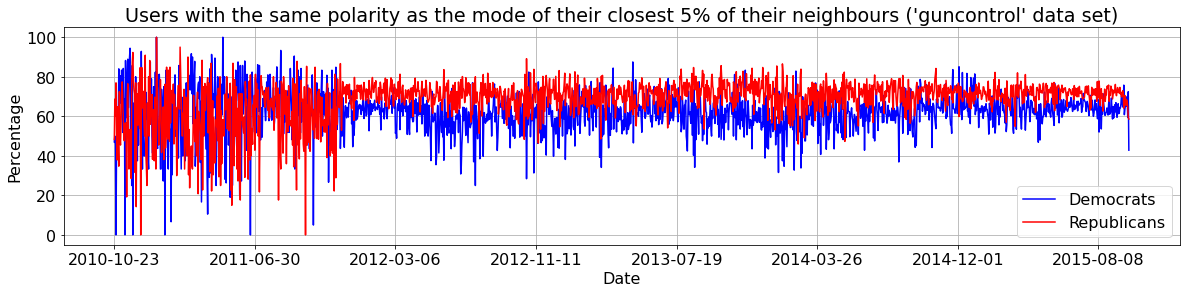

In [51]:
idx  = []
pidx = []
for i in range(0, 1805, 250): 
    idx.append(i)
    pidx.append(i + 606)

plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 16})
plt.plot(100 * np.array(perc_d_agg[3]), label = 'Democrats', color = 'b')
plt.plot(100 * np.array(perc_r_agg[3]), label = 'Republicans', color = 'r')
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Users with the same polarity as the mode of their closest 5% of their neighbours ('guncontrol' data set)")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_gc_perc_top5.png", bbox_inches = 'tight')

In [52]:
perc_neighbours = [0.01, 0.02, 0.03, 0.05, 0.1, 0.15, 0.20]

corr_agg   = np.array(corr_agg)
perc_d_agg = np.array(perc_d_agg)
perc_r_agg = np.array(perc_r_agg)

print("=" * 50)
print("For correlations:")
for i, j in zip(corr_agg, perc_neighbours):
    print("k = {}:".format(j))
    ii = i[~np.isnan(i)]
    print("mean: {}".format(ii.mean()))
    print("std:  {}".format(ii.std()))
    print("mean +/- std:  {}".format(1 - (len(ii[ii > ii.mean() + ii.std()]) + len(ii[ii < ii.mean() - ii.std()])) / len(ii)))
    print("mean +/- 2std: {}".format(1 - (len(ii[ii > ii.mean() + 2 * ii.std()]) + len(ii[ii < ii.mean() - 2 * ii.std()])) / len(ii)))
    print("mean +/- 3std: {}".format(1 - (len(ii[ii > ii.mean() + 3 * ii.std()]) + len(ii[ii < ii.mean() - 3 * ii.std()])) / len(ii)))   
    
print("=" * 50)
print("For Democratic neighbourhood percentages:")
for i, j in zip(perc_d_agg, perc_neighbours):
    print("k = {}:".format(j))
    print("mean: {}".format(i.mean()))
    print("std:  {}".format(i.std()))
    print("mean +/- std:  {}".format(1 - (len(i[i > i.mean() + i.std()]) + len(i[i < i.mean() - i.std()])) / len(i)))
    print("mean +/- 2std: {}".format(1 - (len(i[i > i.mean() + 2 * i.std()]) + len(i[i < i.mean() - 2 * i.std()])) / len(i)))
    print("mean +/- 3std: {}".format(1 - (len(i[i > i.mean() + 3 * i.std()]) + len(i[i < i.mean() - 3 * i.std()])) / len(i)))
    
print("=" * 50)
print("For Republican neighbourhood percentages:")
for i, j in zip(perc_r_agg, perc_neighbours):
    print("k = {}:".format(j))
    print("mean: {}".format(i.mean()))
    print("std:  {}".format(i.std()))
    print("mean +/- std:  {}".format(1 - (len(i[i > i.mean() + i.std()]) + len(i[i < i.mean() - i.std()])) / len(i)))
    print("mean +/- 2std: {}".format(1 - (len(i[i > i.mean() + 2 * i.std()]) + len(i[i < i.mean() - 2 * i.std()])) / len(i)))
    print("mean +/- 3std: {}".format(1 - (len(i[i > i.mean() + 3 * i.std()]) + len(i[i < i.mean() - 3 * i.std()])) / len(i)))

For correlations:
k = 0.01:
mean: 0.24658642837302852
std:  0.12801771092623349
mean +/- std:  0.76398891966759
mean +/- 2std: 0.9518005540166204
mean +/- 3std: 0.9878116343490305
k = 0.02:
mean: 0.27102836542929853
std:  0.1293380840329043
mean +/- std:  0.7717451523545706
mean +/- 2std: 0.9490304709141274
mean +/- 3std: 0.9855955678670361
k = 0.03:
mean: 0.286190231408937
std:  0.1287483331909413
mean +/- std:  0.785595567867036
mean +/- 2std: 0.9457063711911358
mean +/- 3std: 0.9839335180055402
k = 0.05:
mean: 0.3026567686640136
std:  0.1326614305755914
mean +/- std:  0.8049861495844876
mean +/- 2std: 0.9451523545706371
mean +/- 3std: 0.9811634349030471
k = 0.1:
mean: 0.325200720299408
std:  0.1298780119790856
mean +/- std:  0.8288088642659279
mean +/- 2std: 0.9445983379501385
mean +/- 3std: 0.9772853185595568
k = 0.15:
mean: 0.33002595770405746
std:  0.1328200035194082
mean +/- std:  0.8357380688124306
mean +/- 2std: 0.9489456159822419
mean +/- 3std: 0.9739178690344062
k = 0.2:
mea

In [291]:
# heatmaps for correlations between various k values
plt.figure(figsize = (6, 5))
sns.heatmap(pd.DataFrame(corr_agg).T.rename(columns = {0: "1%", 1: "2%", 2: "3%", 3: "5%", 4: "10%", 5: "15%", 6: "20%"}).corr())

plt.savefig("../plots/guncontrol_daily/corr_heatmap.png")
plt.close()

plt.figure(figsize = (6, 5))
sns.heatmap(pd.DataFrame(perc_d_agg).T.rename(columns = {0: "1%", 1: "2%", 2: "3%", 3: "5%", 4: "10%", 5: "15%", 6: "20%"}).corr())

plt.savefig("../plots/guncontrol_daily/perc_d_heatmap.png")
plt.close()

plt.figure(figsize = (6, 5))
sns.heatmap(pd.DataFrame(perc_r_agg).T.rename(columns = {0: "1%", 1: "2%", 2: "3%", 3: "5%", 4: "10%", 5: "15%", 6: "20%"}).corr())

plt.savefig("../plots/guncontrol_daily/perc_r_heatmap.png")
plt.close()

### Correlation / percentage rings

In [507]:
# get rings around the point of interest
perc_inner_ring = [0.01, 0.02, 0.03, 0.05, 0.10, 0.15, 0.20]
perc_outer_ring = [0.02, 0.03, 0.05, 0.10, 0.15, 0.20, 0.25]
corr_rings   = []
perc_d_rings = []
perc_r_rings = []
for inner, outer in zip(perc_inner_ring, perc_outer_ring):
    print("At ring {} - {}".format(inner, outer))
    
    corr   = []
    perc_d = []
    perc_r = []
    for j in range(606, len(ordered_pickle_files_)):

        print("Running for embedding {}/{}".format(j, len(ordered_pickle_files_)))

        # read the embeddings
        with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j]), "rb") as pickle_file:
            _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)    

        # compute the distance matrix
        distance = squareform(pdist(xy_pairs[nonzero_idx[j]]))
        distance = distance + distance.max() * 100 * np.identity(len(distance))

        # determine the mode polarity of the closest k nodes
        polarity_daily = []
        polarity_d     = []
        polarity_r     = []
        
        # get k
        k_inner = int(np.round(inner * len(nonzero_idx[j])))
        k_outer = int(np.round(outer * len(nonzero_idx[j])))
        if k_inner == 0:
            k_inner = 1
        if k_outer == 0:
            k_outer = k_inner + 1
        if k_outer == k_inner:
            k_outer = k_inner + 1
        for i in range(0, len(distance)):
            p = mode(polarities.loc[nonzero_idx[j][distance[i].argsort()[k_inner:k_outer]], 'Class'])[0][0]
            polarity_daily.append(p)

            if polarities.loc[nonzero_idx[j][i], 'Class'] == 0.0:
                polarity_d.append(p)

            else:
                polarity_r.append(p)

        # compute the correlation for the active users; 
        _corr, _ = pearsonr(polarities.loc[nonzero_idx[j], 'Class'], polarity_daily)
        corr.append(_corr)

        # get the percentage of nodes that are mostly surrounded by same-minded nodes
        perc_d.append(1 - np.sum(polarity_d) / len(polarity_d))
        perc_r.append(np.sum(polarity_r) / len(polarity_r))
        
    corr_rings.append(corr)
    perc_d_rings.append(perc_d)
    perc_r_rings.append(perc_r)

At ring 0.01 - 0.02
Running for embedding 606/2411
Running for embedding 607/2411
Running for embedding 608/2411
Running for embedding 609/2411
Running for embedding 610/2411
Running for embedding 611/2411
Running for embedding 612/2411
Running for embedding 613/2411
Running for embedding 614/2411
Running for embedding 615/2411
Running for embedding 616/2411
Running for embedding 617/2411
Running for embedding 618/2411
Running for embedding 619/2411
Running for embedding 620/2411
Running for embedding 621/2411
Running for embedding 622/2411
Running for embedding 623/2411
Running for embedding 624/2411
Running for embedding 625/2411
Running for embedding 626/2411
Running for embedding 627/2411
Running for embedding 628/2411
Running for embedding 629/2411
Running for embedding 630/2411
Running for embedding 631/2411
Running for embedding 632/2411
Running for embedding 633/2411
Running for embedding 634/2411
Running for embedding 635/2411
Running for embedding 636/2411
Running for embeddi

Running for embedding 870/2411
Running for embedding 871/2411
Running for embedding 872/2411
Running for embedding 873/2411
Running for embedding 874/2411
Running for embedding 875/2411
Running for embedding 876/2411
Running for embedding 877/2411
Running for embedding 878/2411
Running for embedding 879/2411
Running for embedding 880/2411
Running for embedding 881/2411
Running for embedding 882/2411
Running for embedding 883/2411
Running for embedding 884/2411
Running for embedding 885/2411
Running for embedding 886/2411
Running for embedding 887/2411
Running for embedding 888/2411
Running for embedding 889/2411
Running for embedding 890/2411
Running for embedding 891/2411
Running for embedding 892/2411
Running for embedding 893/2411
Running for embedding 894/2411
Running for embedding 895/2411
Running for embedding 896/2411
Running for embedding 897/2411
Running for embedding 898/2411
Running for embedding 899/2411
Running for embedding 900/2411
Running for embedding 901/2411
Running 

Running for embedding 1131/2411
Running for embedding 1132/2411
Running for embedding 1133/2411
Running for embedding 1134/2411
Running for embedding 1135/2411
Running for embedding 1136/2411
Running for embedding 1137/2411
Running for embedding 1138/2411
Running for embedding 1139/2411
Running for embedding 1140/2411
Running for embedding 1141/2411
Running for embedding 1142/2411
Running for embedding 1143/2411
Running for embedding 1144/2411
Running for embedding 1145/2411
Running for embedding 1146/2411
Running for embedding 1147/2411
Running for embedding 1148/2411
Running for embedding 1149/2411
Running for embedding 1150/2411
Running for embedding 1151/2411
Running for embedding 1152/2411
Running for embedding 1153/2411
Running for embedding 1154/2411
Running for embedding 1155/2411
Running for embedding 1156/2411
Running for embedding 1157/2411
Running for embedding 1158/2411
Running for embedding 1159/2411
Running for embedding 1160/2411
Running for embedding 1161/2411
Running 

Running for embedding 1389/2411
Running for embedding 1390/2411
Running for embedding 1391/2411
Running for embedding 1392/2411
Running for embedding 1393/2411
Running for embedding 1394/2411
Running for embedding 1395/2411
Running for embedding 1396/2411
Running for embedding 1397/2411
Running for embedding 1398/2411
Running for embedding 1399/2411
Running for embedding 1400/2411
Running for embedding 1401/2411
Running for embedding 1402/2411
Running for embedding 1403/2411
Running for embedding 1404/2411
Running for embedding 1405/2411
Running for embedding 1406/2411
Running for embedding 1407/2411
Running for embedding 1408/2411
Running for embedding 1409/2411
Running for embedding 1410/2411
Running for embedding 1411/2411
Running for embedding 1412/2411
Running for embedding 1413/2411
Running for embedding 1414/2411
Running for embedding 1415/2411
Running for embedding 1416/2411
Running for embedding 1417/2411
Running for embedding 1418/2411
Running for embedding 1419/2411
Running 

Running for embedding 1646/2411
Running for embedding 1647/2411
Running for embedding 1648/2411
Running for embedding 1649/2411
Running for embedding 1650/2411
Running for embedding 1651/2411
Running for embedding 1652/2411
Running for embedding 1653/2411
Running for embedding 1654/2411
Running for embedding 1655/2411
Running for embedding 1656/2411
Running for embedding 1657/2411
Running for embedding 1658/2411
Running for embedding 1659/2411
Running for embedding 1660/2411
Running for embedding 1661/2411
Running for embedding 1662/2411
Running for embedding 1663/2411
Running for embedding 1664/2411
Running for embedding 1665/2411
Running for embedding 1666/2411
Running for embedding 1667/2411
Running for embedding 1668/2411
Running for embedding 1669/2411
Running for embedding 1670/2411
Running for embedding 1671/2411
Running for embedding 1672/2411
Running for embedding 1673/2411
Running for embedding 1674/2411
Running for embedding 1675/2411
Running for embedding 1676/2411
Running 

Running for embedding 1904/2411
Running for embedding 1905/2411
Running for embedding 1906/2411
Running for embedding 1907/2411
Running for embedding 1908/2411
Running for embedding 1909/2411
Running for embedding 1910/2411
Running for embedding 1911/2411
Running for embedding 1912/2411
Running for embedding 1913/2411
Running for embedding 1914/2411
Running for embedding 1915/2411
Running for embedding 1916/2411
Running for embedding 1917/2411
Running for embedding 1918/2411
Running for embedding 1919/2411
Running for embedding 1920/2411
Running for embedding 1921/2411
Running for embedding 1922/2411
Running for embedding 1923/2411
Running for embedding 1924/2411
Running for embedding 1925/2411
Running for embedding 1926/2411
Running for embedding 1927/2411
Running for embedding 1928/2411
Running for embedding 1929/2411
Running for embedding 1930/2411
Running for embedding 1931/2411
Running for embedding 1932/2411
Running for embedding 1933/2411
Running for embedding 1934/2411
Running 

Running for embedding 2162/2411
Running for embedding 2163/2411
Running for embedding 2164/2411
Running for embedding 2165/2411
Running for embedding 2166/2411
Running for embedding 2167/2411
Running for embedding 2168/2411
Running for embedding 2169/2411
Running for embedding 2170/2411
Running for embedding 2171/2411
Running for embedding 2172/2411
Running for embedding 2173/2411
Running for embedding 2174/2411
Running for embedding 2175/2411
Running for embedding 2176/2411
Running for embedding 2177/2411
Running for embedding 2178/2411
Running for embedding 2179/2411
Running for embedding 2180/2411
Running for embedding 2181/2411
Running for embedding 2182/2411
Running for embedding 2183/2411
Running for embedding 2184/2411
Running for embedding 2185/2411
Running for embedding 2186/2411
Running for embedding 2187/2411
Running for embedding 2188/2411
Running for embedding 2189/2411
Running for embedding 2190/2411
Running for embedding 2191/2411
Running for embedding 2192/2411
Running 

Running for embedding 614/2411
Running for embedding 615/2411
Running for embedding 616/2411
Running for embedding 617/2411
Running for embedding 618/2411
Running for embedding 619/2411
Running for embedding 620/2411
Running for embedding 621/2411
Running for embedding 622/2411
Running for embedding 623/2411
Running for embedding 624/2411
Running for embedding 625/2411
Running for embedding 626/2411
Running for embedding 627/2411
Running for embedding 628/2411
Running for embedding 629/2411
Running for embedding 630/2411
Running for embedding 631/2411
Running for embedding 632/2411
Running for embedding 633/2411
Running for embedding 634/2411
Running for embedding 635/2411
Running for embedding 636/2411
Running for embedding 637/2411
Running for embedding 638/2411
Running for embedding 639/2411
Running for embedding 640/2411
Running for embedding 641/2411
Running for embedding 642/2411
Running for embedding 643/2411
Running for embedding 644/2411
Running for embedding 645/2411
Running 

Running for embedding 879/2411
Running for embedding 880/2411
Running for embedding 881/2411
Running for embedding 882/2411
Running for embedding 883/2411
Running for embedding 884/2411
Running for embedding 885/2411
Running for embedding 886/2411
Running for embedding 887/2411
Running for embedding 888/2411
Running for embedding 889/2411
Running for embedding 890/2411
Running for embedding 891/2411
Running for embedding 892/2411
Running for embedding 893/2411
Running for embedding 894/2411
Running for embedding 895/2411
Running for embedding 896/2411
Running for embedding 897/2411
Running for embedding 898/2411
Running for embedding 899/2411
Running for embedding 900/2411
Running for embedding 901/2411
Running for embedding 902/2411
Running for embedding 903/2411
Running for embedding 904/2411
Running for embedding 905/2411
Running for embedding 906/2411
Running for embedding 907/2411
Running for embedding 908/2411
Running for embedding 909/2411
Running for embedding 910/2411
Running 

Running for embedding 1139/2411
Running for embedding 1140/2411
Running for embedding 1141/2411
Running for embedding 1142/2411
Running for embedding 1143/2411
Running for embedding 1144/2411
Running for embedding 1145/2411
Running for embedding 1146/2411
Running for embedding 1147/2411
Running for embedding 1148/2411
Running for embedding 1149/2411
Running for embedding 1150/2411
Running for embedding 1151/2411
Running for embedding 1152/2411
Running for embedding 1153/2411
Running for embedding 1154/2411
Running for embedding 1155/2411
Running for embedding 1156/2411
Running for embedding 1157/2411
Running for embedding 1158/2411
Running for embedding 1159/2411
Running for embedding 1160/2411
Running for embedding 1161/2411
Running for embedding 1162/2411
Running for embedding 1163/2411
Running for embedding 1164/2411
Running for embedding 1165/2411
Running for embedding 1166/2411
Running for embedding 1167/2411
Running for embedding 1168/2411
Running for embedding 1169/2411
Running 

Running for embedding 1396/2411
Running for embedding 1397/2411
Running for embedding 1398/2411
Running for embedding 1399/2411
Running for embedding 1400/2411
Running for embedding 1401/2411
Running for embedding 1402/2411
Running for embedding 1403/2411
Running for embedding 1404/2411
Running for embedding 1405/2411
Running for embedding 1406/2411
Running for embedding 1407/2411
Running for embedding 1408/2411
Running for embedding 1409/2411
Running for embedding 1410/2411
Running for embedding 1411/2411
Running for embedding 1412/2411
Running for embedding 1413/2411
Running for embedding 1414/2411
Running for embedding 1415/2411
Running for embedding 1416/2411
Running for embedding 1417/2411
Running for embedding 1418/2411
Running for embedding 1419/2411
Running for embedding 1420/2411
Running for embedding 1421/2411
Running for embedding 1422/2411
Running for embedding 1423/2411
Running for embedding 1424/2411
Running for embedding 1425/2411
Running for embedding 1426/2411
Running 

Running for embedding 1654/2411
Running for embedding 1655/2411
Running for embedding 1656/2411
Running for embedding 1657/2411
Running for embedding 1658/2411
Running for embedding 1659/2411
Running for embedding 1660/2411
Running for embedding 1661/2411
Running for embedding 1662/2411
Running for embedding 1663/2411
Running for embedding 1664/2411
Running for embedding 1665/2411
Running for embedding 1666/2411
Running for embedding 1667/2411
Running for embedding 1668/2411
Running for embedding 1669/2411
Running for embedding 1670/2411
Running for embedding 1671/2411
Running for embedding 1672/2411
Running for embedding 1673/2411
Running for embedding 1674/2411
Running for embedding 1675/2411
Running for embedding 1676/2411
Running for embedding 1677/2411
Running for embedding 1678/2411
Running for embedding 1679/2411
Running for embedding 1680/2411
Running for embedding 1681/2411
Running for embedding 1682/2411
Running for embedding 1683/2411
Running for embedding 1684/2411
Running 

Running for embedding 1911/2411
Running for embedding 1912/2411
Running for embedding 1913/2411
Running for embedding 1914/2411
Running for embedding 1915/2411
Running for embedding 1916/2411
Running for embedding 1917/2411
Running for embedding 1918/2411
Running for embedding 1919/2411
Running for embedding 1920/2411
Running for embedding 1921/2411
Running for embedding 1922/2411
Running for embedding 1923/2411
Running for embedding 1924/2411
Running for embedding 1925/2411
Running for embedding 1926/2411
Running for embedding 1927/2411
Running for embedding 1928/2411
Running for embedding 1929/2411
Running for embedding 1930/2411
Running for embedding 1931/2411
Running for embedding 1932/2411
Running for embedding 1933/2411
Running for embedding 1934/2411
Running for embedding 1935/2411
Running for embedding 1936/2411
Running for embedding 1937/2411
Running for embedding 1938/2411
Running for embedding 1939/2411
Running for embedding 1940/2411
Running for embedding 1941/2411
Running 

Running for embedding 2168/2411
Running for embedding 2169/2411
Running for embedding 2170/2411
Running for embedding 2171/2411
Running for embedding 2172/2411
Running for embedding 2173/2411
Running for embedding 2174/2411
Running for embedding 2175/2411
Running for embedding 2176/2411
Running for embedding 2177/2411
Running for embedding 2178/2411
Running for embedding 2179/2411
Running for embedding 2180/2411
Running for embedding 2181/2411
Running for embedding 2182/2411
Running for embedding 2183/2411
Running for embedding 2184/2411
Running for embedding 2185/2411
Running for embedding 2186/2411
Running for embedding 2187/2411
Running for embedding 2188/2411
Running for embedding 2189/2411
Running for embedding 2190/2411
Running for embedding 2191/2411
Running for embedding 2192/2411
Running for embedding 2193/2411
Running for embedding 2194/2411
Running for embedding 2195/2411
Running for embedding 2196/2411
Running for embedding 2197/2411
Running for embedding 2198/2411
Running 

Running for embedding 620/2411
Running for embedding 621/2411
Running for embedding 622/2411
Running for embedding 623/2411
Running for embedding 624/2411
Running for embedding 625/2411
Running for embedding 626/2411
Running for embedding 627/2411
Running for embedding 628/2411
Running for embedding 629/2411
Running for embedding 630/2411
Running for embedding 631/2411
Running for embedding 632/2411
Running for embedding 633/2411
Running for embedding 634/2411
Running for embedding 635/2411
Running for embedding 636/2411
Running for embedding 637/2411
Running for embedding 638/2411
Running for embedding 639/2411
Running for embedding 640/2411
Running for embedding 641/2411
Running for embedding 642/2411
Running for embedding 643/2411
Running for embedding 644/2411
Running for embedding 645/2411
Running for embedding 646/2411
Running for embedding 647/2411
Running for embedding 648/2411
Running for embedding 649/2411
Running for embedding 650/2411
Running for embedding 651/2411
Running 

Running for embedding 886/2411
Running for embedding 887/2411
Running for embedding 888/2411
Running for embedding 889/2411
Running for embedding 890/2411
Running for embedding 891/2411
Running for embedding 892/2411
Running for embedding 893/2411
Running for embedding 894/2411
Running for embedding 895/2411
Running for embedding 896/2411
Running for embedding 897/2411
Running for embedding 898/2411
Running for embedding 899/2411
Running for embedding 900/2411
Running for embedding 901/2411
Running for embedding 902/2411
Running for embedding 903/2411
Running for embedding 904/2411
Running for embedding 905/2411
Running for embedding 906/2411
Running for embedding 907/2411
Running for embedding 908/2411
Running for embedding 909/2411
Running for embedding 910/2411
Running for embedding 911/2411
Running for embedding 912/2411
Running for embedding 913/2411
Running for embedding 914/2411
Running for embedding 915/2411
Running for embedding 916/2411
Running for embedding 917/2411
Running 

Running for embedding 1146/2411
Running for embedding 1147/2411
Running for embedding 1148/2411
Running for embedding 1149/2411
Running for embedding 1150/2411
Running for embedding 1151/2411
Running for embedding 1152/2411
Running for embedding 1153/2411
Running for embedding 1154/2411
Running for embedding 1155/2411
Running for embedding 1156/2411
Running for embedding 1157/2411
Running for embedding 1158/2411
Running for embedding 1159/2411
Running for embedding 1160/2411
Running for embedding 1161/2411
Running for embedding 1162/2411
Running for embedding 1163/2411
Running for embedding 1164/2411
Running for embedding 1165/2411
Running for embedding 1166/2411
Running for embedding 1167/2411
Running for embedding 1168/2411
Running for embedding 1169/2411
Running for embedding 1170/2411
Running for embedding 1171/2411
Running for embedding 1172/2411
Running for embedding 1173/2411
Running for embedding 1174/2411
Running for embedding 1175/2411
Running for embedding 1176/2411
Running 

Running for embedding 1403/2411
Running for embedding 1404/2411
Running for embedding 1405/2411
Running for embedding 1406/2411
Running for embedding 1407/2411
Running for embedding 1408/2411
Running for embedding 1409/2411
Running for embedding 1410/2411
Running for embedding 1411/2411
Running for embedding 1412/2411
Running for embedding 1413/2411
Running for embedding 1414/2411
Running for embedding 1415/2411
Running for embedding 1416/2411
Running for embedding 1417/2411
Running for embedding 1418/2411
Running for embedding 1419/2411
Running for embedding 1420/2411
Running for embedding 1421/2411
Running for embedding 1422/2411
Running for embedding 1423/2411
Running for embedding 1424/2411
Running for embedding 1425/2411
Running for embedding 1426/2411
Running for embedding 1427/2411
Running for embedding 1428/2411
Running for embedding 1429/2411
Running for embedding 1430/2411
Running for embedding 1431/2411
Running for embedding 1432/2411
Running for embedding 1433/2411
Running 

Running for embedding 1661/2411
Running for embedding 1662/2411
Running for embedding 1663/2411
Running for embedding 1664/2411
Running for embedding 1665/2411
Running for embedding 1666/2411
Running for embedding 1667/2411
Running for embedding 1668/2411
Running for embedding 1669/2411
Running for embedding 1670/2411
Running for embedding 1671/2411
Running for embedding 1672/2411
Running for embedding 1673/2411
Running for embedding 1674/2411
Running for embedding 1675/2411
Running for embedding 1676/2411
Running for embedding 1677/2411
Running for embedding 1678/2411
Running for embedding 1679/2411
Running for embedding 1680/2411
Running for embedding 1681/2411
Running for embedding 1682/2411
Running for embedding 1683/2411
Running for embedding 1684/2411
Running for embedding 1685/2411
Running for embedding 1686/2411
Running for embedding 1687/2411
Running for embedding 1688/2411
Running for embedding 1689/2411
Running for embedding 1690/2411
Running for embedding 1691/2411
Running 

Running for embedding 1919/2411
Running for embedding 1920/2411
Running for embedding 1921/2411
Running for embedding 1922/2411
Running for embedding 1923/2411
Running for embedding 1924/2411
Running for embedding 1925/2411
Running for embedding 1926/2411
Running for embedding 1927/2411
Running for embedding 1928/2411
Running for embedding 1929/2411
Running for embedding 1930/2411
Running for embedding 1931/2411
Running for embedding 1932/2411
Running for embedding 1933/2411
Running for embedding 1934/2411
Running for embedding 1935/2411
Running for embedding 1936/2411
Running for embedding 1937/2411
Running for embedding 1938/2411
Running for embedding 1939/2411
Running for embedding 1940/2411
Running for embedding 1941/2411
Running for embedding 1942/2411
Running for embedding 1943/2411
Running for embedding 1944/2411
Running for embedding 1945/2411
Running for embedding 1946/2411
Running for embedding 1947/2411
Running for embedding 1948/2411
Running for embedding 1949/2411
Running 

Running for embedding 2176/2411
Running for embedding 2177/2411
Running for embedding 2178/2411
Running for embedding 2179/2411
Running for embedding 2180/2411
Running for embedding 2181/2411
Running for embedding 2182/2411
Running for embedding 2183/2411
Running for embedding 2184/2411
Running for embedding 2185/2411
Running for embedding 2186/2411
Running for embedding 2187/2411
Running for embedding 2188/2411
Running for embedding 2189/2411
Running for embedding 2190/2411
Running for embedding 2191/2411
Running for embedding 2192/2411
Running for embedding 2193/2411
Running for embedding 2194/2411
Running for embedding 2195/2411
Running for embedding 2196/2411
Running for embedding 2197/2411
Running for embedding 2198/2411
Running for embedding 2199/2411
Running for embedding 2200/2411
Running for embedding 2201/2411
Running for embedding 2202/2411
Running for embedding 2203/2411
Running for embedding 2204/2411
Running for embedding 2205/2411
Running for embedding 2206/2411
Running 

Running for embedding 631/2411
Running for embedding 632/2411
Running for embedding 633/2411
Running for embedding 634/2411
Running for embedding 635/2411
Running for embedding 636/2411
Running for embedding 637/2411
Running for embedding 638/2411
Running for embedding 639/2411
Running for embedding 640/2411
Running for embedding 641/2411
Running for embedding 642/2411
Running for embedding 643/2411
Running for embedding 644/2411
Running for embedding 645/2411
Running for embedding 646/2411
Running for embedding 647/2411
Running for embedding 648/2411
Running for embedding 649/2411
Running for embedding 650/2411
Running for embedding 651/2411
Running for embedding 652/2411
Running for embedding 653/2411
Running for embedding 654/2411
Running for embedding 655/2411
Running for embedding 656/2411
Running for embedding 657/2411
Running for embedding 658/2411
Running for embedding 659/2411
Running for embedding 660/2411
Running for embedding 661/2411
Running for embedding 662/2411
Running 

Running for embedding 901/2411
Running for embedding 902/2411
Running for embedding 903/2411
Running for embedding 904/2411
Running for embedding 905/2411
Running for embedding 906/2411
Running for embedding 907/2411
Running for embedding 908/2411
Running for embedding 909/2411
Running for embedding 910/2411
Running for embedding 911/2411
Running for embedding 912/2411
Running for embedding 913/2411
Running for embedding 914/2411
Running for embedding 915/2411
Running for embedding 916/2411
Running for embedding 917/2411
Running for embedding 918/2411
Running for embedding 919/2411
Running for embedding 920/2411
Running for embedding 921/2411
Running for embedding 922/2411
Running for embedding 923/2411
Running for embedding 924/2411
Running for embedding 925/2411
Running for embedding 926/2411
Running for embedding 927/2411
Running for embedding 928/2411
Running for embedding 929/2411
Running for embedding 930/2411
Running for embedding 931/2411
Running for embedding 932/2411
Running 

Running for embedding 1161/2411
Running for embedding 1162/2411
Running for embedding 1163/2411
Running for embedding 1164/2411
Running for embedding 1165/2411
Running for embedding 1166/2411
Running for embedding 1167/2411
Running for embedding 1168/2411
Running for embedding 1169/2411
Running for embedding 1170/2411
Running for embedding 1171/2411
Running for embedding 1172/2411
Running for embedding 1173/2411
Running for embedding 1174/2411
Running for embedding 1175/2411
Running for embedding 1176/2411
Running for embedding 1177/2411
Running for embedding 1178/2411
Running for embedding 1179/2411
Running for embedding 1180/2411
Running for embedding 1181/2411
Running for embedding 1182/2411
Running for embedding 1183/2411
Running for embedding 1184/2411
Running for embedding 1185/2411
Running for embedding 1186/2411
Running for embedding 1187/2411
Running for embedding 1188/2411
Running for embedding 1189/2411
Running for embedding 1190/2411
Running for embedding 1191/2411
Running 

Running for embedding 1420/2411
Running for embedding 1421/2411
Running for embedding 1422/2411
Running for embedding 1423/2411
Running for embedding 1424/2411
Running for embedding 1425/2411
Running for embedding 1426/2411
Running for embedding 1427/2411
Running for embedding 1428/2411
Running for embedding 1429/2411
Running for embedding 1430/2411
Running for embedding 1431/2411
Running for embedding 1432/2411
Running for embedding 1433/2411
Running for embedding 1434/2411
Running for embedding 1435/2411
Running for embedding 1436/2411
Running for embedding 1437/2411
Running for embedding 1438/2411
Running for embedding 1439/2411
Running for embedding 1440/2411
Running for embedding 1441/2411
Running for embedding 1442/2411
Running for embedding 1443/2411
Running for embedding 1444/2411
Running for embedding 1445/2411
Running for embedding 1446/2411
Running for embedding 1447/2411
Running for embedding 1448/2411
Running for embedding 1449/2411
Running for embedding 1450/2411
Running 

Running for embedding 1677/2411
Running for embedding 1678/2411
Running for embedding 1679/2411
Running for embedding 1680/2411
Running for embedding 1681/2411
Running for embedding 1682/2411
Running for embedding 1683/2411
Running for embedding 1684/2411
Running for embedding 1685/2411
Running for embedding 1686/2411
Running for embedding 1687/2411
Running for embedding 1688/2411
Running for embedding 1689/2411
Running for embedding 1690/2411
Running for embedding 1691/2411
Running for embedding 1692/2411
Running for embedding 1693/2411
Running for embedding 1694/2411
Running for embedding 1695/2411
Running for embedding 1696/2411
Running for embedding 1697/2411
Running for embedding 1698/2411
Running for embedding 1699/2411
Running for embedding 1700/2411
Running for embedding 1701/2411
Running for embedding 1702/2411
Running for embedding 1703/2411
Running for embedding 1704/2411
Running for embedding 1705/2411
Running for embedding 1706/2411
Running for embedding 1707/2411
Running 

Running for embedding 1934/2411
Running for embedding 1935/2411
Running for embedding 1936/2411
Running for embedding 1937/2411
Running for embedding 1938/2411
Running for embedding 1939/2411
Running for embedding 1940/2411
Running for embedding 1941/2411
Running for embedding 1942/2411
Running for embedding 1943/2411
Running for embedding 1944/2411
Running for embedding 1945/2411
Running for embedding 1946/2411
Running for embedding 1947/2411
Running for embedding 1948/2411
Running for embedding 1949/2411
Running for embedding 1950/2411
Running for embedding 1951/2411
Running for embedding 1952/2411
Running for embedding 1953/2411
Running for embedding 1954/2411
Running for embedding 1955/2411
Running for embedding 1956/2411
Running for embedding 1957/2411
Running for embedding 1958/2411
Running for embedding 1959/2411
Running for embedding 1960/2411
Running for embedding 1961/2411
Running for embedding 1962/2411
Running for embedding 1963/2411
Running for embedding 1964/2411
Running 

Running for embedding 2191/2411
Running for embedding 2192/2411
Running for embedding 2193/2411
Running for embedding 2194/2411
Running for embedding 2195/2411
Running for embedding 2196/2411
Running for embedding 2197/2411
Running for embedding 2198/2411
Running for embedding 2199/2411
Running for embedding 2200/2411
Running for embedding 2201/2411
Running for embedding 2202/2411
Running for embedding 2203/2411
Running for embedding 2204/2411
Running for embedding 2205/2411
Running for embedding 2206/2411
Running for embedding 2207/2411
Running for embedding 2208/2411
Running for embedding 2209/2411
Running for embedding 2210/2411
Running for embedding 2211/2411
Running for embedding 2212/2411
Running for embedding 2213/2411
Running for embedding 2214/2411
Running for embedding 2215/2411
Running for embedding 2216/2411
Running for embedding 2217/2411
Running for embedding 2218/2411
Running for embedding 2219/2411
Running for embedding 2220/2411
Running for embedding 2221/2411
Running 

Running for embedding 643/2411
Running for embedding 644/2411
Running for embedding 645/2411
Running for embedding 646/2411
Running for embedding 647/2411
Running for embedding 648/2411
Running for embedding 649/2411
Running for embedding 650/2411
Running for embedding 651/2411
Running for embedding 652/2411
Running for embedding 653/2411
Running for embedding 654/2411
Running for embedding 655/2411
Running for embedding 656/2411
Running for embedding 657/2411
Running for embedding 658/2411
Running for embedding 659/2411
Running for embedding 660/2411
Running for embedding 661/2411
Running for embedding 662/2411
Running for embedding 663/2411
Running for embedding 664/2411
Running for embedding 665/2411
Running for embedding 666/2411
Running for embedding 667/2411
Running for embedding 668/2411
Running for embedding 669/2411
Running for embedding 670/2411
Running for embedding 671/2411
Running for embedding 672/2411
Running for embedding 673/2411
Running for embedding 674/2411
Running 

Running for embedding 908/2411
Running for embedding 909/2411
Running for embedding 910/2411
Running for embedding 911/2411
Running for embedding 912/2411
Running for embedding 913/2411
Running for embedding 914/2411
Running for embedding 915/2411
Running for embedding 916/2411
Running for embedding 917/2411
Running for embedding 918/2411
Running for embedding 919/2411
Running for embedding 920/2411
Running for embedding 921/2411
Running for embedding 922/2411
Running for embedding 923/2411
Running for embedding 924/2411
Running for embedding 925/2411
Running for embedding 926/2411
Running for embedding 927/2411
Running for embedding 928/2411
Running for embedding 929/2411
Running for embedding 930/2411
Running for embedding 931/2411
Running for embedding 932/2411
Running for embedding 933/2411
Running for embedding 934/2411
Running for embedding 935/2411
Running for embedding 936/2411
Running for embedding 937/2411
Running for embedding 938/2411
Running for embedding 939/2411
Running 

Running for embedding 1168/2411
Running for embedding 1169/2411
Running for embedding 1170/2411
Running for embedding 1171/2411
Running for embedding 1172/2411
Running for embedding 1173/2411
Running for embedding 1174/2411
Running for embedding 1175/2411
Running for embedding 1176/2411
Running for embedding 1177/2411
Running for embedding 1178/2411
Running for embedding 1179/2411
Running for embedding 1180/2411
Running for embedding 1181/2411
Running for embedding 1182/2411
Running for embedding 1183/2411
Running for embedding 1184/2411
Running for embedding 1185/2411
Running for embedding 1186/2411
Running for embedding 1187/2411
Running for embedding 1188/2411
Running for embedding 1189/2411
Running for embedding 1190/2411
Running for embedding 1191/2411
Running for embedding 1192/2411
Running for embedding 1193/2411
Running for embedding 1194/2411
Running for embedding 1195/2411
Running for embedding 1196/2411
Running for embedding 1197/2411
Running for embedding 1198/2411
Running 

Running for embedding 1425/2411
Running for embedding 1426/2411
Running for embedding 1427/2411
Running for embedding 1428/2411
Running for embedding 1429/2411
Running for embedding 1430/2411
Running for embedding 1431/2411
Running for embedding 1432/2411
Running for embedding 1433/2411
Running for embedding 1434/2411
Running for embedding 1435/2411
Running for embedding 1436/2411
Running for embedding 1437/2411
Running for embedding 1438/2411
Running for embedding 1439/2411
Running for embedding 1440/2411
Running for embedding 1441/2411
Running for embedding 1442/2411
Running for embedding 1443/2411
Running for embedding 1444/2411
Running for embedding 1445/2411
Running for embedding 1446/2411
Running for embedding 1447/2411
Running for embedding 1448/2411
Running for embedding 1449/2411
Running for embedding 1450/2411
Running for embedding 1451/2411
Running for embedding 1452/2411
Running for embedding 1453/2411
Running for embedding 1454/2411
Running for embedding 1455/2411
Running 

Running for embedding 1684/2411
Running for embedding 1685/2411
Running for embedding 1686/2411
Running for embedding 1687/2411
Running for embedding 1688/2411
Running for embedding 1689/2411
Running for embedding 1690/2411
Running for embedding 1691/2411
Running for embedding 1692/2411
Running for embedding 1693/2411
Running for embedding 1694/2411
Running for embedding 1695/2411
Running for embedding 1696/2411
Running for embedding 1697/2411
Running for embedding 1698/2411
Running for embedding 1699/2411
Running for embedding 1700/2411
Running for embedding 1701/2411
Running for embedding 1702/2411
Running for embedding 1703/2411
Running for embedding 1704/2411
Running for embedding 1705/2411
Running for embedding 1706/2411
Running for embedding 1707/2411
Running for embedding 1708/2411
Running for embedding 1709/2411
Running for embedding 1710/2411
Running for embedding 1711/2411
Running for embedding 1712/2411
Running for embedding 1713/2411
Running for embedding 1714/2411
Running 

Running for embedding 1942/2411
Running for embedding 1943/2411
Running for embedding 1944/2411
Running for embedding 1945/2411
Running for embedding 1946/2411
Running for embedding 1947/2411
Running for embedding 1948/2411
Running for embedding 1949/2411
Running for embedding 1950/2411
Running for embedding 1951/2411
Running for embedding 1952/2411
Running for embedding 1953/2411
Running for embedding 1954/2411
Running for embedding 1955/2411
Running for embedding 1956/2411
Running for embedding 1957/2411
Running for embedding 1958/2411
Running for embedding 1959/2411
Running for embedding 1960/2411
Running for embedding 1961/2411
Running for embedding 1962/2411
Running for embedding 1963/2411
Running for embedding 1964/2411
Running for embedding 1965/2411
Running for embedding 1966/2411
Running for embedding 1967/2411
Running for embedding 1968/2411
Running for embedding 1969/2411
Running for embedding 1970/2411
Running for embedding 1971/2411
Running for embedding 1972/2411
Running 

Running for embedding 2199/2411
Running for embedding 2200/2411
Running for embedding 2201/2411
Running for embedding 2202/2411
Running for embedding 2203/2411
Running for embedding 2204/2411
Running for embedding 2205/2411
Running for embedding 2206/2411
Running for embedding 2207/2411
Running for embedding 2208/2411
Running for embedding 2209/2411
Running for embedding 2210/2411
Running for embedding 2211/2411
Running for embedding 2212/2411
Running for embedding 2213/2411
Running for embedding 2214/2411
Running for embedding 2215/2411
Running for embedding 2216/2411
Running for embedding 2217/2411
Running for embedding 2218/2411
Running for embedding 2219/2411
Running for embedding 2220/2411
Running for embedding 2221/2411
Running for embedding 2222/2411
Running for embedding 2223/2411
Running for embedding 2224/2411
Running for embedding 2225/2411
Running for embedding 2226/2411
Running for embedding 2227/2411
Running for embedding 2228/2411
Running for embedding 2229/2411
Running 

Running for embedding 655/2411
Running for embedding 656/2411
Running for embedding 657/2411
Running for embedding 658/2411
Running for embedding 659/2411
Running for embedding 660/2411
Running for embedding 661/2411
Running for embedding 662/2411
Running for embedding 663/2411
Running for embedding 664/2411
Running for embedding 665/2411
Running for embedding 666/2411
Running for embedding 667/2411
Running for embedding 668/2411
Running for embedding 669/2411
Running for embedding 670/2411
Running for embedding 671/2411
Running for embedding 672/2411
Running for embedding 673/2411
Running for embedding 674/2411
Running for embedding 675/2411
Running for embedding 676/2411
Running for embedding 677/2411
Running for embedding 678/2411
Running for embedding 679/2411
Running for embedding 680/2411
Running for embedding 681/2411
Running for embedding 682/2411
Running for embedding 683/2411
Running for embedding 684/2411
Running for embedding 685/2411
Running for embedding 686/2411
Running 

/home/adc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Running for embedding 904/2411
Running for embedding 905/2411
Running for embedding 906/2411
Running for embedding 907/2411
Running for embedding 908/2411
Running for embedding 909/2411
Running for embedding 910/2411
Running for embedding 911/2411
Running for embedding 912/2411
Running for embedding 913/2411
Running for embedding 914/2411
Running for embedding 915/2411
Running for embedding 916/2411
Running for embedding 917/2411
Running for embedding 918/2411
Running for embedding 919/2411
Running for embedding 920/2411
Running for embedding 921/2411
Running for embedding 922/2411
Running for embedding 923/2411
Running for embedding 924/2411
Running for embedding 925/2411
Running for embedding 926/2411
Running for embedding 927/2411
Running for embedding 928/2411
Running for embedding 929/2411
Running for embedding 930/2411
Running for embedding 931/2411
Running for embedding 932/2411
Running for embedding 933/2411
Running for embedding 934/2411
Running for embedding 935/2411
Running 

Running for embedding 1164/2411
Running for embedding 1165/2411
Running for embedding 1166/2411
Running for embedding 1167/2411
Running for embedding 1168/2411
Running for embedding 1169/2411
Running for embedding 1170/2411
Running for embedding 1171/2411
Running for embedding 1172/2411
Running for embedding 1173/2411
Running for embedding 1174/2411
Running for embedding 1175/2411
Running for embedding 1176/2411
Running for embedding 1177/2411
Running for embedding 1178/2411
Running for embedding 1179/2411
Running for embedding 1180/2411
Running for embedding 1181/2411
Running for embedding 1182/2411
Running for embedding 1183/2411
Running for embedding 1184/2411
Running for embedding 1185/2411
Running for embedding 1186/2411
Running for embedding 1187/2411
Running for embedding 1188/2411
Running for embedding 1189/2411
Running for embedding 1190/2411
Running for embedding 1191/2411
Running for embedding 1192/2411
Running for embedding 1193/2411
Running for embedding 1194/2411
Running 

Running for embedding 1423/2411
Running for embedding 1424/2411
Running for embedding 1425/2411
Running for embedding 1426/2411
Running for embedding 1427/2411
Running for embedding 1428/2411
Running for embedding 1429/2411
Running for embedding 1430/2411
Running for embedding 1431/2411
Running for embedding 1432/2411
Running for embedding 1433/2411
Running for embedding 1434/2411
Running for embedding 1435/2411
Running for embedding 1436/2411
Running for embedding 1437/2411
Running for embedding 1438/2411
Running for embedding 1439/2411
Running for embedding 1440/2411
Running for embedding 1441/2411
Running for embedding 1442/2411
Running for embedding 1443/2411
Running for embedding 1444/2411
Running for embedding 1445/2411
Running for embedding 1446/2411
Running for embedding 1447/2411
Running for embedding 1448/2411
Running for embedding 1449/2411
Running for embedding 1450/2411
Running for embedding 1451/2411
Running for embedding 1452/2411
Running for embedding 1453/2411
Running 

Running for embedding 1681/2411
Running for embedding 1682/2411
Running for embedding 1683/2411
Running for embedding 1684/2411
Running for embedding 1685/2411
Running for embedding 1686/2411
Running for embedding 1687/2411
Running for embedding 1688/2411
Running for embedding 1689/2411
Running for embedding 1690/2411
Running for embedding 1691/2411
Running for embedding 1692/2411
Running for embedding 1693/2411
Running for embedding 1694/2411
Running for embedding 1695/2411
Running for embedding 1696/2411
Running for embedding 1697/2411
Running for embedding 1698/2411
Running for embedding 1699/2411
Running for embedding 1700/2411
Running for embedding 1701/2411
Running for embedding 1702/2411
Running for embedding 1703/2411
Running for embedding 1704/2411
Running for embedding 1705/2411
Running for embedding 1706/2411
Running for embedding 1707/2411
Running for embedding 1708/2411
Running for embedding 1709/2411
Running for embedding 1710/2411
Running for embedding 1711/2411
Running 

Running for embedding 1938/2411
Running for embedding 1939/2411
Running for embedding 1940/2411
Running for embedding 1941/2411
Running for embedding 1942/2411
Running for embedding 1943/2411
Running for embedding 1944/2411
Running for embedding 1945/2411
Running for embedding 1946/2411
Running for embedding 1947/2411
Running for embedding 1948/2411
Running for embedding 1949/2411
Running for embedding 1950/2411
Running for embedding 1951/2411
Running for embedding 1952/2411
Running for embedding 1953/2411
Running for embedding 1954/2411
Running for embedding 1955/2411
Running for embedding 1956/2411
Running for embedding 1957/2411
Running for embedding 1958/2411
Running for embedding 1959/2411
Running for embedding 1960/2411
Running for embedding 1961/2411
Running for embedding 1962/2411
Running for embedding 1963/2411
Running for embedding 1964/2411
Running for embedding 1965/2411
Running for embedding 1966/2411
Running for embedding 1967/2411
Running for embedding 1968/2411
Running 

Running for embedding 2195/2411
Running for embedding 2196/2411
Running for embedding 2197/2411
Running for embedding 2198/2411
Running for embedding 2199/2411
Running for embedding 2200/2411
Running for embedding 2201/2411
Running for embedding 2202/2411
Running for embedding 2203/2411
Running for embedding 2204/2411
Running for embedding 2205/2411
Running for embedding 2206/2411
Running for embedding 2207/2411
Running for embedding 2208/2411
Running for embedding 2209/2411
Running for embedding 2210/2411
Running for embedding 2211/2411
Running for embedding 2212/2411
Running for embedding 2213/2411
Running for embedding 2214/2411
Running for embedding 2215/2411
Running for embedding 2216/2411
Running for embedding 2217/2411
Running for embedding 2218/2411
Running for embedding 2219/2411
Running for embedding 2220/2411
Running for embedding 2221/2411
Running for embedding 2222/2411
Running for embedding 2223/2411
Running for embedding 2224/2411
Running for embedding 2225/2411
Running 

Running for embedding 649/2411
Running for embedding 650/2411
Running for embedding 651/2411
Running for embedding 652/2411
Running for embedding 653/2411
Running for embedding 654/2411
Running for embedding 655/2411
Running for embedding 656/2411
Running for embedding 657/2411
Running for embedding 658/2411
Running for embedding 659/2411
Running for embedding 660/2411
Running for embedding 661/2411
Running for embedding 662/2411
Running for embedding 663/2411
Running for embedding 664/2411
Running for embedding 665/2411
Running for embedding 666/2411
Running for embedding 667/2411
Running for embedding 668/2411
Running for embedding 669/2411
Running for embedding 670/2411
Running for embedding 671/2411
Running for embedding 672/2411
Running for embedding 673/2411
Running for embedding 674/2411
Running for embedding 675/2411
Running for embedding 676/2411
Running for embedding 677/2411
Running for embedding 678/2411
Running for embedding 679/2411
Running for embedding 680/2411
Running 

Running for embedding 917/2411
Running for embedding 918/2411
Running for embedding 919/2411
Running for embedding 920/2411
Running for embedding 921/2411
Running for embedding 922/2411
Running for embedding 923/2411
Running for embedding 924/2411
Running for embedding 925/2411
Running for embedding 926/2411
Running for embedding 927/2411
Running for embedding 928/2411
Running for embedding 929/2411
Running for embedding 930/2411
Running for embedding 931/2411
Running for embedding 932/2411
Running for embedding 933/2411
Running for embedding 934/2411
Running for embedding 935/2411
Running for embedding 936/2411
Running for embedding 937/2411
Running for embedding 938/2411
Running for embedding 939/2411
Running for embedding 940/2411
Running for embedding 941/2411
Running for embedding 942/2411
Running for embedding 943/2411
Running for embedding 944/2411
Running for embedding 945/2411
Running for embedding 946/2411
Running for embedding 947/2411
Running for embedding 948/2411
Running 

Running for embedding 1177/2411
Running for embedding 1178/2411
Running for embedding 1179/2411
Running for embedding 1180/2411
Running for embedding 1181/2411
Running for embedding 1182/2411
Running for embedding 1183/2411
Running for embedding 1184/2411
Running for embedding 1185/2411
Running for embedding 1186/2411
Running for embedding 1187/2411
Running for embedding 1188/2411
Running for embedding 1189/2411
Running for embedding 1190/2411
Running for embedding 1191/2411
Running for embedding 1192/2411
Running for embedding 1193/2411
Running for embedding 1194/2411
Running for embedding 1195/2411
Running for embedding 1196/2411
Running for embedding 1197/2411
Running for embedding 1198/2411
Running for embedding 1199/2411
Running for embedding 1200/2411
Running for embedding 1201/2411
Running for embedding 1202/2411
Running for embedding 1203/2411
Running for embedding 1204/2411
Running for embedding 1205/2411
Running for embedding 1206/2411
Running for embedding 1207/2411
Running 

Running for embedding 1435/2411
Running for embedding 1436/2411
Running for embedding 1437/2411
Running for embedding 1438/2411
Running for embedding 1439/2411
Running for embedding 1440/2411
Running for embedding 1441/2411
Running for embedding 1442/2411
Running for embedding 1443/2411
Running for embedding 1444/2411
Running for embedding 1445/2411
Running for embedding 1446/2411
Running for embedding 1447/2411
Running for embedding 1448/2411
Running for embedding 1449/2411
Running for embedding 1450/2411
Running for embedding 1451/2411
Running for embedding 1452/2411
Running for embedding 1453/2411
Running for embedding 1454/2411
Running for embedding 1455/2411
Running for embedding 1456/2411
Running for embedding 1457/2411
Running for embedding 1458/2411
Running for embedding 1459/2411
Running for embedding 1460/2411
Running for embedding 1461/2411
Running for embedding 1462/2411
Running for embedding 1463/2411
Running for embedding 1464/2411
Running for embedding 1465/2411
Running 

Running for embedding 1693/2411
Running for embedding 1694/2411
Running for embedding 1695/2411
Running for embedding 1696/2411
Running for embedding 1697/2411
Running for embedding 1698/2411
Running for embedding 1699/2411
Running for embedding 1700/2411
Running for embedding 1701/2411
Running for embedding 1702/2411
Running for embedding 1703/2411
Running for embedding 1704/2411
Running for embedding 1705/2411
Running for embedding 1706/2411
Running for embedding 1707/2411
Running for embedding 1708/2411
Running for embedding 1709/2411
Running for embedding 1710/2411
Running for embedding 1711/2411
Running for embedding 1712/2411
Running for embedding 1713/2411
Running for embedding 1714/2411
Running for embedding 1715/2411
Running for embedding 1716/2411
Running for embedding 1717/2411
Running for embedding 1718/2411
Running for embedding 1719/2411
Running for embedding 1720/2411
Running for embedding 1721/2411
Running for embedding 1722/2411
Running for embedding 1723/2411
Running 

Running for embedding 1950/2411
Running for embedding 1951/2411
Running for embedding 1952/2411
Running for embedding 1953/2411
Running for embedding 1954/2411
Running for embedding 1955/2411
Running for embedding 1956/2411
Running for embedding 1957/2411
Running for embedding 1958/2411
Running for embedding 1959/2411
Running for embedding 1960/2411
Running for embedding 1961/2411
Running for embedding 1962/2411
Running for embedding 1963/2411
Running for embedding 1964/2411
Running for embedding 1965/2411
Running for embedding 1966/2411
Running for embedding 1967/2411
Running for embedding 1968/2411
Running for embedding 1969/2411
Running for embedding 1970/2411
Running for embedding 1971/2411
Running for embedding 1972/2411
Running for embedding 1973/2411
Running for embedding 1974/2411
Running for embedding 1975/2411
Running for embedding 1976/2411
Running for embedding 1977/2411
Running for embedding 1978/2411
Running for embedding 1979/2411
Running for embedding 1980/2411
Running 

Running for embedding 2207/2411
Running for embedding 2208/2411
Running for embedding 2209/2411
Running for embedding 2210/2411
Running for embedding 2211/2411
Running for embedding 2212/2411
Running for embedding 2213/2411
Running for embedding 2214/2411
Running for embedding 2215/2411
Running for embedding 2216/2411
Running for embedding 2217/2411
Running for embedding 2218/2411
Running for embedding 2219/2411
Running for embedding 2220/2411
Running for embedding 2221/2411
Running for embedding 2222/2411
Running for embedding 2223/2411
Running for embedding 2224/2411
Running for embedding 2225/2411
Running for embedding 2226/2411
Running for embedding 2227/2411
Running for embedding 2228/2411
Running for embedding 2229/2411
Running for embedding 2230/2411
Running for embedding 2231/2411
Running for embedding 2232/2411
Running for embedding 2233/2411
Running for embedding 2234/2411
Running for embedding 2235/2411
Running for embedding 2236/2411
Running for embedding 2237/2411
Running 

In [508]:
### Pickle the correlations and the percentages
with open("../pickle/guncontrol_daily_active_users_corr_rings.pkl", "wb") as f:
    pkl.dump([corr_rings, perc_d_rings, perc_r_rings], f)

In [53]:
### load the correlations and the percentages
with open("../pickle/guncontrol_daily_active_users_corr_rings.pkl", "rb") as f:
    corr_rings, perc_d_rings, perc_r_rings = pkl.load(f)

### Some plots

In [54]:
for i in range(0, len(corr_rings)):
    corr_rings[i] = np.array(corr_rings[i])

means = []
stds  = []

rings_means = []
rings_stds  = []
for i in range(0, len(corr_agg)):
    means.append(corr_agg[i][~np.isnan(corr_agg[i])].mean())
    stds.append(corr_agg[i][~np.isnan(corr_agg[i])].std())
    rings_means.append(corr_rings[i][~np.isnan(corr_rings[i])].mean())
    rings_stds.append(corr_rings[i][~np.isnan(corr_rings[i])].std())

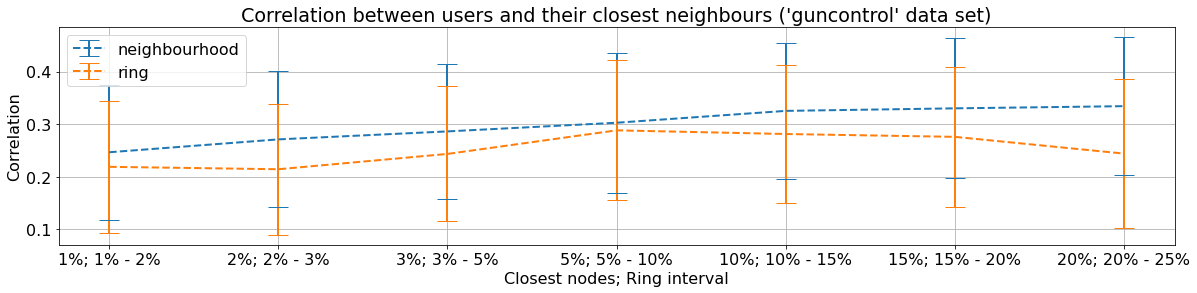

In [59]:
idx  = range(0, 7)
pidx = ["1%; 1% - 2%", "2%; 2% - 3%", "3%; 3% - 5%", "5%; 5% - 10%", "10%; 10% - 15%", "15%; 15% - 20%", "20%; 20% - 25%"]

plt.figure(figsize = (20, 4))
plt.errorbar(range(0, 7), means, stds, linestyle = '--', capsize = 10, linewidth = 2, label = 'neighbourhood')
plt.errorbar(range(0, 7), rings_means, rings_stds, linestyle = '--', capsize = 10, linewidth = 2, label = 'ring')
plt.xticks(ticks = idx, labels = pidx)
plt.title("Correlation between users and their closest neighbours ('guncontrol' data set)")
plt.xlabel("Closest nodes; Ring interval")
plt.ylabel("Correlation")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_gc_corr_rings.png", bbox_inches = 'tight')

In [58]:
print(means)
print(rings_means)

print(stds)
print(rings_stds)

[0.24658642837302852, 0.27102836542929853, 0.286190231408937, 0.3026567686640136, 0.325200720299408, 0.33002595770405746, 0.33416325584669526]
[0.21885111476901048, 0.21428499926950534, 0.24339414381352872, 0.28820202246238663, 0.28124787532934914, 0.2758534026437363, 0.24403823021452892]
[0.12801771092623349, 0.1293380840329043, 0.1287483331909413, 0.1326614305755914, 0.1298780119790856, 0.1328200035194082, 0.13100218299374644]
[0.12482733781083195, 0.12484443554975394, 0.12840975139068764, 0.13319343508585954, 0.13062018850125748, 0.1326756671959539, 0.14137973422878147]


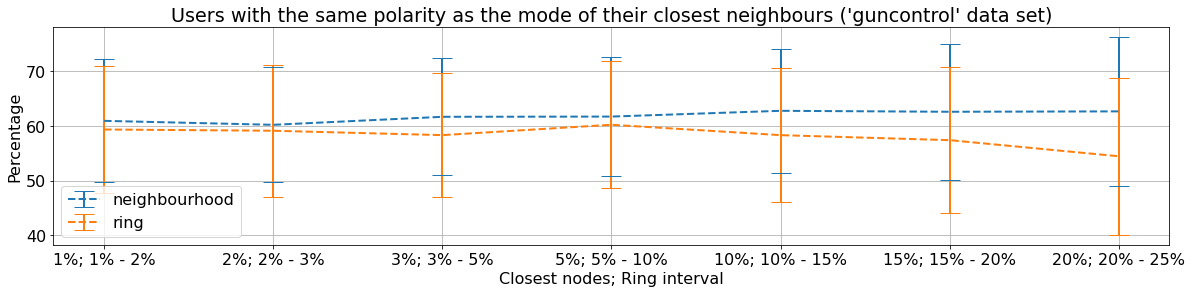

In [61]:
idx  = range(0, 7)
pidx = ["1%; 1% - 2%", "2%; 2% - 3%", "3%; 3% - 5%", "5%; 5% - 10%", "10%; 10% - 15%", "15%; 15% - 20%", "20%; 20% - 25%"]

plt.figure(figsize = (20, 4))
plt.errorbar(range(0, 7), 100 * np.array(perc_d_agg).mean(axis = 1), 100 * np.array(perc_d_agg).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'neighbourhood')
plt.errorbar(range(0, 7), 100 * np.array(perc_d_rings).mean(axis = 1), 100 * np.array(perc_d_rings).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'ring')
plt.xticks(ticks = idx, labels = pidx)
plt.title("Users with the same polarity as the mode of their closest neighbours ('guncontrol' data set)")
plt.xlabel("Closest nodes; Ring interval")
plt.ylabel("Percentage")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_gc_perc_rings_d.png", bbox_inches = 'tight')

In [365]:
print(np.array(perc_d_agg).mean(axis = 1))
print(np.array(perc_d_rings).mean(axis = 1))

print(np.array(perc_d_agg).std(axis = 1))
print(np.array(perc_d_rings).std(axis = 1))

[0.60900309 0.60177829 0.61638024 0.61679219 0.62732203 0.62557841
 0.62628512]
[0.59321708 0.59094799 0.58294247 0.60186188 0.58291173 0.57377329
 0.54440342]
[0.11227341 0.10508099 0.10653839 0.10823106 0.11288579 0.1242744
 0.13526096]
[0.1163938  0.12027929 0.11372303 0.11596373 0.12246707 0.13291818
 0.1435235 ]


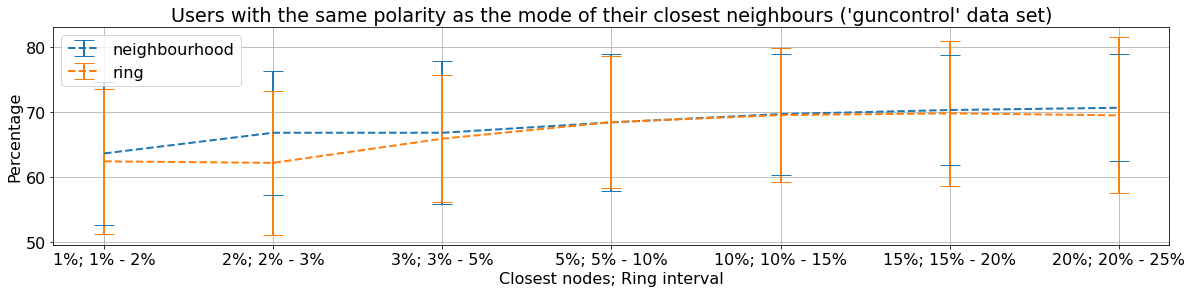

In [62]:
idx  = range(0, 7)
pidx = ["1%; 1% - 2%", "2%; 2% - 3%", "3%; 3% - 5%", "5%; 5% - 10%", "10%; 10% - 15%", "15%; 15% - 20%", "20%; 20% - 25%"]

plt.figure(figsize = (20, 4))
plt.errorbar(range(0, 7), 100 * np.array(perc_r_agg).mean(axis = 1), 100 * np.array(perc_r_agg).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'neighbourhood')
plt.errorbar(range(0, 7), 100 * np.array(perc_r_rings).mean(axis = 1), 100 * np.array(perc_r_rings).std(axis = 1), linestyle = '--', capsize = 10, linewidth = 2, label = 'ring')
plt.xticks(ticks = idx, labels = pidx)
plt.title("Users with the same polarity as the mode of their closest neighbours ('guncontrol' data set)")
plt.xlabel("Closest nodes; Ring interval")
plt.ylabel("Percentage")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_gc_perc_rings_r.png", bbox_inches = 'tight')

In [364]:
print(np.array(perc_r_agg).mean(axis = 1))
print(np.array(perc_r_rings).mean(axis = 1))

print(np.array(perc_r_agg).std(axis = 1))
print(np.array(perc_r_rings).std(axis = 1))

[0.63655288 0.66832672 0.66832448 0.68419548 0.69703847 0.70325192
 0.70673482]
[0.62437678 0.62205408 0.6591923  0.68463169 0.6954282  0.69815256
 0.69503746]
[0.10936886 0.09556908 0.10972413 0.10507604 0.09290749 0.0849054
 0.08237263]
[0.11120789 0.11073643 0.0971249  0.10149625 0.10283092 0.11161542
 0.12005309]


### In-between days correlation

In [78]:
# get correlation between consecutive days / vs aggregated graph

with open("../pickle/guncontrol_daily_eig_aligned_norm2.pkl", "rb") as pickle_file:
     _, _, base, _, _, _, _, _, _, _ = pkl.load(pickle_file)    

corr_change   = []
corr_change_d = []
corr_change_r = []

corr_change_base   = []
corr_change_base_d = []
corr_change_base_r = []
for j in range(606, len(ordered_pickle_files_)):

    print("Running for embedding {}/{}".format(j, len(ordered_pickle_files_)))

    # read the embeddings
    # for the day
    with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j]), "rb") as pickle_file:
        _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)    
    # the previous day
    with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j - 1]), "rb") as pickle_file:
        _, _, xy_pairs_previous, _, _, _, _, _, _, _ = pkl.load(pickle_file) 
        
    # get the correlations for consecutive days
    _corr, _ = pearsonr(xy_pairs.flatten(), xy_pairs_previous.flatten())
    corr_change.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls0.index].flatten(), xy_pairs_previous[cls0.index].flatten())
    corr_change_d.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls1.index].flatten(), xy_pairs_previous[cls1.index].flatten())
    corr_change_r.append(_corr)
    
    # get the correlation between the averaged graph and specific days
    _corr, _ = pearsonr(xy_pairs.flatten(), base.flatten())
    corr_change_base.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls0.index].flatten(), base[cls0.index].flatten())
    corr_change_base_d.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls1.index].flatten(), base[cls1.index].flatten())
    corr_change_base_r.append(_corr)

Running for embedding 606/2411
Running for embedding 607/2411
Running for embedding 608/2411
Running for embedding 609/2411
Running for embedding 610/2411
Running for embedding 611/2411
Running for embedding 612/2411
Running for embedding 613/2411
Running for embedding 614/2411
Running for embedding 615/2411
Running for embedding 616/2411
Running for embedding 617/2411
Running for embedding 618/2411
Running for embedding 619/2411
Running for embedding 620/2411
Running for embedding 621/2411
Running for embedding 622/2411
Running for embedding 623/2411
Running for embedding 624/2411
Running for embedding 625/2411
Running for embedding 626/2411
Running for embedding 627/2411
Running for embedding 628/2411
Running for embedding 629/2411
Running for embedding 630/2411
Running for embedding 631/2411
Running for embedding 632/2411
Running for embedding 633/2411
Running for embedding 634/2411
Running for embedding 635/2411
Running for embedding 636/2411
Running for embedding 637/2411
Running 

Running for embedding 871/2411
Running for embedding 872/2411
Running for embedding 873/2411
Running for embedding 874/2411
Running for embedding 875/2411
Running for embedding 876/2411
Running for embedding 877/2411
Running for embedding 878/2411
Running for embedding 879/2411
Running for embedding 880/2411
Running for embedding 881/2411
Running for embedding 882/2411
Running for embedding 883/2411
Running for embedding 884/2411
Running for embedding 885/2411
Running for embedding 886/2411
Running for embedding 887/2411
Running for embedding 888/2411
Running for embedding 889/2411
Running for embedding 890/2411
Running for embedding 891/2411
Running for embedding 892/2411
Running for embedding 893/2411
Running for embedding 894/2411
Running for embedding 895/2411
Running for embedding 896/2411
Running for embedding 897/2411
Running for embedding 898/2411
Running for embedding 899/2411
Running for embedding 900/2411
Running for embedding 901/2411
Running for embedding 902/2411
Running 

Running for embedding 1133/2411
Running for embedding 1134/2411
Running for embedding 1135/2411
Running for embedding 1136/2411
Running for embedding 1137/2411
Running for embedding 1138/2411
Running for embedding 1139/2411
Running for embedding 1140/2411
Running for embedding 1141/2411
Running for embedding 1142/2411
Running for embedding 1143/2411
Running for embedding 1144/2411
Running for embedding 1145/2411
Running for embedding 1146/2411
Running for embedding 1147/2411
Running for embedding 1148/2411
Running for embedding 1149/2411
Running for embedding 1150/2411
Running for embedding 1151/2411
Running for embedding 1152/2411
Running for embedding 1153/2411
Running for embedding 1154/2411
Running for embedding 1155/2411
Running for embedding 1156/2411
Running for embedding 1157/2411
Running for embedding 1158/2411
Running for embedding 1159/2411
Running for embedding 1160/2411
Running for embedding 1161/2411
Running for embedding 1162/2411
Running for embedding 1163/2411
Running 

Running for embedding 1393/2411
Running for embedding 1394/2411
Running for embedding 1395/2411
Running for embedding 1396/2411
Running for embedding 1397/2411
Running for embedding 1398/2411
Running for embedding 1399/2411
Running for embedding 1400/2411
Running for embedding 1401/2411
Running for embedding 1402/2411
Running for embedding 1403/2411
Running for embedding 1404/2411
Running for embedding 1405/2411
Running for embedding 1406/2411
Running for embedding 1407/2411
Running for embedding 1408/2411
Running for embedding 1409/2411
Running for embedding 1410/2411
Running for embedding 1411/2411
Running for embedding 1412/2411
Running for embedding 1413/2411
Running for embedding 1414/2411
Running for embedding 1415/2411
Running for embedding 1416/2411
Running for embedding 1417/2411
Running for embedding 1418/2411
Running for embedding 1419/2411
Running for embedding 1420/2411
Running for embedding 1421/2411
Running for embedding 1422/2411
Running for embedding 1423/2411
Running 

Running for embedding 1654/2411
Running for embedding 1655/2411
Running for embedding 1656/2411
Running for embedding 1657/2411
Running for embedding 1658/2411
Running for embedding 1659/2411
Running for embedding 1660/2411
Running for embedding 1661/2411
Running for embedding 1662/2411
Running for embedding 1663/2411
Running for embedding 1664/2411
Running for embedding 1665/2411
Running for embedding 1666/2411
Running for embedding 1667/2411
Running for embedding 1668/2411
Running for embedding 1669/2411
Running for embedding 1670/2411
Running for embedding 1671/2411
Running for embedding 1672/2411
Running for embedding 1673/2411
Running for embedding 1674/2411
Running for embedding 1675/2411
Running for embedding 1676/2411
Running for embedding 1677/2411
Running for embedding 1678/2411
Running for embedding 1679/2411
Running for embedding 1680/2411
Running for embedding 1681/2411
Running for embedding 1682/2411
Running for embedding 1683/2411
Running for embedding 1684/2411
Running 

Running for embedding 1911/2411
Running for embedding 1912/2411
Running for embedding 1913/2411
Running for embedding 1914/2411
Running for embedding 1915/2411
Running for embedding 1916/2411
Running for embedding 1917/2411
Running for embedding 1918/2411
Running for embedding 1919/2411
Running for embedding 1920/2411
Running for embedding 1921/2411
Running for embedding 1922/2411
Running for embedding 1923/2411
Running for embedding 1924/2411
Running for embedding 1925/2411
Running for embedding 1926/2411
Running for embedding 1927/2411
Running for embedding 1928/2411
Running for embedding 1929/2411
Running for embedding 1930/2411
Running for embedding 1931/2411
Running for embedding 1932/2411
Running for embedding 1933/2411
Running for embedding 1934/2411
Running for embedding 1935/2411
Running for embedding 1936/2411
Running for embedding 1937/2411
Running for embedding 1938/2411
Running for embedding 1939/2411
Running for embedding 1940/2411
Running for embedding 1941/2411
Running 

Running for embedding 2170/2411
Running for embedding 2171/2411
Running for embedding 2172/2411
Running for embedding 2173/2411
Running for embedding 2174/2411
Running for embedding 2175/2411
Running for embedding 2176/2411
Running for embedding 2177/2411
Running for embedding 2178/2411
Running for embedding 2179/2411
Running for embedding 2180/2411
Running for embedding 2181/2411
Running for embedding 2182/2411
Running for embedding 2183/2411
Running for embedding 2184/2411
Running for embedding 2185/2411
Running for embedding 2186/2411
Running for embedding 2187/2411
Running for embedding 2188/2411
Running for embedding 2189/2411
Running for embedding 2190/2411
Running for embedding 2191/2411
Running for embedding 2192/2411
Running for embedding 2193/2411
Running for embedding 2194/2411
Running for embedding 2195/2411
Running for embedding 2196/2411
Running for embedding 2197/2411
Running for embedding 2198/2411
Running for embedding 2199/2411
Running for embedding 2200/2411
Running 

In [79]:
### Pickle the correlations 
with open("../pickle/guncontrol_daily_corr_change.pkl", "wb") as f:
    pkl.dump([corr_change, corr_change_d, corr_change_r, corr_change_base, corr_change_base_d, corr_change_base_r], f)

## For 'healthcare' data set

In [63]:
# load the indexes corresponding to the non-zero entries
with open("../pickle/obamacare_daily_nonzero_indexes.pkl", "rb") as f:
    nonzero_idx = pkl.load(f)
    
# get dates mapping
pickle_folder_path = "../pickle/obamacare_daily_largest_aligned_norm2/"

pickle_files_aligned = [f for f in os.listdir(pickle_folder_path) if os.path.isfile(os.path.join(pickle_folder_path, f))]

pickle_idx = []
for pickle_ in pickle_files_aligned:
    pickle_idx.append((pickle_.split(".")[0].split("_")[1]))

ordered_pickle_files_ = []
for i, j in sorted(zip(pickle_idx, pickle_files_aligned)):
    ordered_pickle_files_.append(j)
    
# get the polarity scores
polarities = pd.read_csv("../keras/obamacare_daily/ordered_predictions.csv")

cls0 = polarities[polarities["Class"] == 0]
cls1 = polarities[polarities["Class"] == 1]

pickle_idx.sort()

In [432]:
perc_neighbours = [0.01, 0.02, 0.03, 0.05, 0.1, 0.15, 0.20]

corr_agg   = []
perc_d_agg = []
perc_r_agg = []
for _n in perc_neighbours:
    print("At {} neighbours".format(_n))
    
    corr   = []
    perc_d = []
    perc_r = []
    for j in range(774, len(ordered_pickle_files_)):

        print("Running for embedding {}/{}".format(j, len(ordered_pickle_files_)))

        # read the embeddings
        with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j]), "rb") as pickle_file:
            _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)    

        # compute the distance matrix
        distance = squareform(pdist(xy_pairs[nonzero_idx[j]]))
        distance = distance + distance.max() * 100 * np.identity(len(distance))

        # determine the mode polarity of the closest k nodes
        polarity_daily = []
        polarity_d     = []
        polarity_r     = []
        
        # get k
        k = int(np.round(_n * len(nonzero_idx[j])))
        if k == 0:
            k = 1
        for i in range(0, len(distance)):
            p = mode(polarities.loc[nonzero_idx[j][distance[i].argsort()[0:k]], 'Class'])[0][0]
            polarity_daily.append(p)

            if polarities.loc[nonzero_idx[j][i], 'Class'] == 0.0:
                polarity_d.append(p)

            else:
                polarity_r.append(p)

        # compute the correlation for the active users; 
        _corr, _ = pearsonr(polarities.loc[nonzero_idx[j], 'Class'], polarity_daily)
        corr.append(_corr)

        # get the percentage of nodes that are mostly surrounded by same-minded nodes
        perc_d.append(1 - np.sum(polarity_d) / len(polarity_d))
        perc_r.append(np.sum(polarity_r) / len(polarity_r))
        
    corr_agg.append(corr)
    perc_d_agg.append(perc_d)
    perc_r_agg.append(perc_r)

At 0.01 neighbours
Running for embedding 774/2579
Running for embedding 775/2579
Running for embedding 776/2579
Running for embedding 777/2579
Running for embedding 778/2579
Running for embedding 779/2579
Running for embedding 780/2579
Running for embedding 781/2579
Running for embedding 782/2579
Running for embedding 783/2579
Running for embedding 784/2579
Running for embedding 785/2579
Running for embedding 786/2579
Running for embedding 787/2579
Running for embedding 788/2579
Running for embedding 789/2579
Running for embedding 790/2579
Running for embedding 791/2579
Running for embedding 792/2579
Running for embedding 793/2579
Running for embedding 794/2579
Running for embedding 795/2579
Running for embedding 796/2579
Running for embedding 797/2579
Running for embedding 798/2579
Running for embedding 799/2579
Running for embedding 800/2579
Running for embedding 801/2579
Running for embedding 802/2579
Running for embedding 803/2579
Running for embedding 804/2579
Running for embeddin

/home/adc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/adc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


Running for embedding 836/2579
Running for embedding 837/2579
Running for embedding 838/2579
Running for embedding 839/2579
Running for embedding 840/2579
Running for embedding 841/2579
Running for embedding 842/2579
Running for embedding 843/2579
Running for embedding 844/2579
Running for embedding 845/2579
Running for embedding 846/2579
Running for embedding 847/2579
Running for embedding 848/2579
Running for embedding 849/2579
Running for embedding 850/2579
Running for embedding 851/2579
Running for embedding 852/2579
Running for embedding 853/2579
Running for embedding 854/2579
Running for embedding 855/2579
Running for embedding 856/2579
Running for embedding 857/2579
Running for embedding 858/2579
Running for embedding 859/2579
Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running 

Running for embedding 1098/2579
Running for embedding 1099/2579
Running for embedding 1100/2579
Running for embedding 1101/2579
Running for embedding 1102/2579
Running for embedding 1103/2579
Running for embedding 1104/2579
Running for embedding 1105/2579
Running for embedding 1106/2579
Running for embedding 1107/2579
Running for embedding 1108/2579
Running for embedding 1109/2579
Running for embedding 1110/2579
Running for embedding 1111/2579
Running for embedding 1112/2579
Running for embedding 1113/2579
Running for embedding 1114/2579
Running for embedding 1115/2579
Running for embedding 1116/2579
Running for embedding 1117/2579
Running for embedding 1118/2579
Running for embedding 1119/2579
Running for embedding 1120/2579
Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running 

Running for embedding 1355/2579
Running for embedding 1356/2579
Running for embedding 1357/2579
Running for embedding 1358/2579
Running for embedding 1359/2579
Running for embedding 1360/2579
Running for embedding 1361/2579
Running for embedding 1362/2579
Running for embedding 1363/2579
Running for embedding 1364/2579
Running for embedding 1365/2579
Running for embedding 1366/2579
Running for embedding 1367/2579
Running for embedding 1368/2579
Running for embedding 1369/2579
Running for embedding 1370/2579
Running for embedding 1371/2579
Running for embedding 1372/2579
Running for embedding 1373/2579
Running for embedding 1374/2579
Running for embedding 1375/2579
Running for embedding 1376/2579
Running for embedding 1377/2579
Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running 

Running for embedding 1612/2579
Running for embedding 1613/2579
Running for embedding 1614/2579
Running for embedding 1615/2579
Running for embedding 1616/2579
Running for embedding 1617/2579
Running for embedding 1618/2579
Running for embedding 1619/2579
Running for embedding 1620/2579
Running for embedding 1621/2579
Running for embedding 1622/2579
Running for embedding 1623/2579
Running for embedding 1624/2579
Running for embedding 1625/2579
Running for embedding 1626/2579
Running for embedding 1627/2579
Running for embedding 1628/2579
Running for embedding 1629/2579
Running for embedding 1630/2579
Running for embedding 1631/2579
Running for embedding 1632/2579
Running for embedding 1633/2579
Running for embedding 1634/2579
Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running 

Running for embedding 1869/2579
Running for embedding 1870/2579
Running for embedding 1871/2579
Running for embedding 1872/2579
Running for embedding 1873/2579
Running for embedding 1874/2579
Running for embedding 1875/2579
Running for embedding 1876/2579
Running for embedding 1877/2579
Running for embedding 1878/2579
Running for embedding 1879/2579
Running for embedding 1880/2579
Running for embedding 1881/2579
Running for embedding 1882/2579
Running for embedding 1883/2579
Running for embedding 1884/2579
Running for embedding 1885/2579
Running for embedding 1886/2579
Running for embedding 1887/2579
Running for embedding 1888/2579
Running for embedding 1889/2579
Running for embedding 1890/2579
Running for embedding 1891/2579
Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running 

Running for embedding 2127/2579
Running for embedding 2128/2579
Running for embedding 2129/2579
Running for embedding 2130/2579
Running for embedding 2131/2579
Running for embedding 2132/2579
Running for embedding 2133/2579
Running for embedding 2134/2579
Running for embedding 2135/2579
Running for embedding 2136/2579
Running for embedding 2137/2579
Running for embedding 2138/2579
Running for embedding 2139/2579
Running for embedding 2140/2579
Running for embedding 2141/2579
Running for embedding 2142/2579
Running for embedding 2143/2579
Running for embedding 2144/2579
Running for embedding 2145/2579
Running for embedding 2146/2579
Running for embedding 2147/2579
Running for embedding 2148/2579
Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running 

Running for embedding 2385/2579
Running for embedding 2386/2579
Running for embedding 2387/2579
Running for embedding 2388/2579
Running for embedding 2389/2579
Running for embedding 2390/2579
Running for embedding 2391/2579
Running for embedding 2392/2579
Running for embedding 2393/2579
Running for embedding 2394/2579
Running for embedding 2395/2579
Running for embedding 2396/2579
Running for embedding 2397/2579
Running for embedding 2398/2579
Running for embedding 2399/2579
Running for embedding 2400/2579
Running for embedding 2401/2579
Running for embedding 2402/2579
Running for embedding 2403/2579
Running for embedding 2404/2579
Running for embedding 2405/2579
Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running 

Running for embedding 843/2579
Running for embedding 844/2579
Running for embedding 845/2579
Running for embedding 846/2579
Running for embedding 847/2579
Running for embedding 848/2579
Running for embedding 849/2579
Running for embedding 850/2579
Running for embedding 851/2579
Running for embedding 852/2579
Running for embedding 853/2579
Running for embedding 854/2579
Running for embedding 855/2579
Running for embedding 856/2579
Running for embedding 857/2579
Running for embedding 858/2579
Running for embedding 859/2579
Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running for embedding 872/2579
Running for embedding 873/2579
Running for embedding 874/2579
Running 

Running for embedding 1105/2579
Running for embedding 1106/2579
Running for embedding 1107/2579
Running for embedding 1108/2579
Running for embedding 1109/2579
Running for embedding 1110/2579
Running for embedding 1111/2579
Running for embedding 1112/2579
Running for embedding 1113/2579
Running for embedding 1114/2579
Running for embedding 1115/2579
Running for embedding 1116/2579
Running for embedding 1117/2579
Running for embedding 1118/2579
Running for embedding 1119/2579
Running for embedding 1120/2579
Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running for embedding 1135/2579
Running 

Running for embedding 1362/2579
Running for embedding 1363/2579
Running for embedding 1364/2579
Running for embedding 1365/2579
Running for embedding 1366/2579
Running for embedding 1367/2579
Running for embedding 1368/2579
Running for embedding 1369/2579
Running for embedding 1370/2579
Running for embedding 1371/2579
Running for embedding 1372/2579
Running for embedding 1373/2579
Running for embedding 1374/2579
Running for embedding 1375/2579
Running for embedding 1376/2579
Running for embedding 1377/2579
Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running for embedding 1392/2579
Running 

Running for embedding 1619/2579
Running for embedding 1620/2579
Running for embedding 1621/2579
Running for embedding 1622/2579
Running for embedding 1623/2579
Running for embedding 1624/2579
Running for embedding 1625/2579
Running for embedding 1626/2579
Running for embedding 1627/2579
Running for embedding 1628/2579
Running for embedding 1629/2579
Running for embedding 1630/2579
Running for embedding 1631/2579
Running for embedding 1632/2579
Running for embedding 1633/2579
Running for embedding 1634/2579
Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running for embedding 1649/2579
Running 

Running for embedding 1876/2579
Running for embedding 1877/2579
Running for embedding 1878/2579
Running for embedding 1879/2579
Running for embedding 1880/2579
Running for embedding 1881/2579
Running for embedding 1882/2579
Running for embedding 1883/2579
Running for embedding 1884/2579
Running for embedding 1885/2579
Running for embedding 1886/2579
Running for embedding 1887/2579
Running for embedding 1888/2579
Running for embedding 1889/2579
Running for embedding 1890/2579
Running for embedding 1891/2579
Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running for embedding 1906/2579
Running 

Running for embedding 2134/2579
Running for embedding 2135/2579
Running for embedding 2136/2579
Running for embedding 2137/2579
Running for embedding 2138/2579
Running for embedding 2139/2579
Running for embedding 2140/2579
Running for embedding 2141/2579
Running for embedding 2142/2579
Running for embedding 2143/2579
Running for embedding 2144/2579
Running for embedding 2145/2579
Running for embedding 2146/2579
Running for embedding 2147/2579
Running for embedding 2148/2579
Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running for embedding 2163/2579
Running for embedding 2164/2579
Running 

Running for embedding 2392/2579
Running for embedding 2393/2579
Running for embedding 2394/2579
Running for embedding 2395/2579
Running for embedding 2396/2579
Running for embedding 2397/2579
Running for embedding 2398/2579
Running for embedding 2399/2579
Running for embedding 2400/2579
Running for embedding 2401/2579
Running for embedding 2402/2579
Running for embedding 2403/2579
Running for embedding 2404/2579
Running for embedding 2405/2579
Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running for embedding 2421/2579
Running for embedding 2422/2579
Running 

Running for embedding 848/2579
Running for embedding 849/2579
Running for embedding 850/2579
Running for embedding 851/2579
Running for embedding 852/2579
Running for embedding 853/2579
Running for embedding 854/2579
Running for embedding 855/2579
Running for embedding 856/2579
Running for embedding 857/2579
Running for embedding 858/2579
Running for embedding 859/2579
Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running for embedding 872/2579
Running for embedding 873/2579
Running for embedding 874/2579
Running for embedding 875/2579
Running for embedding 876/2579
Running for embedding 877/2579
Running for embedding 878/2579
Running for embedding 879/2579
Running 

Running for embedding 1111/2579
Running for embedding 1112/2579
Running for embedding 1113/2579
Running for embedding 1114/2579
Running for embedding 1115/2579
Running for embedding 1116/2579
Running for embedding 1117/2579
Running for embedding 1118/2579
Running for embedding 1119/2579
Running for embedding 1120/2579
Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running for embedding 1135/2579
Running for embedding 1136/2579
Running for embedding 1137/2579
Running for embedding 1138/2579
Running for embedding 1139/2579
Running for embedding 1140/2579
Running for embedding 1141/2579
Running 

Running for embedding 1369/2579
Running for embedding 1370/2579
Running for embedding 1371/2579
Running for embedding 1372/2579
Running for embedding 1373/2579
Running for embedding 1374/2579
Running for embedding 1375/2579
Running for embedding 1376/2579
Running for embedding 1377/2579
Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running for embedding 1392/2579
Running for embedding 1393/2579
Running for embedding 1394/2579
Running for embedding 1395/2579
Running for embedding 1396/2579
Running for embedding 1397/2579
Running for embedding 1398/2579
Running for embedding 1399/2579
Running 

Running for embedding 1626/2579
Running for embedding 1627/2579
Running for embedding 1628/2579
Running for embedding 1629/2579
Running for embedding 1630/2579
Running for embedding 1631/2579
Running for embedding 1632/2579
Running for embedding 1633/2579
Running for embedding 1634/2579
Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running for embedding 1649/2579
Running for embedding 1650/2579
Running for embedding 1651/2579
Running for embedding 1652/2579
Running for embedding 1653/2579
Running for embedding 1654/2579
Running for embedding 1655/2579
Running for embedding 1656/2579
Running 

Running for embedding 1883/2579
Running for embedding 1884/2579
Running for embedding 1885/2579
Running for embedding 1886/2579
Running for embedding 1887/2579
Running for embedding 1888/2579
Running for embedding 1889/2579
Running for embedding 1890/2579
Running for embedding 1891/2579
Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running for embedding 1906/2579
Running for embedding 1907/2579
Running for embedding 1908/2579
Running for embedding 1909/2579
Running for embedding 1910/2579
Running for embedding 1911/2579
Running for embedding 1912/2579
Running for embedding 1913/2579
Running 

Running for embedding 2140/2579
Running for embedding 2141/2579
Running for embedding 2142/2579
Running for embedding 2143/2579
Running for embedding 2144/2579
Running for embedding 2145/2579
Running for embedding 2146/2579
Running for embedding 2147/2579
Running for embedding 2148/2579
Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running for embedding 2163/2579
Running for embedding 2164/2579
Running for embedding 2165/2579
Running for embedding 2166/2579
Running for embedding 2167/2579
Running for embedding 2168/2579
Running for embedding 2169/2579
Running for embedding 2170/2579
Running 

Running for embedding 2398/2579
Running for embedding 2399/2579
Running for embedding 2400/2579
Running for embedding 2401/2579
Running for embedding 2402/2579
Running for embedding 2403/2579
Running for embedding 2404/2579
Running for embedding 2405/2579
Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running for embedding 2421/2579
Running for embedding 2422/2579
Running for embedding 2423/2579
Running for embedding 2424/2579
Running for embedding 2425/2579
Running for embedding 2426/2579
Running for embedding 2427/2579
Running for embedding 2428/2579
Running 

Running for embedding 854/2579
Running for embedding 855/2579
Running for embedding 856/2579
Running for embedding 857/2579
Running for embedding 858/2579
Running for embedding 859/2579
Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running for embedding 872/2579
Running for embedding 873/2579
Running for embedding 874/2579
Running for embedding 875/2579
Running for embedding 876/2579
Running for embedding 877/2579
Running for embedding 878/2579
Running for embedding 879/2579
Running for embedding 880/2579
Running for embedding 881/2579
Running for embedding 882/2579
Running for embedding 883/2579
Running for embedding 884/2579
Running for embedding 885/2579
Running 

Running for embedding 1116/2579
Running for embedding 1117/2579
Running for embedding 1118/2579
Running for embedding 1119/2579
Running for embedding 1120/2579
Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running for embedding 1135/2579
Running for embedding 1136/2579
Running for embedding 1137/2579
Running for embedding 1138/2579
Running for embedding 1139/2579
Running for embedding 1140/2579
Running for embedding 1141/2579
Running for embedding 1142/2579
Running for embedding 1143/2579
Running for embedding 1144/2579
Running for embedding 1145/2579
Running for embedding 1146/2579
Running 

Running for embedding 1374/2579
Running for embedding 1375/2579
Running for embedding 1376/2579
Running for embedding 1377/2579
Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running for embedding 1392/2579
Running for embedding 1393/2579
Running for embedding 1394/2579
Running for embedding 1395/2579
Running for embedding 1396/2579
Running for embedding 1397/2579
Running for embedding 1398/2579
Running for embedding 1399/2579
Running for embedding 1400/2579
Running for embedding 1401/2579
Running for embedding 1402/2579
Running for embedding 1403/2579
Running for embedding 1404/2579
Running 

Running for embedding 1631/2579
Running for embedding 1632/2579
Running for embedding 1633/2579
Running for embedding 1634/2579
Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running for embedding 1649/2579
Running for embedding 1650/2579
Running for embedding 1651/2579
Running for embedding 1652/2579
Running for embedding 1653/2579
Running for embedding 1654/2579
Running for embedding 1655/2579
Running for embedding 1656/2579
Running for embedding 1657/2579
Running for embedding 1658/2579
Running for embedding 1659/2579
Running for embedding 1660/2579
Running for embedding 1661/2579
Running 

Running for embedding 1888/2579
Running for embedding 1889/2579
Running for embedding 1890/2579
Running for embedding 1891/2579
Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running for embedding 1906/2579
Running for embedding 1907/2579
Running for embedding 1908/2579
Running for embedding 1909/2579
Running for embedding 1910/2579
Running for embedding 1911/2579
Running for embedding 1912/2579
Running for embedding 1913/2579
Running for embedding 1914/2579
Running for embedding 1915/2579
Running for embedding 1916/2579
Running for embedding 1917/2579
Running for embedding 1918/2579
Running 

Running for embedding 2145/2579
Running for embedding 2146/2579
Running for embedding 2147/2579
Running for embedding 2148/2579
Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running for embedding 2163/2579
Running for embedding 2164/2579
Running for embedding 2165/2579
Running for embedding 2166/2579
Running for embedding 2167/2579
Running for embedding 2168/2579
Running for embedding 2169/2579
Running for embedding 2170/2579
Running for embedding 2171/2579
Running for embedding 2172/2579
Running for embedding 2173/2579
Running for embedding 2174/2579
Running for embedding 2175/2579
Running 

Running for embedding 2402/2579
Running for embedding 2403/2579
Running for embedding 2404/2579
Running for embedding 2405/2579
Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running for embedding 2421/2579
Running for embedding 2422/2579
Running for embedding 2423/2579
Running for embedding 2424/2579
Running for embedding 2425/2579
Running for embedding 2426/2579
Running for embedding 2427/2579
Running for embedding 2428/2579
Running for embedding 2429/2579
Running for embedding 2430/2579
Running for embedding 2431/2579
Running for embedding 2432/2579
Running 

Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running for embedding 872/2579
Running for embedding 873/2579
Running for embedding 874/2579
Running for embedding 875/2579
Running for embedding 876/2579
Running for embedding 877/2579
Running for embedding 878/2579
Running for embedding 879/2579
Running for embedding 880/2579
Running for embedding 881/2579
Running for embedding 882/2579
Running for embedding 883/2579
Running for embedding 884/2579
Running for embedding 885/2579
Running for embedding 886/2579
Running for embedding 887/2579
Running for embedding 888/2579
Running for embedding 889/2579
Running for embedding 890/2579
Running for embedding 891/2579
Running for embedding 892/2579
Running for embedding 893/2579
Running 

Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running for embedding 1135/2579
Running for embedding 1136/2579
Running for embedding 1137/2579
Running for embedding 1138/2579
Running for embedding 1139/2579
Running for embedding 1140/2579
Running for embedding 1141/2579
Running for embedding 1142/2579
Running for embedding 1143/2579
Running for embedding 1144/2579
Running for embedding 1145/2579
Running for embedding 1146/2579
Running for embedding 1147/2579
Running for embedding 1148/2579
Running for embedding 1149/2579
Running for embedding 1150/2579
Running for embedding 1151/2579
Running for embedding 1152/2579
Running for embedding 1153/2579
Running for embedding 1154/2579
Running 

Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running for embedding 1392/2579
Running for embedding 1393/2579
Running for embedding 1394/2579
Running for embedding 1395/2579
Running for embedding 1396/2579
Running for embedding 1397/2579
Running for embedding 1398/2579
Running for embedding 1399/2579
Running for embedding 1400/2579
Running for embedding 1401/2579
Running for embedding 1402/2579
Running for embedding 1403/2579
Running for embedding 1404/2579
Running for embedding 1405/2579
Running for embedding 1406/2579
Running for embedding 1407/2579
Running for embedding 1408/2579
Running for embedding 1409/2579
Running for embedding 1410/2579
Running for embedding 1411/2579
Running 

Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running for embedding 1649/2579
Running for embedding 1650/2579
Running for embedding 1651/2579
Running for embedding 1652/2579
Running for embedding 1653/2579
Running for embedding 1654/2579
Running for embedding 1655/2579
Running for embedding 1656/2579
Running for embedding 1657/2579
Running for embedding 1658/2579
Running for embedding 1659/2579
Running for embedding 1660/2579
Running for embedding 1661/2579
Running for embedding 1662/2579
Running for embedding 1663/2579
Running for embedding 1664/2579
Running for embedding 1665/2579
Running for embedding 1666/2579
Running for embedding 1667/2579
Running for embedding 1668/2579
Running 

Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running for embedding 1906/2579
Running for embedding 1907/2579
Running for embedding 1908/2579
Running for embedding 1909/2579
Running for embedding 1910/2579
Running for embedding 1911/2579
Running for embedding 1912/2579
Running for embedding 1913/2579
Running for embedding 1914/2579
Running for embedding 1915/2579
Running for embedding 1916/2579
Running for embedding 1917/2579
Running for embedding 1918/2579
Running for embedding 1919/2579
Running for embedding 1920/2579
Running for embedding 1921/2579
Running for embedding 1922/2579
Running for embedding 1923/2579
Running for embedding 1924/2579
Running for embedding 1925/2579
Running 

Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running for embedding 2163/2579
Running for embedding 2164/2579
Running for embedding 2165/2579
Running for embedding 2166/2579
Running for embedding 2167/2579
Running for embedding 2168/2579
Running for embedding 2169/2579
Running for embedding 2170/2579
Running for embedding 2171/2579
Running for embedding 2172/2579
Running for embedding 2173/2579
Running for embedding 2174/2579
Running for embedding 2175/2579
Running for embedding 2176/2579
Running for embedding 2177/2579
Running for embedding 2178/2579
Running for embedding 2179/2579
Running for embedding 2180/2579
Running for embedding 2181/2579
Running for embedding 2182/2579
Running for embedding 2183/2579
Running 

Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running for embedding 2421/2579
Running for embedding 2422/2579
Running for embedding 2423/2579
Running for embedding 2424/2579
Running for embedding 2425/2579
Running for embedding 2426/2579
Running for embedding 2427/2579
Running for embedding 2428/2579
Running for embedding 2429/2579
Running for embedding 2430/2579
Running for embedding 2431/2579
Running for embedding 2432/2579
Running for embedding 2433/2579
Running for embedding 2434/2579
Running for embedding 2435/2579
Running for embedding 2436/2579
Running for embedding 2437/2579
Running for embedding 2438/2579
Running for embedding 2439/2579
Running for embedding 2440/2579
Running for embedding 2441/2579
Running for embedding 2442/2579
Running 

Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running for embedding 872/2579
Running for embedding 873/2579
Running for embedding 874/2579
Running for embedding 875/2579
Running for embedding 876/2579
Running for embedding 877/2579
Running for embedding 878/2579
Running for embedding 879/2579
Running for embedding 880/2579
Running for embedding 881/2579
Running for embedding 882/2579
Running for embedding 883/2579
Running for embedding 884/2579
Running for embedding 885/2579
Running for embedding 886/2579
Running for embedding 887/2579
Running for embedding 888/2579
Running for embedding 889/2579
Running for embedding 890/2579
Running for embedding 891/2579
Running for embedding 892/2579
Running for embedding 893/2579
Running for embedding 894/2579
Running for embedding 895/2579
Running for embedding 896/2579
Running for embedding 897/2579
Running for embedding 898/2579
Running for embedding 899/2579
Running 

Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running for embedding 1135/2579
Running for embedding 1136/2579
Running for embedding 1137/2579
Running for embedding 1138/2579
Running for embedding 1139/2579
Running for embedding 1140/2579
Running for embedding 1141/2579
Running for embedding 1142/2579
Running for embedding 1143/2579
Running for embedding 1144/2579
Running for embedding 1145/2579
Running for embedding 1146/2579
Running for embedding 1147/2579
Running for embedding 1148/2579
Running for embedding 1149/2579
Running for embedding 1150/2579
Running for embedding 1151/2579
Running for embedding 1152/2579
Running for embedding 1153/2579
Running for embedding 1154/2579
Running for embedding 1155/2579
Running for embedding 1156/2579
Running for embedding 1157/2579
Running for embedding 1158/2579
Running for embedding 1159/2579
Running for embedding 1160/2579
Running for embedding 1161/2579
Running 

Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running for embedding 1392/2579
Running for embedding 1393/2579
Running for embedding 1394/2579
Running for embedding 1395/2579
Running for embedding 1396/2579
Running for embedding 1397/2579
Running for embedding 1398/2579
Running for embedding 1399/2579
Running for embedding 1400/2579
Running for embedding 1401/2579
Running for embedding 1402/2579
Running for embedding 1403/2579
Running for embedding 1404/2579
Running for embedding 1405/2579
Running for embedding 1406/2579
Running for embedding 1407/2579
Running for embedding 1408/2579
Running for embedding 1409/2579
Running for embedding 1410/2579
Running for embedding 1411/2579
Running for embedding 1412/2579
Running for embedding 1413/2579
Running for embedding 1414/2579
Running for embedding 1415/2579
Running for embedding 1416/2579
Running for embedding 1417/2579
Running for embedding 1418/2579
Running for embedding 1419/2579
Running 

Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running for embedding 1649/2579
Running for embedding 1650/2579
Running for embedding 1651/2579
Running for embedding 1652/2579
Running for embedding 1653/2579
Running for embedding 1654/2579
Running for embedding 1655/2579
Running for embedding 1656/2579
Running for embedding 1657/2579
Running for embedding 1658/2579
Running for embedding 1659/2579
Running for embedding 1660/2579
Running for embedding 1661/2579
Running for embedding 1662/2579
Running for embedding 1663/2579
Running for embedding 1664/2579
Running for embedding 1665/2579
Running for embedding 1666/2579
Running for embedding 1667/2579
Running for embedding 1668/2579
Running for embedding 1669/2579
Running for embedding 1670/2579
Running for embedding 1671/2579
Running for embedding 1672/2579
Running for embedding 1673/2579
Running for embedding 1674/2579
Running for embedding 1675/2579
Running for embedding 1676/2579
Running 

Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running for embedding 1906/2579
Running for embedding 1907/2579
Running for embedding 1908/2579
Running for embedding 1909/2579
Running for embedding 1910/2579
Running for embedding 1911/2579
Running for embedding 1912/2579
Running for embedding 1913/2579
Running for embedding 1914/2579
Running for embedding 1915/2579
Running for embedding 1916/2579
Running for embedding 1917/2579
Running for embedding 1918/2579
Running for embedding 1919/2579
Running for embedding 1920/2579
Running for embedding 1921/2579
Running for embedding 1922/2579
Running for embedding 1923/2579
Running for embedding 1924/2579
Running for embedding 1925/2579
Running for embedding 1926/2579
Running for embedding 1927/2579
Running for embedding 1928/2579
Running for embedding 1929/2579
Running for embedding 1930/2579
Running for embedding 1931/2579
Running for embedding 1932/2579
Running for embedding 1933/2579
Running 

Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running for embedding 2163/2579
Running for embedding 2164/2579
Running for embedding 2165/2579
Running for embedding 2166/2579
Running for embedding 2167/2579
Running for embedding 2168/2579
Running for embedding 2169/2579
Running for embedding 2170/2579
Running for embedding 2171/2579
Running for embedding 2172/2579
Running for embedding 2173/2579
Running for embedding 2174/2579
Running for embedding 2175/2579
Running for embedding 2176/2579
Running for embedding 2177/2579
Running for embedding 2178/2579
Running for embedding 2179/2579
Running for embedding 2180/2579
Running for embedding 2181/2579
Running for embedding 2182/2579
Running for embedding 2183/2579
Running for embedding 2184/2579
Running for embedding 2185/2579
Running for embedding 2186/2579
Running for embedding 2187/2579
Running for embedding 2188/2579
Running for embedding 2189/2579
Running for embedding 2190/2579
Running 

Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running for embedding 2421/2579
Running for embedding 2422/2579
Running for embedding 2423/2579
Running for embedding 2424/2579
Running for embedding 2425/2579
Running for embedding 2426/2579
Running for embedding 2427/2579
Running for embedding 2428/2579
Running for embedding 2429/2579
Running for embedding 2430/2579
Running for embedding 2431/2579
Running for embedding 2432/2579
Running for embedding 2433/2579
Running for embedding 2434/2579
Running for embedding 2435/2579
Running for embedding 2436/2579
Running for embedding 2437/2579
Running for embedding 2438/2579
Running for embedding 2439/2579
Running for embedding 2440/2579
Running for embedding 2441/2579
Running for embedding 2442/2579
Running for embedding 2443/2579
Running for embedding 2444/2579
Running for embedding 2445/2579
Running for embedding 2446/2579
Running for embedding 2447/2579
Running 

Running for embedding 875/2579
Running for embedding 876/2579
Running for embedding 877/2579
Running for embedding 878/2579
Running for embedding 879/2579
Running for embedding 880/2579
Running for embedding 881/2579
Running for embedding 882/2579
Running for embedding 883/2579
Running for embedding 884/2579
Running for embedding 885/2579
Running for embedding 886/2579
Running for embedding 887/2579
Running for embedding 888/2579
Running for embedding 889/2579
Running for embedding 890/2579
Running for embedding 891/2579
Running for embedding 892/2579
Running for embedding 893/2579
Running for embedding 894/2579
Running for embedding 895/2579
Running for embedding 896/2579
Running for embedding 897/2579
Running for embedding 898/2579
Running for embedding 899/2579
Running for embedding 900/2579
Running for embedding 901/2579
Running for embedding 902/2579
Running for embedding 903/2579
Running for embedding 904/2579
Running for embedding 905/2579
Running for embedding 906/2579
Running 

Running for embedding 1135/2579
Running for embedding 1136/2579
Running for embedding 1137/2579
Running for embedding 1138/2579
Running for embedding 1139/2579
Running for embedding 1140/2579
Running for embedding 1141/2579
Running for embedding 1142/2579
Running for embedding 1143/2579
Running for embedding 1144/2579
Running for embedding 1145/2579
Running for embedding 1146/2579
Running for embedding 1147/2579
Running for embedding 1148/2579
Running for embedding 1149/2579
Running for embedding 1150/2579
Running for embedding 1151/2579
Running for embedding 1152/2579
Running for embedding 1153/2579
Running for embedding 1154/2579
Running for embedding 1155/2579
Running for embedding 1156/2579
Running for embedding 1157/2579
Running for embedding 1158/2579
Running for embedding 1159/2579
Running for embedding 1160/2579
Running for embedding 1161/2579
Running for embedding 1162/2579
Running for embedding 1163/2579
Running for embedding 1164/2579
Running for embedding 1165/2579
Running 

Running for embedding 1392/2579
Running for embedding 1393/2579
Running for embedding 1394/2579
Running for embedding 1395/2579
Running for embedding 1396/2579
Running for embedding 1397/2579
Running for embedding 1398/2579
Running for embedding 1399/2579
Running for embedding 1400/2579
Running for embedding 1401/2579
Running for embedding 1402/2579
Running for embedding 1403/2579
Running for embedding 1404/2579
Running for embedding 1405/2579
Running for embedding 1406/2579
Running for embedding 1407/2579
Running for embedding 1408/2579
Running for embedding 1409/2579
Running for embedding 1410/2579
Running for embedding 1411/2579
Running for embedding 1412/2579
Running for embedding 1413/2579
Running for embedding 1414/2579
Running for embedding 1415/2579
Running for embedding 1416/2579
Running for embedding 1417/2579
Running for embedding 1418/2579
Running for embedding 1419/2579
Running for embedding 1420/2579
Running for embedding 1421/2579
Running for embedding 1422/2579
Running 

Running for embedding 1649/2579
Running for embedding 1650/2579
Running for embedding 1651/2579
Running for embedding 1652/2579
Running for embedding 1653/2579
Running for embedding 1654/2579
Running for embedding 1655/2579
Running for embedding 1656/2579
Running for embedding 1657/2579
Running for embedding 1658/2579
Running for embedding 1659/2579
Running for embedding 1660/2579
Running for embedding 1661/2579
Running for embedding 1662/2579
Running for embedding 1663/2579
Running for embedding 1664/2579
Running for embedding 1665/2579
Running for embedding 1666/2579
Running for embedding 1667/2579
Running for embedding 1668/2579
Running for embedding 1669/2579
Running for embedding 1670/2579
Running for embedding 1671/2579
Running for embedding 1672/2579
Running for embedding 1673/2579
Running for embedding 1674/2579
Running for embedding 1675/2579
Running for embedding 1676/2579
Running for embedding 1677/2579
Running for embedding 1678/2579
Running for embedding 1679/2579
Running 

Running for embedding 1907/2579
Running for embedding 1908/2579
Running for embedding 1909/2579
Running for embedding 1910/2579
Running for embedding 1911/2579
Running for embedding 1912/2579
Running for embedding 1913/2579
Running for embedding 1914/2579
Running for embedding 1915/2579
Running for embedding 1916/2579
Running for embedding 1917/2579
Running for embedding 1918/2579
Running for embedding 1919/2579
Running for embedding 1920/2579
Running for embedding 1921/2579
Running for embedding 1922/2579
Running for embedding 1923/2579
Running for embedding 1924/2579
Running for embedding 1925/2579
Running for embedding 1926/2579
Running for embedding 1927/2579
Running for embedding 1928/2579
Running for embedding 1929/2579
Running for embedding 1930/2579
Running for embedding 1931/2579
Running for embedding 1932/2579
Running for embedding 1933/2579
Running for embedding 1934/2579
Running for embedding 1935/2579
Running for embedding 1936/2579
Running for embedding 1937/2579
Running 

Running for embedding 2164/2579
Running for embedding 2165/2579
Running for embedding 2166/2579
Running for embedding 2167/2579
Running for embedding 2168/2579
Running for embedding 2169/2579
Running for embedding 2170/2579
Running for embedding 2171/2579
Running for embedding 2172/2579
Running for embedding 2173/2579
Running for embedding 2174/2579
Running for embedding 2175/2579
Running for embedding 2176/2579
Running for embedding 2177/2579
Running for embedding 2178/2579
Running for embedding 2179/2579
Running for embedding 2180/2579
Running for embedding 2181/2579
Running for embedding 2182/2579
Running for embedding 2183/2579
Running for embedding 2184/2579
Running for embedding 2185/2579
Running for embedding 2186/2579
Running for embedding 2187/2579
Running for embedding 2188/2579
Running for embedding 2189/2579
Running for embedding 2190/2579
Running for embedding 2191/2579
Running for embedding 2192/2579
Running for embedding 2193/2579
Running for embedding 2194/2579
Running 

Running for embedding 2421/2579
Running for embedding 2422/2579
Running for embedding 2423/2579
Running for embedding 2424/2579
Running for embedding 2425/2579
Running for embedding 2426/2579
Running for embedding 2427/2579
Running for embedding 2428/2579
Running for embedding 2429/2579
Running for embedding 2430/2579
Running for embedding 2431/2579
Running for embedding 2432/2579
Running for embedding 2433/2579
Running for embedding 2434/2579
Running for embedding 2435/2579
Running for embedding 2436/2579
Running for embedding 2437/2579
Running for embedding 2438/2579
Running for embedding 2439/2579
Running for embedding 2440/2579
Running for embedding 2441/2579
Running for embedding 2442/2579
Running for embedding 2443/2579
Running for embedding 2444/2579
Running for embedding 2445/2579
Running for embedding 2446/2579
Running for embedding 2447/2579
Running for embedding 2448/2579
Running for embedding 2449/2579
Running for embedding 2450/2579
Running for embedding 2451/2579
Running 

In [465]:
### Pickle the correlations and the percentages
with open("../pickle/obamacare_daily_active_users_corr.pkl", "wb") as f:
    pkl.dump([corr_agg, perc_d_agg, perc_r_agg], f)

In [64]:
### load the correlations and the percentages
with open("../pickle/obamacare_daily_active_users_corr.pkl", "rb") as f:
    corr_agg, perc_d_agg, perc_r_agg = pkl.load(f)

### Some plots

In [65]:
for i in range(0, len(corr_agg)):
    corr_agg[i] = np.array(corr_agg[i])
    
means = []
stds  = []
for i in range(0, len(corr_agg)):
    means.append(corr_agg[i][~np.isnan(corr_agg[i])].mean())
    stds.append(corr_agg[i][~np.isnan(corr_agg[i])].std())

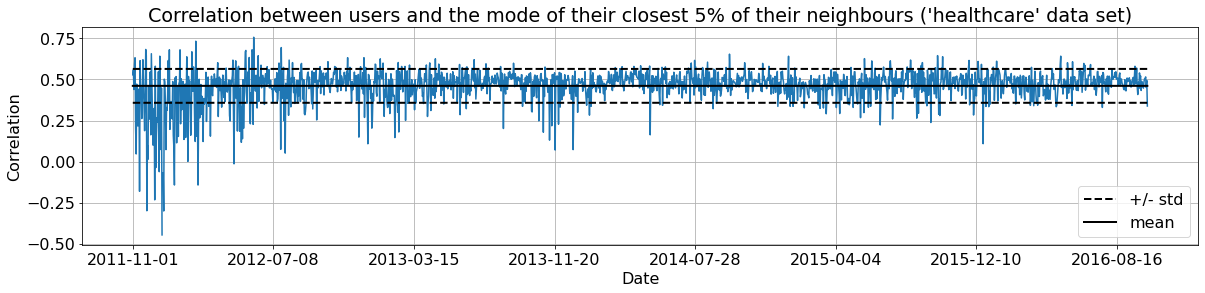

In [66]:
idx  = []
pidx = []
for i in range(0, 1805, 250): 
    idx.append(i)
    pidx.append(i + 774)

plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 16})
plt.plot(corr_agg[3])
plt.plot((means[3] + stds[3]) * np.ones(len(corr_agg[3])), color = 'k', linewidth = 2, linestyle = '--', label = "+/- std")
plt.plot((means[3] - stds[3]) * np.ones(len(corr_agg[3])), color = 'k', linewidth = 2, linestyle = '--')
plt.plot(means[3] * np.ones(len(corr_agg[3])), color = 'k', linewidth = 2, label = 'mean')

plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.title("Correlation between users and the mode of their closest 5% of their neighbours ('healthcare' data set)")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_hc_corr_top5.png", bbox_inches = 'tight')

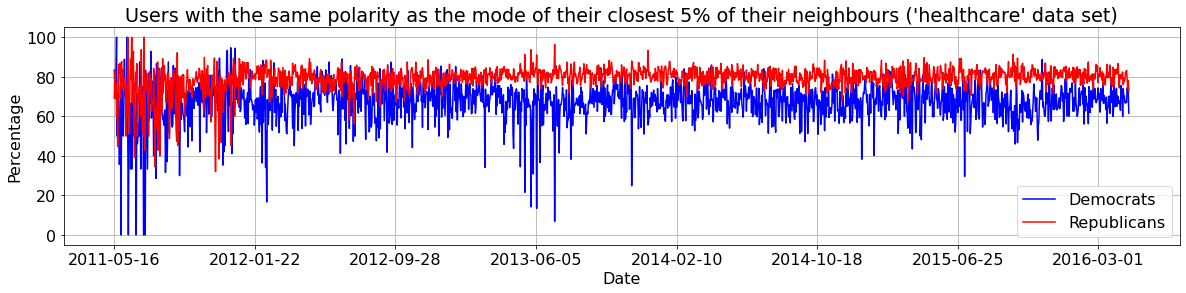

In [67]:
idx  = []
pidx = []
for i in range(0, 1805, 250): 
    idx.append(i)
    pidx.append(i + 606)

plt.figure(figsize = (20, 4))
plt.rcParams.update({'font.size': 16})
plt.plot(100 * np.array(perc_d_agg[3]), label = 'Democrats', color = 'b')
plt.plot(100 * np.array(perc_r_agg[3]), label = 'Republicans', color = 'r')
plt.xticks(ticks = idx, labels = np.array(pickle_idx)[pidx])
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Users with the same polarity as the mode of their closest 5% of their neighbours ('healthcare' data set)")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_hc_perc_top5.png", bbox_inches = 'tight')

In [68]:
corr_agg   = np.array(corr_agg)
perc_d_agg = np.array(perc_d_agg)
perc_r_agg = np.array(perc_r_agg)

print("=" * 50)
print("For correlations:")
for i, j in zip(corr_agg, perc_neighbours):
    print("k = {}:".format(j))
    ii = i[~np.isnan(i)]
    print("mean: {}".format(ii.mean()))
    print("std:  {}".format(ii.std()))
    print("mean +/- std:  {}".format(1 - (len(ii[ii > ii.mean() + ii.std()]) + len(ii[ii < ii.mean() - ii.std()])) / len(ii)))
    print("mean +/- 2std: {}".format(1 - (len(ii[ii > ii.mean() + 2 * ii.std()]) + len(ii[ii < ii.mean() - 2 * ii.std()])) / len(ii)))
    print("mean +/- 3std: {}".format(1 - (len(ii[ii > ii.mean() + 3 * ii.std()]) + len(ii[ii < ii.mean() - 3 * ii.std()])) / len(ii)))   
    
print("=" * 50)
print("For Democratic neighbourhood percentages:")
for i, j in zip(perc_d_agg, perc_neighbours):
    print("k = {}:".format(j))
    ii = i[~np.isnan(i)]
    print("mean: {}".format(ii.mean()))
    print("std:  {}".format(ii.std()))
    print("mean +/- std:  {}".format(1 - (len(ii[ii > ii.mean() + ii.std()]) + len(ii[ii < ii.mean() - ii.std()])) / len(ii)))
    print("mean +/- 2std: {}".format(1 - (len(ii[ii > ii.mean() + 2 * ii.std()]) + len(ii[ii < ii.mean() - 2 * ii.std()])) / len(ii)))
    print("mean +/- 3std: {}".format(1 - (len(ii[ii > ii.mean() + 3 * ii.std()]) + len(ii[ii < ii.mean() - 3 * ii.std()])) / len(ii)))  
    
print("=" * 50)
print("For Republican neighbourhood percentages:")
for i, j in zip(perc_r_agg, perc_neighbours):
    print("k = {}:".format(j))
    ii = i[~np.isnan(i)]
    print("mean: {}".format(ii.mean()))
    print("std:  {}".format(ii.std()))
    print("mean +/- std:  {}".format(1 - (len(ii[ii > ii.mean() + ii.std()]) + len(ii[ii < ii.mean() - ii.std()])) / len(ii)))
    print("mean +/- 2std: {}".format(1 - (len(ii[ii > ii.mean() + 2 * ii.std()]) + len(ii[ii < ii.mean() - 2 * ii.std()])) / len(ii)))
    print("mean +/- 3std: {}".format(1 - (len(ii[ii > ii.mean() + 3 * ii.std()]) + len(ii[ii < ii.mean() - 3 * ii.std()])) / len(ii)))  

For correlations:
k = 0.01:
mean: 0.42276732557298957
std:  0.11072373957182272
mean +/- std:  0.79490022172949
mean +/- 2std: 0.9534368070953437
mean +/- 3std: 0.9817073170731707
k = 0.02:
mean: 0.45115065996591935
std:  0.10759327169988649
mean +/- std:  0.8181818181818181
mean +/- 2std: 0.9517738359201774
mean +/- 3std: 0.9805986696230599
k = 0.03:
mean: 0.45843775586874047
std:  0.10760869548308102
mean +/- std:  0.8303769401330376
mean +/- 2std: 0.9506651884700665
mean +/- 3std: 0.9778270509977827
k = 0.05:
mean: 0.46119100600712604
std:  0.10321728011319227
mean +/- std:  0.8203991130820399
mean +/- 2std: 0.9545454545454546
mean +/- 3std: 0.9805986696230599
k = 0.1:
mean: 0.46988324851871993
std:  0.09566941016734977
mean +/- std:  0.8358291735995563
mean +/- 2std: 0.9600665557404326
mean +/- 3std: 0.9839156960621187
k = 0.15:
mean: 0.4755396314726209
std:  0.09972439526006648
mean +/- std:  0.8641153632834165
mean +/- 2std: 0.9600665557404326
mean +/- 3std: 0.9794786466999446
k 

In [395]:
# heatmaps for correlations between various k values
plt.figure(figsize = (6, 5))
sns.heatmap(pd.DataFrame(corr_agg).T.rename(columns = {0: "1%", 1: "2%", 2: "3%", 3: "5%", 4: "10%", 5: "15%", 6: "20%"}).corr())

plt.savefig("../plots/obamacare_daily/corr_heatmap.png")
plt.close()

plt.figure(figsize = (6, 5))
sns.heatmap(pd.DataFrame(perc_d_agg).T.rename(columns = {0: "1%", 1: "2%", 2: "3%", 3: "5%", 4: "10%", 5: "15%", 6: "20%"}).corr())

plt.savefig("../plots/obamacare_daily/perc_d_heatmap.png")
plt.close()

plt.figure(figsize = (6, 5))
sns.heatmap(pd.DataFrame(perc_r_agg).T.rename(columns = {0: "1%", 1: "2%", 2: "3%", 3: "5%", 4: "10%", 5: "15%", 6: "20%"}).corr())

plt.savefig("../plots/obamacare_daily/perc_r_heatmap.png")
plt.close()

### Correlation / percentage rings

In [510]:
# get rings around the point of interest
perc_inner_ring = [0.01, 0.02, 0.03, 0.05, 0.10, 0.15, 0.20]
perc_outer_ring = [0.02, 0.03, 0.05, 0.10, 0.15, 0.20, 0.25]
corr_rings   = []
perc_d_rings = []
perc_r_rings = []
for inner, outer in zip(perc_inner_ring, perc_outer_ring):
    print("At ring {} - {}".format(inner, outer))
    
    corr   = []
    perc_d = []
    perc_r = []
    for j in range(774, len(ordered_pickle_files_)):

        print("Running for embedding {}/{}".format(j, len(ordered_pickle_files_)))

        # read the embeddings
        with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j]), "rb") as pickle_file:
            _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)    

        # compute the distance matrix
        distance = squareform(pdist(xy_pairs[nonzero_idx[j]]))
        distance = distance + distance.max() * 100 * np.identity(len(distance))

        # determine the mode polarity of the closest k nodes
        polarity_daily = []
        polarity_d     = []
        polarity_r     = []
        
        # get k
        k_inner = int(np.round(inner * len(nonzero_idx[j])))
        k_outer = int(np.round(outer * len(nonzero_idx[j])))
        if k_inner == 0:
            k_inner = 1
        if k_outer == 0:
            k_outer = k_inner + 1
        if k_outer == k_inner:
            k_outer = k_inner + 1
        for i in range(0, len(distance)):
            p = mode(polarities.loc[nonzero_idx[j][distance[i].argsort()[k_inner:k_outer]], 'Class'])[0][0]
            polarity_daily.append(p)

            if polarities.loc[nonzero_idx[j][i], 'Class'] == 0.0:
                polarity_d.append(p)

            else:
                polarity_r.append(p)

        # compute the correlation for the active users; 
        _corr, _ = pearsonr(polarities.loc[nonzero_idx[j], 'Class'], polarity_daily)
        corr.append(_corr)

        # get the percentage of nodes that are mostly surrounded by same-minded nodes
        perc_d.append(1 - np.sum(polarity_d) / len(polarity_d))
        perc_r.append(np.sum(polarity_r) / len(polarity_r))
        
    corr_rings.append(corr)
    perc_d_rings.append(perc_d)
    perc_r_rings.append(perc_r)

At ring 0.01 - 0.02
Running for embedding 774/2579
Running for embedding 775/2579
Running for embedding 776/2579
Running for embedding 777/2579
Running for embedding 778/2579
Running for embedding 779/2579
Running for embedding 780/2579
Running for embedding 781/2579
Running for embedding 782/2579
Running for embedding 783/2579
Running for embedding 784/2579
Running for embedding 785/2579
Running for embedding 786/2579
Running for embedding 787/2579
Running for embedding 788/2579
Running for embedding 789/2579
Running for embedding 790/2579
Running for embedding 791/2579
Running for embedding 792/2579
Running for embedding 793/2579
Running for embedding 794/2579
Running for embedding 795/2579
Running for embedding 796/2579
Running for embedding 797/2579
Running for embedding 798/2579
Running for embedding 799/2579
Running for embedding 800/2579
Running for embedding 801/2579
Running for embedding 802/2579
Running for embedding 803/2579
Running for embedding 804/2579
Running for embeddi

/home/adc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


Running for embedding 833/2579
Running for embedding 834/2579
Running for embedding 835/2579
Running for embedding 836/2579
Running for embedding 837/2579
Running for embedding 838/2579
Running for embedding 839/2579
Running for embedding 840/2579
Running for embedding 841/2579
Running for embedding 842/2579
Running for embedding 843/2579
Running for embedding 844/2579
Running for embedding 845/2579
Running for embedding 846/2579
Running for embedding 847/2579
Running for embedding 848/2579
Running for embedding 849/2579
Running for embedding 850/2579
Running for embedding 851/2579
Running for embedding 852/2579
Running for embedding 853/2579
Running for embedding 854/2579
Running for embedding 855/2579
Running for embedding 856/2579
Running for embedding 857/2579
Running for embedding 858/2579
Running for embedding 859/2579
Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running 

Running for embedding 1095/2579
Running for embedding 1096/2579
Running for embedding 1097/2579
Running for embedding 1098/2579
Running for embedding 1099/2579
Running for embedding 1100/2579
Running for embedding 1101/2579
Running for embedding 1102/2579
Running for embedding 1103/2579
Running for embedding 1104/2579
Running for embedding 1105/2579
Running for embedding 1106/2579
Running for embedding 1107/2579
Running for embedding 1108/2579
Running for embedding 1109/2579
Running for embedding 1110/2579
Running for embedding 1111/2579
Running for embedding 1112/2579
Running for embedding 1113/2579
Running for embedding 1114/2579
Running for embedding 1115/2579
Running for embedding 1116/2579
Running for embedding 1117/2579
Running for embedding 1118/2579
Running for embedding 1119/2579
Running for embedding 1120/2579
Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running 

Running for embedding 1352/2579
Running for embedding 1353/2579
Running for embedding 1354/2579
Running for embedding 1355/2579
Running for embedding 1356/2579
Running for embedding 1357/2579
Running for embedding 1358/2579
Running for embedding 1359/2579
Running for embedding 1360/2579
Running for embedding 1361/2579
Running for embedding 1362/2579
Running for embedding 1363/2579
Running for embedding 1364/2579
Running for embedding 1365/2579
Running for embedding 1366/2579
Running for embedding 1367/2579
Running for embedding 1368/2579
Running for embedding 1369/2579
Running for embedding 1370/2579
Running for embedding 1371/2579
Running for embedding 1372/2579
Running for embedding 1373/2579
Running for embedding 1374/2579
Running for embedding 1375/2579
Running for embedding 1376/2579
Running for embedding 1377/2579
Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running 

Running for embedding 1609/2579
Running for embedding 1610/2579
Running for embedding 1611/2579
Running for embedding 1612/2579
Running for embedding 1613/2579
Running for embedding 1614/2579
Running for embedding 1615/2579
Running for embedding 1616/2579
Running for embedding 1617/2579
Running for embedding 1618/2579
Running for embedding 1619/2579
Running for embedding 1620/2579
Running for embedding 1621/2579
Running for embedding 1622/2579
Running for embedding 1623/2579
Running for embedding 1624/2579
Running for embedding 1625/2579
Running for embedding 1626/2579
Running for embedding 1627/2579
Running for embedding 1628/2579
Running for embedding 1629/2579
Running for embedding 1630/2579
Running for embedding 1631/2579
Running for embedding 1632/2579
Running for embedding 1633/2579
Running for embedding 1634/2579
Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running 

Running for embedding 1866/2579
Running for embedding 1867/2579
Running for embedding 1868/2579
Running for embedding 1869/2579
Running for embedding 1870/2579
Running for embedding 1871/2579
Running for embedding 1872/2579
Running for embedding 1873/2579
Running for embedding 1874/2579
Running for embedding 1875/2579
Running for embedding 1876/2579
Running for embedding 1877/2579
Running for embedding 1878/2579
Running for embedding 1879/2579
Running for embedding 1880/2579
Running for embedding 1881/2579
Running for embedding 1882/2579
Running for embedding 1883/2579
Running for embedding 1884/2579
Running for embedding 1885/2579
Running for embedding 1886/2579
Running for embedding 1887/2579
Running for embedding 1888/2579
Running for embedding 1889/2579
Running for embedding 1890/2579
Running for embedding 1891/2579
Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running 

Running for embedding 2124/2579
Running for embedding 2125/2579
Running for embedding 2126/2579
Running for embedding 2127/2579
Running for embedding 2128/2579
Running for embedding 2129/2579
Running for embedding 2130/2579
Running for embedding 2131/2579
Running for embedding 2132/2579
Running for embedding 2133/2579
Running for embedding 2134/2579
Running for embedding 2135/2579
Running for embedding 2136/2579
Running for embedding 2137/2579
Running for embedding 2138/2579
Running for embedding 2139/2579
Running for embedding 2140/2579
Running for embedding 2141/2579
Running for embedding 2142/2579
Running for embedding 2143/2579
Running for embedding 2144/2579
Running for embedding 2145/2579
Running for embedding 2146/2579
Running for embedding 2147/2579
Running for embedding 2148/2579
Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running 

Running for embedding 2381/2579
Running for embedding 2382/2579
Running for embedding 2383/2579
Running for embedding 2384/2579
Running for embedding 2385/2579
Running for embedding 2386/2579
Running for embedding 2387/2579
Running for embedding 2388/2579
Running for embedding 2389/2579
Running for embedding 2390/2579
Running for embedding 2391/2579
Running for embedding 2392/2579
Running for embedding 2393/2579
Running for embedding 2394/2579
Running for embedding 2395/2579
Running for embedding 2396/2579
Running for embedding 2397/2579
Running for embedding 2398/2579
Running for embedding 2399/2579
Running for embedding 2400/2579
Running for embedding 2401/2579
Running for embedding 2402/2579
Running for embedding 2403/2579
Running for embedding 2404/2579
Running for embedding 2405/2579
Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running 

Running for embedding 838/2579
Running for embedding 839/2579
Running for embedding 840/2579
Running for embedding 841/2579
Running for embedding 842/2579
Running for embedding 843/2579
Running for embedding 844/2579
Running for embedding 845/2579
Running for embedding 846/2579
Running for embedding 847/2579
Running for embedding 848/2579
Running for embedding 849/2579
Running for embedding 850/2579
Running for embedding 851/2579
Running for embedding 852/2579
Running for embedding 853/2579
Running for embedding 854/2579
Running for embedding 855/2579
Running for embedding 856/2579
Running for embedding 857/2579
Running for embedding 858/2579
Running for embedding 859/2579
Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running 

Running for embedding 1101/2579
Running for embedding 1102/2579
Running for embedding 1103/2579
Running for embedding 1104/2579
Running for embedding 1105/2579
Running for embedding 1106/2579
Running for embedding 1107/2579
Running for embedding 1108/2579
Running for embedding 1109/2579
Running for embedding 1110/2579
Running for embedding 1111/2579
Running for embedding 1112/2579
Running for embedding 1113/2579
Running for embedding 1114/2579
Running for embedding 1115/2579
Running for embedding 1116/2579
Running for embedding 1117/2579
Running for embedding 1118/2579
Running for embedding 1119/2579
Running for embedding 1120/2579
Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running 

Running for embedding 1358/2579
Running for embedding 1359/2579
Running for embedding 1360/2579
Running for embedding 1361/2579
Running for embedding 1362/2579
Running for embedding 1363/2579
Running for embedding 1364/2579
Running for embedding 1365/2579
Running for embedding 1366/2579
Running for embedding 1367/2579
Running for embedding 1368/2579
Running for embedding 1369/2579
Running for embedding 1370/2579
Running for embedding 1371/2579
Running for embedding 1372/2579
Running for embedding 1373/2579
Running for embedding 1374/2579
Running for embedding 1375/2579
Running for embedding 1376/2579
Running for embedding 1377/2579
Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running 

Running for embedding 1615/2579
Running for embedding 1616/2579
Running for embedding 1617/2579
Running for embedding 1618/2579
Running for embedding 1619/2579
Running for embedding 1620/2579
Running for embedding 1621/2579
Running for embedding 1622/2579
Running for embedding 1623/2579
Running for embedding 1624/2579
Running for embedding 1625/2579
Running for embedding 1626/2579
Running for embedding 1627/2579
Running for embedding 1628/2579
Running for embedding 1629/2579
Running for embedding 1630/2579
Running for embedding 1631/2579
Running for embedding 1632/2579
Running for embedding 1633/2579
Running for embedding 1634/2579
Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running 

Running for embedding 1872/2579
Running for embedding 1873/2579
Running for embedding 1874/2579
Running for embedding 1875/2579
Running for embedding 1876/2579
Running for embedding 1877/2579
Running for embedding 1878/2579
Running for embedding 1879/2579
Running for embedding 1880/2579
Running for embedding 1881/2579
Running for embedding 1882/2579
Running for embedding 1883/2579
Running for embedding 1884/2579
Running for embedding 1885/2579
Running for embedding 1886/2579
Running for embedding 1887/2579
Running for embedding 1888/2579
Running for embedding 1889/2579
Running for embedding 1890/2579
Running for embedding 1891/2579
Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running 

Running for embedding 2130/2579
Running for embedding 2131/2579
Running for embedding 2132/2579
Running for embedding 2133/2579
Running for embedding 2134/2579
Running for embedding 2135/2579
Running for embedding 2136/2579
Running for embedding 2137/2579
Running for embedding 2138/2579
Running for embedding 2139/2579
Running for embedding 2140/2579
Running for embedding 2141/2579
Running for embedding 2142/2579
Running for embedding 2143/2579
Running for embedding 2144/2579
Running for embedding 2145/2579
Running for embedding 2146/2579
Running for embedding 2147/2579
Running for embedding 2148/2579
Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running 

Running for embedding 2387/2579
Running for embedding 2388/2579
Running for embedding 2389/2579
Running for embedding 2390/2579
Running for embedding 2391/2579
Running for embedding 2392/2579
Running for embedding 2393/2579
Running for embedding 2394/2579
Running for embedding 2395/2579
Running for embedding 2396/2579
Running for embedding 2397/2579
Running for embedding 2398/2579
Running for embedding 2399/2579
Running for embedding 2400/2579
Running for embedding 2401/2579
Running for embedding 2402/2579
Running for embedding 2403/2579
Running for embedding 2404/2579
Running for embedding 2405/2579
Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running 

Running for embedding 840/2579
Running for embedding 841/2579
Running for embedding 842/2579
Running for embedding 843/2579
Running for embedding 844/2579
Running for embedding 845/2579
Running for embedding 846/2579
Running for embedding 847/2579
Running for embedding 848/2579
Running for embedding 849/2579
Running for embedding 850/2579
Running for embedding 851/2579
Running for embedding 852/2579
Running for embedding 853/2579
Running for embedding 854/2579
Running for embedding 855/2579
Running for embedding 856/2579
Running for embedding 857/2579
Running for embedding 858/2579
Running for embedding 859/2579
Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running 

Running for embedding 1104/2579
Running for embedding 1105/2579
Running for embedding 1106/2579
Running for embedding 1107/2579
Running for embedding 1108/2579
Running for embedding 1109/2579
Running for embedding 1110/2579
Running for embedding 1111/2579
Running for embedding 1112/2579
Running for embedding 1113/2579
Running for embedding 1114/2579
Running for embedding 1115/2579
Running for embedding 1116/2579
Running for embedding 1117/2579
Running for embedding 1118/2579
Running for embedding 1119/2579
Running for embedding 1120/2579
Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running 

Running for embedding 1361/2579
Running for embedding 1362/2579
Running for embedding 1363/2579
Running for embedding 1364/2579
Running for embedding 1365/2579
Running for embedding 1366/2579
Running for embedding 1367/2579
Running for embedding 1368/2579
Running for embedding 1369/2579
Running for embedding 1370/2579
Running for embedding 1371/2579
Running for embedding 1372/2579
Running for embedding 1373/2579
Running for embedding 1374/2579
Running for embedding 1375/2579
Running for embedding 1376/2579
Running for embedding 1377/2579
Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running 

Running for embedding 1618/2579
Running for embedding 1619/2579
Running for embedding 1620/2579
Running for embedding 1621/2579
Running for embedding 1622/2579
Running for embedding 1623/2579
Running for embedding 1624/2579
Running for embedding 1625/2579
Running for embedding 1626/2579
Running for embedding 1627/2579
Running for embedding 1628/2579
Running for embedding 1629/2579
Running for embedding 1630/2579
Running for embedding 1631/2579
Running for embedding 1632/2579
Running for embedding 1633/2579
Running for embedding 1634/2579
Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running 

Running for embedding 1875/2579
Running for embedding 1876/2579
Running for embedding 1877/2579
Running for embedding 1878/2579
Running for embedding 1879/2579
Running for embedding 1880/2579
Running for embedding 1881/2579
Running for embedding 1882/2579
Running for embedding 1883/2579
Running for embedding 1884/2579
Running for embedding 1885/2579
Running for embedding 1886/2579
Running for embedding 1887/2579
Running for embedding 1888/2579
Running for embedding 1889/2579
Running for embedding 1890/2579
Running for embedding 1891/2579
Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running 

Running for embedding 2132/2579
Running for embedding 2133/2579
Running for embedding 2134/2579
Running for embedding 2135/2579
Running for embedding 2136/2579
Running for embedding 2137/2579
Running for embedding 2138/2579
Running for embedding 2139/2579
Running for embedding 2140/2579
Running for embedding 2141/2579
Running for embedding 2142/2579
Running for embedding 2143/2579
Running for embedding 2144/2579
Running for embedding 2145/2579
Running for embedding 2146/2579
Running for embedding 2147/2579
Running for embedding 2148/2579
Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running 

Running for embedding 2390/2579
Running for embedding 2391/2579
Running for embedding 2392/2579
Running for embedding 2393/2579
Running for embedding 2394/2579
Running for embedding 2395/2579
Running for embedding 2396/2579
Running for embedding 2397/2579
Running for embedding 2398/2579
Running for embedding 2399/2579
Running for embedding 2400/2579
Running for embedding 2401/2579
Running for embedding 2402/2579
Running for embedding 2403/2579
Running for embedding 2404/2579
Running for embedding 2405/2579
Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running 

Running for embedding 845/2579
Running for embedding 846/2579
Running for embedding 847/2579
Running for embedding 848/2579
Running for embedding 849/2579
Running for embedding 850/2579
Running for embedding 851/2579
Running for embedding 852/2579
Running for embedding 853/2579
Running for embedding 854/2579
Running for embedding 855/2579
Running for embedding 856/2579
Running for embedding 857/2579
Running for embedding 858/2579
Running for embedding 859/2579
Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running for embedding 872/2579
Running for embedding 873/2579
Running for embedding 874/2579
Running for embedding 875/2579
Running for embedding 876/2579
Running 

Running for embedding 1108/2579
Running for embedding 1109/2579
Running for embedding 1110/2579
Running for embedding 1111/2579
Running for embedding 1112/2579
Running for embedding 1113/2579
Running for embedding 1114/2579
Running for embedding 1115/2579
Running for embedding 1116/2579
Running for embedding 1117/2579
Running for embedding 1118/2579
Running for embedding 1119/2579
Running for embedding 1120/2579
Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running for embedding 1135/2579
Running for embedding 1136/2579
Running for embedding 1137/2579
Running for embedding 1138/2579
Running 

Running for embedding 1365/2579
Running for embedding 1366/2579
Running for embedding 1367/2579
Running for embedding 1368/2579
Running for embedding 1369/2579
Running for embedding 1370/2579
Running for embedding 1371/2579
Running for embedding 1372/2579
Running for embedding 1373/2579
Running for embedding 1374/2579
Running for embedding 1375/2579
Running for embedding 1376/2579
Running for embedding 1377/2579
Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running for embedding 1392/2579
Running for embedding 1393/2579
Running for embedding 1394/2579
Running for embedding 1395/2579
Running 

Running for embedding 1622/2579
Running for embedding 1623/2579
Running for embedding 1624/2579
Running for embedding 1625/2579
Running for embedding 1626/2579
Running for embedding 1627/2579
Running for embedding 1628/2579
Running for embedding 1629/2579
Running for embedding 1630/2579
Running for embedding 1631/2579
Running for embedding 1632/2579
Running for embedding 1633/2579
Running for embedding 1634/2579
Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running for embedding 1649/2579
Running for embedding 1650/2579
Running for embedding 1651/2579
Running for embedding 1652/2579
Running 

Running for embedding 1880/2579
Running for embedding 1881/2579
Running for embedding 1882/2579
Running for embedding 1883/2579
Running for embedding 1884/2579
Running for embedding 1885/2579
Running for embedding 1886/2579
Running for embedding 1887/2579
Running for embedding 1888/2579
Running for embedding 1889/2579
Running for embedding 1890/2579
Running for embedding 1891/2579
Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running for embedding 1906/2579
Running for embedding 1907/2579
Running for embedding 1908/2579
Running for embedding 1909/2579
Running for embedding 1910/2579
Running 

Running for embedding 2138/2579
Running for embedding 2139/2579
Running for embedding 2140/2579
Running for embedding 2141/2579
Running for embedding 2142/2579
Running for embedding 2143/2579
Running for embedding 2144/2579
Running for embedding 2145/2579
Running for embedding 2146/2579
Running for embedding 2147/2579
Running for embedding 2148/2579
Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running for embedding 2163/2579
Running for embedding 2164/2579
Running for embedding 2165/2579
Running for embedding 2166/2579
Running for embedding 2167/2579
Running for embedding 2168/2579
Running 

Running for embedding 2396/2579
Running for embedding 2397/2579
Running for embedding 2398/2579
Running for embedding 2399/2579
Running for embedding 2400/2579
Running for embedding 2401/2579
Running for embedding 2402/2579
Running for embedding 2403/2579
Running for embedding 2404/2579
Running for embedding 2405/2579
Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running for embedding 2421/2579
Running for embedding 2422/2579
Running for embedding 2423/2579
Running for embedding 2424/2579
Running for embedding 2425/2579
Running for embedding 2426/2579
Running 

Running for embedding 857/2579
Running for embedding 858/2579
Running for embedding 859/2579
Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running for embedding 872/2579
Running for embedding 873/2579
Running for embedding 874/2579
Running for embedding 875/2579
Running for embedding 876/2579
Running for embedding 877/2579
Running for embedding 878/2579
Running for embedding 879/2579
Running for embedding 880/2579
Running for embedding 881/2579
Running for embedding 882/2579
Running for embedding 883/2579
Running for embedding 884/2579
Running for embedding 885/2579
Running for embedding 886/2579
Running for embedding 887/2579
Running for embedding 888/2579
Running 

Running for embedding 1119/2579
Running for embedding 1120/2579
Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running for embedding 1135/2579
Running for embedding 1136/2579
Running for embedding 1137/2579
Running for embedding 1138/2579
Running for embedding 1139/2579
Running for embedding 1140/2579
Running for embedding 1141/2579
Running for embedding 1142/2579
Running for embedding 1143/2579
Running for embedding 1144/2579
Running for embedding 1145/2579
Running for embedding 1146/2579
Running for embedding 1147/2579
Running for embedding 1148/2579
Running for embedding 1149/2579
Running 

Running for embedding 1376/2579
Running for embedding 1377/2579
Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running for embedding 1392/2579
Running for embedding 1393/2579
Running for embedding 1394/2579
Running for embedding 1395/2579
Running for embedding 1396/2579
Running for embedding 1397/2579
Running for embedding 1398/2579
Running for embedding 1399/2579
Running for embedding 1400/2579
Running for embedding 1401/2579
Running for embedding 1402/2579
Running for embedding 1403/2579
Running for embedding 1404/2579
Running for embedding 1405/2579
Running for embedding 1406/2579
Running 

Running for embedding 1633/2579
Running for embedding 1634/2579
Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running for embedding 1649/2579
Running for embedding 1650/2579
Running for embedding 1651/2579
Running for embedding 1652/2579
Running for embedding 1653/2579
Running for embedding 1654/2579
Running for embedding 1655/2579
Running for embedding 1656/2579
Running for embedding 1657/2579
Running for embedding 1658/2579
Running for embedding 1659/2579
Running for embedding 1660/2579
Running for embedding 1661/2579
Running for embedding 1662/2579
Running for embedding 1663/2579
Running 

Running for embedding 1890/2579
Running for embedding 1891/2579
Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running for embedding 1906/2579
Running for embedding 1907/2579
Running for embedding 1908/2579
Running for embedding 1909/2579
Running for embedding 1910/2579
Running for embedding 1911/2579
Running for embedding 1912/2579
Running for embedding 1913/2579
Running for embedding 1914/2579
Running for embedding 1915/2579
Running for embedding 1916/2579
Running for embedding 1917/2579
Running for embedding 1918/2579
Running for embedding 1919/2579
Running for embedding 1920/2579
Running 

Running for embedding 2147/2579
Running for embedding 2148/2579
Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running for embedding 2163/2579
Running for embedding 2164/2579
Running for embedding 2165/2579
Running for embedding 2166/2579
Running for embedding 2167/2579
Running for embedding 2168/2579
Running for embedding 2169/2579
Running for embedding 2170/2579
Running for embedding 2171/2579
Running for embedding 2172/2579
Running for embedding 2173/2579
Running for embedding 2174/2579
Running for embedding 2175/2579
Running for embedding 2176/2579
Running for embedding 2177/2579
Running 

Running for embedding 2404/2579
Running for embedding 2405/2579
Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running for embedding 2421/2579
Running for embedding 2422/2579
Running for embedding 2423/2579
Running for embedding 2424/2579
Running for embedding 2425/2579
Running for embedding 2426/2579
Running for embedding 2427/2579
Running for embedding 2428/2579
Running for embedding 2429/2579
Running for embedding 2430/2579
Running for embedding 2431/2579
Running for embedding 2432/2579
Running for embedding 2433/2579
Running for embedding 2434/2579
Running 

Running for embedding 860/2579
Running for embedding 861/2579
Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running for embedding 872/2579
Running for embedding 873/2579
Running for embedding 874/2579
Running for embedding 875/2579
Running for embedding 876/2579
Running for embedding 877/2579
Running for embedding 878/2579
Running for embedding 879/2579
Running for embedding 880/2579
Running for embedding 881/2579
Running for embedding 882/2579
Running for embedding 883/2579
Running for embedding 884/2579
Running for embedding 885/2579
Running for embedding 886/2579
Running for embedding 887/2579
Running for embedding 888/2579
Running for embedding 889/2579
Running for embedding 890/2579
Running for embedding 891/2579
Running 

Running for embedding 1121/2579
Running for embedding 1122/2579
Running for embedding 1123/2579
Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running for embedding 1135/2579
Running for embedding 1136/2579
Running for embedding 1137/2579
Running for embedding 1138/2579
Running for embedding 1139/2579
Running for embedding 1140/2579
Running for embedding 1141/2579
Running for embedding 1142/2579
Running for embedding 1143/2579
Running for embedding 1144/2579
Running for embedding 1145/2579
Running for embedding 1146/2579
Running for embedding 1147/2579
Running for embedding 1148/2579
Running for embedding 1149/2579
Running for embedding 1150/2579
Running for embedding 1151/2579
Running 

Running for embedding 1378/2579
Running for embedding 1379/2579
Running for embedding 1380/2579
Running for embedding 1381/2579
Running for embedding 1382/2579
Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running for embedding 1392/2579
Running for embedding 1393/2579
Running for embedding 1394/2579
Running for embedding 1395/2579
Running for embedding 1396/2579
Running for embedding 1397/2579
Running for embedding 1398/2579
Running for embedding 1399/2579
Running for embedding 1400/2579
Running for embedding 1401/2579
Running for embedding 1402/2579
Running for embedding 1403/2579
Running for embedding 1404/2579
Running for embedding 1405/2579
Running for embedding 1406/2579
Running for embedding 1407/2579
Running for embedding 1408/2579
Running 

Running for embedding 1635/2579
Running for embedding 1636/2579
Running for embedding 1637/2579
Running for embedding 1638/2579
Running for embedding 1639/2579
Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running for embedding 1649/2579
Running for embedding 1650/2579
Running for embedding 1651/2579
Running for embedding 1652/2579
Running for embedding 1653/2579
Running for embedding 1654/2579
Running for embedding 1655/2579
Running for embedding 1656/2579
Running for embedding 1657/2579
Running for embedding 1658/2579
Running for embedding 1659/2579
Running for embedding 1660/2579
Running for embedding 1661/2579
Running for embedding 1662/2579
Running for embedding 1663/2579
Running for embedding 1664/2579
Running for embedding 1665/2579
Running 

Running for embedding 1892/2579
Running for embedding 1893/2579
Running for embedding 1894/2579
Running for embedding 1895/2579
Running for embedding 1896/2579
Running for embedding 1897/2579
Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running for embedding 1906/2579
Running for embedding 1907/2579
Running for embedding 1908/2579
Running for embedding 1909/2579
Running for embedding 1910/2579
Running for embedding 1911/2579
Running for embedding 1912/2579
Running for embedding 1913/2579
Running for embedding 1914/2579
Running for embedding 1915/2579
Running for embedding 1916/2579
Running for embedding 1917/2579
Running for embedding 1918/2579
Running for embedding 1919/2579
Running for embedding 1920/2579
Running for embedding 1921/2579
Running for embedding 1922/2579
Running 

Running for embedding 2149/2579
Running for embedding 2150/2579
Running for embedding 2151/2579
Running for embedding 2152/2579
Running for embedding 2153/2579
Running for embedding 2154/2579
Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running for embedding 2163/2579
Running for embedding 2164/2579
Running for embedding 2165/2579
Running for embedding 2166/2579
Running for embedding 2167/2579
Running for embedding 2168/2579
Running for embedding 2169/2579
Running for embedding 2170/2579
Running for embedding 2171/2579
Running for embedding 2172/2579
Running for embedding 2173/2579
Running for embedding 2174/2579
Running for embedding 2175/2579
Running for embedding 2176/2579
Running for embedding 2177/2579
Running for embedding 2178/2579
Running for embedding 2179/2579
Running 

Running for embedding 2406/2579
Running for embedding 2407/2579
Running for embedding 2408/2579
Running for embedding 2409/2579
Running for embedding 2410/2579
Running for embedding 2411/2579
Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running for embedding 2421/2579
Running for embedding 2422/2579
Running for embedding 2423/2579
Running for embedding 2424/2579
Running for embedding 2425/2579
Running for embedding 2426/2579
Running for embedding 2427/2579
Running for embedding 2428/2579
Running for embedding 2429/2579
Running for embedding 2430/2579
Running for embedding 2431/2579
Running for embedding 2432/2579
Running for embedding 2433/2579
Running for embedding 2434/2579
Running for embedding 2435/2579
Running for embedding 2436/2579
Running 

Running for embedding 862/2579
Running for embedding 863/2579
Running for embedding 864/2579
Running for embedding 865/2579
Running for embedding 866/2579
Running for embedding 867/2579
Running for embedding 868/2579
Running for embedding 869/2579
Running for embedding 870/2579
Running for embedding 871/2579
Running for embedding 872/2579
Running for embedding 873/2579
Running for embedding 874/2579
Running for embedding 875/2579
Running for embedding 876/2579
Running for embedding 877/2579
Running for embedding 878/2579
Running for embedding 879/2579
Running for embedding 880/2579
Running for embedding 881/2579
Running for embedding 882/2579
Running for embedding 883/2579
Running for embedding 884/2579
Running for embedding 885/2579
Running for embedding 886/2579
Running for embedding 887/2579
Running for embedding 888/2579
Running for embedding 889/2579
Running for embedding 890/2579
Running for embedding 891/2579
Running for embedding 892/2579
Running for embedding 893/2579
Running 

Running for embedding 1124/2579
Running for embedding 1125/2579
Running for embedding 1126/2579
Running for embedding 1127/2579
Running for embedding 1128/2579
Running for embedding 1129/2579
Running for embedding 1130/2579
Running for embedding 1131/2579
Running for embedding 1132/2579
Running for embedding 1133/2579
Running for embedding 1134/2579
Running for embedding 1135/2579
Running for embedding 1136/2579
Running for embedding 1137/2579
Running for embedding 1138/2579
Running for embedding 1139/2579
Running for embedding 1140/2579
Running for embedding 1141/2579
Running for embedding 1142/2579
Running for embedding 1143/2579
Running for embedding 1144/2579
Running for embedding 1145/2579
Running for embedding 1146/2579
Running for embedding 1147/2579
Running for embedding 1148/2579
Running for embedding 1149/2579
Running for embedding 1150/2579
Running for embedding 1151/2579
Running for embedding 1152/2579
Running for embedding 1153/2579
Running for embedding 1154/2579
Running 

Running for embedding 1383/2579
Running for embedding 1384/2579
Running for embedding 1385/2579
Running for embedding 1386/2579
Running for embedding 1387/2579
Running for embedding 1388/2579
Running for embedding 1389/2579
Running for embedding 1390/2579
Running for embedding 1391/2579
Running for embedding 1392/2579
Running for embedding 1393/2579
Running for embedding 1394/2579
Running for embedding 1395/2579
Running for embedding 1396/2579
Running for embedding 1397/2579
Running for embedding 1398/2579
Running for embedding 1399/2579
Running for embedding 1400/2579
Running for embedding 1401/2579
Running for embedding 1402/2579
Running for embedding 1403/2579
Running for embedding 1404/2579
Running for embedding 1405/2579
Running for embedding 1406/2579
Running for embedding 1407/2579
Running for embedding 1408/2579
Running for embedding 1409/2579
Running for embedding 1410/2579
Running for embedding 1411/2579
Running for embedding 1412/2579
Running for embedding 1413/2579
Running 

Running for embedding 1640/2579
Running for embedding 1641/2579
Running for embedding 1642/2579
Running for embedding 1643/2579
Running for embedding 1644/2579
Running for embedding 1645/2579
Running for embedding 1646/2579
Running for embedding 1647/2579
Running for embedding 1648/2579
Running for embedding 1649/2579
Running for embedding 1650/2579
Running for embedding 1651/2579
Running for embedding 1652/2579
Running for embedding 1653/2579
Running for embedding 1654/2579
Running for embedding 1655/2579
Running for embedding 1656/2579
Running for embedding 1657/2579
Running for embedding 1658/2579
Running for embedding 1659/2579
Running for embedding 1660/2579
Running for embedding 1661/2579
Running for embedding 1662/2579
Running for embedding 1663/2579
Running for embedding 1664/2579
Running for embedding 1665/2579
Running for embedding 1666/2579
Running for embedding 1667/2579
Running for embedding 1668/2579
Running for embedding 1669/2579
Running for embedding 1670/2579
Running 

Running for embedding 1898/2579
Running for embedding 1899/2579
Running for embedding 1900/2579
Running for embedding 1901/2579
Running for embedding 1902/2579
Running for embedding 1903/2579
Running for embedding 1904/2579
Running for embedding 1905/2579
Running for embedding 1906/2579
Running for embedding 1907/2579
Running for embedding 1908/2579
Running for embedding 1909/2579
Running for embedding 1910/2579
Running for embedding 1911/2579
Running for embedding 1912/2579
Running for embedding 1913/2579
Running for embedding 1914/2579
Running for embedding 1915/2579
Running for embedding 1916/2579
Running for embedding 1917/2579
Running for embedding 1918/2579
Running for embedding 1919/2579
Running for embedding 1920/2579
Running for embedding 1921/2579
Running for embedding 1922/2579
Running for embedding 1923/2579
Running for embedding 1924/2579
Running for embedding 1925/2579
Running for embedding 1926/2579
Running for embedding 1927/2579
Running for embedding 1928/2579
Running 

Running for embedding 2155/2579
Running for embedding 2156/2579
Running for embedding 2157/2579
Running for embedding 2158/2579
Running for embedding 2159/2579
Running for embedding 2160/2579
Running for embedding 2161/2579
Running for embedding 2162/2579
Running for embedding 2163/2579
Running for embedding 2164/2579
Running for embedding 2165/2579
Running for embedding 2166/2579
Running for embedding 2167/2579
Running for embedding 2168/2579
Running for embedding 2169/2579
Running for embedding 2170/2579
Running for embedding 2171/2579
Running for embedding 2172/2579
Running for embedding 2173/2579
Running for embedding 2174/2579
Running for embedding 2175/2579
Running for embedding 2176/2579
Running for embedding 2177/2579
Running for embedding 2178/2579
Running for embedding 2179/2579
Running for embedding 2180/2579
Running for embedding 2181/2579
Running for embedding 2182/2579
Running for embedding 2183/2579
Running for embedding 2184/2579
Running for embedding 2185/2579
Running 

Running for embedding 2412/2579
Running for embedding 2413/2579
Running for embedding 2414/2579
Running for embedding 2415/2579
Running for embedding 2416/2579
Running for embedding 2417/2579
Running for embedding 2418/2579
Running for embedding 2419/2579
Running for embedding 2420/2579
Running for embedding 2421/2579
Running for embedding 2422/2579
Running for embedding 2423/2579
Running for embedding 2424/2579
Running for embedding 2425/2579
Running for embedding 2426/2579
Running for embedding 2427/2579
Running for embedding 2428/2579
Running for embedding 2429/2579
Running for embedding 2430/2579
Running for embedding 2431/2579
Running for embedding 2432/2579
Running for embedding 2433/2579
Running for embedding 2434/2579
Running for embedding 2435/2579
Running for embedding 2436/2579
Running for embedding 2437/2579
Running for embedding 2438/2579
Running for embedding 2439/2579
Running for embedding 2440/2579
Running for embedding 2441/2579
Running for embedding 2442/2579
Running 

In [511]:
### Pickle the correlations and the percentages
with open("../pickle/obamacare_daily_active_users_corr_rings.pkl", "wb") as f:
    pkl.dump([corr_rings, perc_d_rings, perc_r_rings], f)

In [69]:
### load the correlations and the percentages
with open("../pickle/obamacare_daily_active_users_corr_rings.pkl", "rb") as f:
    corr_rings, perc_d_rings, perc_r_rings = pkl.load(f)

### Some plots

In [70]:
for i in range(0, len(corr_rings)):
    corr_rings[i] = np.array(corr_rings[i])
    
rings_means = []
rings_stds  = []
for i in range(0, len(corr_agg)):
    rings_means.append(corr_rings[i][~np.isnan(corr_rings[i])].mean())
    rings_stds.append(corr_rings[i][~np.isnan(corr_rings[i])].std())

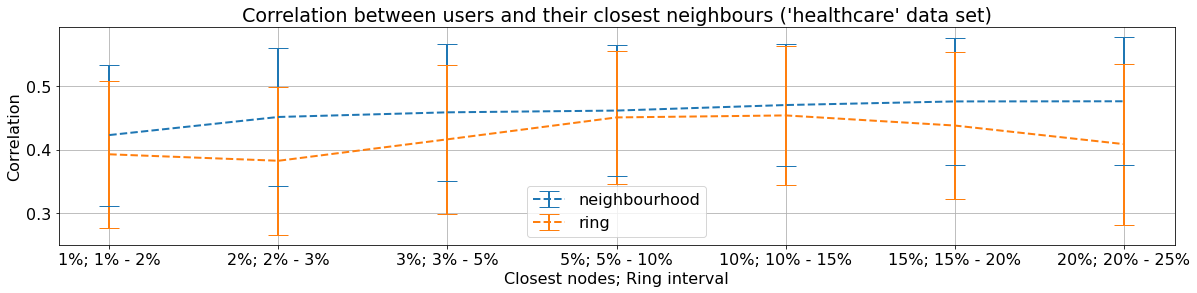

In [71]:
idx  = range(0, 7)
pidx = ["1%; 1% - 2%", "2%; 2% - 3%", "3%; 3% - 5%", "5%; 5% - 10%", "10%; 10% - 15%", "15%; 15% - 20%", "20%; 20% - 25%"]

plt.figure(figsize = (20, 4))
plt.errorbar(range(0, 7), means, stds, linestyle = '--', capsize = 10, linewidth = 2, label = 'neighbourhood')
plt.errorbar(range(0, 7), rings_means, rings_stds, linestyle = '--', capsize = 10, linewidth = 2, label = 'ring')
plt.xticks(ticks = idx, labels = pidx)
plt.title("Correlation between users and their closest neighbours ('healthcare' data set)")
plt.xlabel("Closest nodes; Ring interval")
plt.ylabel("Correlation")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_hc_corr_rings.png", bbox_inches = 'tight')

In [399]:
print(means)
print(rings_means)

print(stds)
print(rings_stds)

[0.42276732557298957, 0.45115065996591935, 0.45843775586874047, 0.46119100600712604, 0.46988324851871993, 0.4755396314726209, 0.47577770187190177]
[0.39256964036223796, 0.3824212482726849, 0.41608427789537866, 0.4504415793172797, 0.4535839602688492, 0.43771589137444467, 0.40855822294049066]
[0.11072373957182272, 0.10759327169988649, 0.10760869548308102, 0.10321728011319227, 0.09566941016734977, 0.09972439526006648, 0.10049897849566553]
[0.1156512846645833, 0.11638121376194853, 0.1165449604532745, 0.10487079913002839, 0.10945163684452022, 0.11469560060706538, 0.12631877450811516]


In [72]:
perc_d_rings = np.array(perc_d_rings)
perc_r_rings = np.array(perc_r_rings)

mean_d = []
std_d  = []

mean_r = []
std_r  = []

ring_mean_d = []
ring_std_d  = []

ring_mean_r = []
ring_std_r  = []
for i in range(0, len(perc_d_agg)):
    mean_d.append(perc_d_agg[i][~np.isnan(perc_d_agg[i])].mean())
    std_d.append(perc_d_agg[i][~np.isnan(perc_d_agg[i])].std())
    
    mean_r.append(perc_r_agg[i][~np.isnan(perc_r_agg[i])].mean())
    std_r.append(perc_r_agg[i][~np.isnan(perc_r_agg[i])].std())
    
    ring_mean_d.append(perc_d_rings[i][~np.isnan(perc_d_rings[i])].mean())
    ring_std_d.append(perc_d_rings[i][~np.isnan(perc_d_rings[i])].std())
    
    ring_mean_r.append(perc_r_rings[i][~np.isnan(perc_r_rings[i])].mean())
    ring_std_r.append(perc_r_rings[i][~np.isnan(perc_r_rings[i])].std())

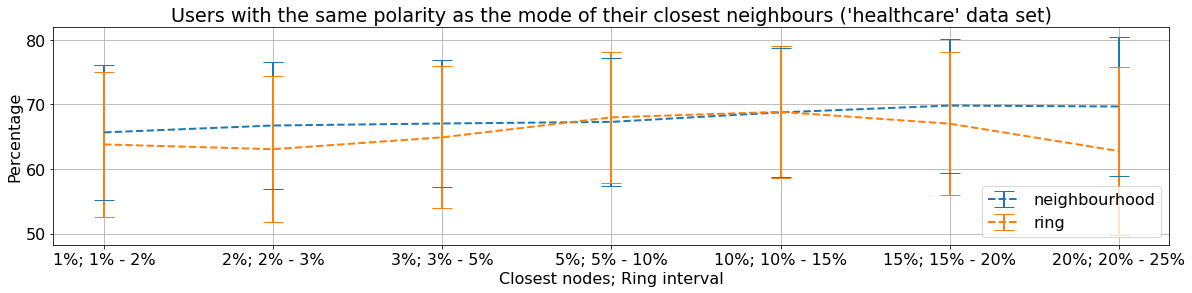

In [73]:
idx  = range(0, 7)
pidx = ["1%; 1% - 2%", "2%; 2% - 3%", "3%; 3% - 5%", "5%; 5% - 10%", "10%; 10% - 15%", "15%; 15% - 20%", "20%; 20% - 25%"]

plt.figure(figsize = (20, 4))
plt.errorbar(range(0, 7), 100 * np.array(mean_d), 100 * np.array(std_d), linestyle = '--', capsize = 10, linewidth = 2, label = 'neighbourhood')
plt.errorbar(range(0, 7), 100 * np.array(ring_mean_d), 100 * np.array(ring_std_d), linestyle = '--', capsize = 10, linewidth = 2, label = 'ring')
plt.xticks(ticks = idx, labels = pidx)
plt.title("Users with the same polarity as the mode of their closest neighbours ('healthcare' data set)")
plt.xlabel("Closest nodes; Ring interval")
plt.ylabel("Percentage")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_hc_perc_rings_d.png", bbox_inches = 'tight')

In [414]:
print(mean_d)
print(ring_mean_d)

print(std_d)
print(ring_std_d)

[0.6566244168642453, 0.667294688031781, 0.6704223984482277, 0.6729218813779368, 0.6876394501100174, 0.6981646009399697, 0.6967606528106616]
[0.6380558796076085, 0.630568340849985, 0.6490192512395299, 0.6798859611800108, 0.6884362264985406, 0.6700950792338671, 0.6276859549126188]
[0.1040958388868815, 0.09835675229243115, 0.09889398184667032, 0.09953340970380373, 0.10017436639998539, 0.10366711742210535, 0.10725908635390348]
[0.11268174333213263, 0.11339525998509718, 0.10982623877336464, 0.10110950101956352, 0.10269331897306709, 0.11035204162846832, 0.1298744496246839]


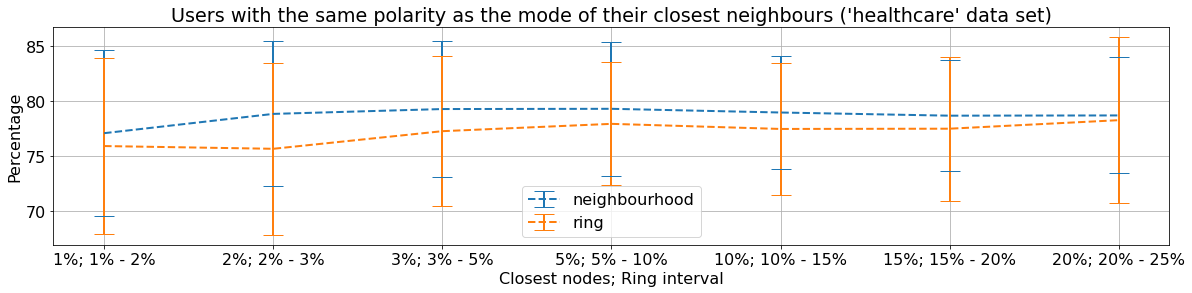

In [74]:
idx  = range(0, 7)
pidx = ["1%; 1% - 2%", "2%; 2% - 3%", "3%; 3% - 5%", "5%; 5% - 10%", "10%; 10% - 15%", "15%; 15% - 20%", "20%; 20% - 25%"]

plt.figure(figsize = (20, 4))
plt.errorbar(range(0, 7), 100 * np.array(mean_r), 100 * np.array(std_r), linestyle = '--', capsize = 10, linewidth = 2, label = 'neighbourhood')
plt.errorbar(range(0, 7), 100 * np.array(ring_mean_r), 100 * np.array(ring_std_r), linestyle = '--', capsize = 10, linewidth = 2, label = 'ring')
plt.xticks(ticks = idx, labels = pidx)
plt.title("Users with the same polarity as the mode of their closest neighbours ('healthcare' data set)")
plt.xlabel("Closest nodes; Ring interval")
plt.ylabel("Percentage")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_hc_perc_rings_r.png", bbox_inches = 'tight')

In [416]:
print(mean_r)
print(ring_mean_r)

print(std_r)
print(ring_std_r)

[0.7706372676561364, 0.7881263419066658, 0.7925256669428565, 0.7927424978341031, 0.7893861195624665, 0.7865099822440084, 0.7867326438606079]
[0.7589555882986937, 0.7564754784775352, 0.7724494421629957, 0.7790940111512942, 0.7744694579708036, 0.7746995591706956, 0.7824340596355223]
[0.07530706641034804, 0.06580016140124838, 0.06153868507331652, 0.06066734653377228, 0.05086584232774375, 0.05032909931545378, 0.05261478306697587]
[0.08021852256259115, 0.07813228843814587, 0.06788047997475347, 0.05583292771167701, 0.05972791876100672, 0.0652632419308831, 0.07522585457189394]


### In-between days correlation

In [82]:
# get correlation between consecutive days / vs aggregated graph

with open("../pickle/obamacare_daily_eig_aligned_norm2.pkl", "rb") as pickle_file:
     _, _, base, _, _, _, _, _, _, _ = pkl.load(pickle_file)    

corr_change   = []
corr_change_d = []
corr_change_r = []

corr_change_base   = []
corr_change_base_d = []
corr_change_base_r = []
for j in range(774, len(ordered_pickle_files_)):

    print("Running for embedding {}/{}".format(j, len(ordered_pickle_files_)))

    # read the embeddings
    # for the day
    with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j]), "rb") as pickle_file:
        _, _, xy_pairs, _, _, _, _, _, _, _ = pkl.load(pickle_file)    
    # the previous day
    with open(os.path.join(pickle_folder_path, ordered_pickle_files_[j - 1]), "rb") as pickle_file:
        _, _, xy_pairs_previous, _, _, _, _, _, _, _ = pkl.load(pickle_file) 
        
    # get the correlations for consecutive days
    _corr, _ = pearsonr(xy_pairs.flatten(), xy_pairs_previous.flatten())
    corr_change.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls0.index].flatten(), xy_pairs_previous[cls0.index].flatten())
    corr_change_d.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls1.index].flatten(), xy_pairs_previous[cls1.index].flatten())
    corr_change_r.append(_corr)
    
    # get the correlation between the averaged graph and specific days
    _corr, _ = pearsonr(xy_pairs.flatten(), base.flatten())
    corr_change_base.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls0.index].flatten(), base[cls0.index].flatten())
    corr_change_base_d.append(_corr)
    _corr, _ = pearsonr(xy_pairs[cls1.index].flatten(), base[cls1.index].flatten())
    corr_change_base_r.append(_corr)

Running for embedding 774/2579
Running for embedding 775/2579
Running for embedding 776/2579
Running for embedding 777/2579
Running for embedding 778/2579
Running for embedding 779/2579
Running for embedding 780/2579
Running for embedding 781/2579
Running for embedding 782/2579
Running for embedding 783/2579
Running for embedding 784/2579
Running for embedding 785/2579
Running for embedding 786/2579
Running for embedding 787/2579
Running for embedding 788/2579
Running for embedding 789/2579
Running for embedding 790/2579
Running for embedding 791/2579
Running for embedding 792/2579
Running for embedding 793/2579
Running for embedding 794/2579
Running for embedding 795/2579
Running for embedding 796/2579
Running for embedding 797/2579
Running for embedding 798/2579
Running for embedding 799/2579
Running for embedding 800/2579
Running for embedding 801/2579
Running for embedding 802/2579
Running for embedding 803/2579
Running for embedding 804/2579
Running for embedding 805/2579
Running 

Running for embedding 1040/2579
Running for embedding 1041/2579
Running for embedding 1042/2579
Running for embedding 1043/2579
Running for embedding 1044/2579
Running for embedding 1045/2579
Running for embedding 1046/2579
Running for embedding 1047/2579
Running for embedding 1048/2579
Running for embedding 1049/2579
Running for embedding 1050/2579
Running for embedding 1051/2579
Running for embedding 1052/2579
Running for embedding 1053/2579
Running for embedding 1054/2579
Running for embedding 1055/2579
Running for embedding 1056/2579
Running for embedding 1057/2579
Running for embedding 1058/2579
Running for embedding 1059/2579
Running for embedding 1060/2579
Running for embedding 1061/2579
Running for embedding 1062/2579
Running for embedding 1063/2579
Running for embedding 1064/2579
Running for embedding 1065/2579
Running for embedding 1066/2579
Running for embedding 1067/2579
Running for embedding 1068/2579
Running for embedding 1069/2579
Running for embedding 1070/2579
Running 

Running for embedding 1303/2579
Running for embedding 1304/2579
Running for embedding 1305/2579
Running for embedding 1306/2579
Running for embedding 1307/2579
Running for embedding 1308/2579
Running for embedding 1309/2579
Running for embedding 1310/2579
Running for embedding 1311/2579
Running for embedding 1312/2579
Running for embedding 1313/2579
Running for embedding 1314/2579
Running for embedding 1315/2579
Running for embedding 1316/2579
Running for embedding 1317/2579
Running for embedding 1318/2579
Running for embedding 1319/2579
Running for embedding 1320/2579
Running for embedding 1321/2579
Running for embedding 1322/2579
Running for embedding 1323/2579
Running for embedding 1324/2579
Running for embedding 1325/2579
Running for embedding 1326/2579
Running for embedding 1327/2579
Running for embedding 1328/2579
Running for embedding 1329/2579
Running for embedding 1330/2579
Running for embedding 1331/2579
Running for embedding 1332/2579
Running for embedding 1333/2579
Running 

Running for embedding 1562/2579
Running for embedding 1563/2579
Running for embedding 1564/2579
Running for embedding 1565/2579
Running for embedding 1566/2579
Running for embedding 1567/2579
Running for embedding 1568/2579
Running for embedding 1569/2579
Running for embedding 1570/2579
Running for embedding 1571/2579
Running for embedding 1572/2579
Running for embedding 1573/2579
Running for embedding 1574/2579
Running for embedding 1575/2579
Running for embedding 1576/2579
Running for embedding 1577/2579
Running for embedding 1578/2579
Running for embedding 1579/2579
Running for embedding 1580/2579
Running for embedding 1581/2579
Running for embedding 1582/2579
Running for embedding 1583/2579
Running for embedding 1584/2579
Running for embedding 1585/2579
Running for embedding 1586/2579
Running for embedding 1587/2579
Running for embedding 1588/2579
Running for embedding 1589/2579
Running for embedding 1590/2579
Running for embedding 1591/2579
Running for embedding 1592/2579
Running 

Running for embedding 1819/2579
Running for embedding 1820/2579
Running for embedding 1821/2579
Running for embedding 1822/2579
Running for embedding 1823/2579
Running for embedding 1824/2579
Running for embedding 1825/2579
Running for embedding 1826/2579
Running for embedding 1827/2579
Running for embedding 1828/2579
Running for embedding 1829/2579
Running for embedding 1830/2579
Running for embedding 1831/2579
Running for embedding 1832/2579
Running for embedding 1833/2579
Running for embedding 1834/2579
Running for embedding 1835/2579
Running for embedding 1836/2579
Running for embedding 1837/2579
Running for embedding 1838/2579
Running for embedding 1839/2579
Running for embedding 1840/2579
Running for embedding 1841/2579
Running for embedding 1842/2579
Running for embedding 1843/2579
Running for embedding 1844/2579
Running for embedding 1845/2579
Running for embedding 1846/2579
Running for embedding 1847/2579
Running for embedding 1848/2579
Running for embedding 1849/2579
Running 

Running for embedding 2076/2579
Running for embedding 2077/2579
Running for embedding 2078/2579
Running for embedding 2079/2579
Running for embedding 2080/2579
Running for embedding 2081/2579
Running for embedding 2082/2579
Running for embedding 2083/2579
Running for embedding 2084/2579
Running for embedding 2085/2579
Running for embedding 2086/2579
Running for embedding 2087/2579
Running for embedding 2088/2579
Running for embedding 2089/2579
Running for embedding 2090/2579
Running for embedding 2091/2579
Running for embedding 2092/2579
Running for embedding 2093/2579
Running for embedding 2094/2579
Running for embedding 2095/2579
Running for embedding 2096/2579
Running for embedding 2097/2579
Running for embedding 2098/2579
Running for embedding 2099/2579
Running for embedding 2100/2579
Running for embedding 2101/2579
Running for embedding 2102/2579
Running for embedding 2103/2579
Running for embedding 2104/2579
Running for embedding 2105/2579
Running for embedding 2106/2579
Running 

Running for embedding 2333/2579
Running for embedding 2334/2579
Running for embedding 2335/2579
Running for embedding 2336/2579
Running for embedding 2337/2579
Running for embedding 2338/2579
Running for embedding 2339/2579
Running for embedding 2340/2579
Running for embedding 2341/2579
Running for embedding 2342/2579
Running for embedding 2343/2579
Running for embedding 2344/2579
Running for embedding 2345/2579
Running for embedding 2346/2579
Running for embedding 2347/2579
Running for embedding 2348/2579
Running for embedding 2349/2579
Running for embedding 2350/2579
Running for embedding 2351/2579
Running for embedding 2352/2579
Running for embedding 2353/2579
Running for embedding 2354/2579
Running for embedding 2355/2579
Running for embedding 2356/2579
Running for embedding 2357/2579
Running for embedding 2358/2579
Running for embedding 2359/2579
Running for embedding 2360/2579
Running for embedding 2361/2579
Running for embedding 2362/2579
Running for embedding 2363/2579
Running 

In [83]:
### Pickle the correlations 
with open("../pickle/obamacare_daily_corr_change.pkl", "wb") as f:
    pkl.dump([corr_change, corr_change_d, corr_change_r, corr_change_base, corr_change_base_d, corr_change_base_r], f)